In [1]:
import pandas as pd
import math
import requests
from bs4 import BeautifulSoup

In [2]:
page = requests.get("https://www.zameen.com/Homes/Karachi-2-1.html")
page

<Response [200]>

In [3]:
page.status_code

200

In [4]:
page.content
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=0" name="viewport"/>
  <link href="http://LL8IZ711CS-dsn.algolia.net" rel="dns-prefetch"/>
  <link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="https://www.googletagservices.com" rel="dns-prefetch"/>
  <link href="https://www.googleadservices.com" rel="dns-prefetch"/>
  <link href="https://images.zameen.com" rel="dns-prefetch"/>
  <link href="https://maps.googleapis.com/" rel="dns-prefetch"/>
  <link href="https://www.zameen.com/" rel="dns-prefetch"/>
  <link href="https://securepubads.g.doubleclick.net/" rel="dns-prefetch"/>
  <link href="https://widget.eu.criteo.com/" rel="dns-prefetch"/>
  <script id="runtimeSettings">
   window.CONFIG={runtime: Object.assign({"CANONICAL_DOMAIN":"www.zameen.com","CANONICAL_DOMAIN_EXCEPTION":["gamma.zameen.co

In [5]:
location = soup.find('div', class_='_5922efef')
area = location.find(class_='_3c81d75b')
print(area)
list1 = area.find_all('li')
for i in list1:
    print(i.get_text())
    print("\n")

<ul class="_3c81d75b"><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_DHA_Defence-213-1.html">DHA Defence<span class="_6beeb3a0">(<!-- -->3,305<!-- -->)</span></a></li><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Bahria_Town_Karachi-8298-1.html">Bahria Town Karachi<span class="_6beeb3a0">(<!-- -->2,412<!-- -->)</span></a></li><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Cantt-525-1.html">Cantt<span class="_6beeb3a0">(<!-- -->2,319<!-- -->)</span></a></li><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Gulshan_e_Iqbal_Town-6858-1.html">Gulshan-e-Iqbal Town<span class="_6beeb3a0">(<!-- -->1,603<!-- -->)</span></a></li><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Scheme_33-495-1.html">Scheme 33<span class="_6beeb3a0">(<!-- -->1,585<!-- -->)</span></a></li><li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Gulistan_e_Jauhar-232-1.html">Gulistan-e-Jauhar<span class="_6beeb3a0">(<!-- -->1,40

In [6]:
list1[:2]

[<li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_DHA_Defence-213-1.html">DHA Defence<span class="_6beeb3a0">(<!-- -->3,305<!-- -->)</span></a></li>,
 <li class="_5f08d243"><a class="_2dd261fc" href="/Homes/Karachi_Bahria_Town_Karachi-8298-1.html">Bahria Town Karachi<span class="_6beeb3a0">(<!-- -->2,412<!-- -->)</span></a></li>]

In [7]:
defence = list1[0]
bahria = list1[1]
defence_homes_link = defence.a.get('href')
bahria_homes_link = bahria.a.get('href')
print(defence_homes_link[:31])
print(bahria_homes_link[:40])

/Homes/Karachi_DHA_Defence-213-
/Homes/Karachi_Bahria_Town_Karachi-8298-


In [8]:
# 1.request the Defence Homes content from website
all_totalh = soup.find_all('span', attrs = {'class' : '_6beeb3a0'})
all_dhomes = all_totalh[0].get_text()
all_dhomes = (all_dhomes[1:-1]).split(',')
all_dhomes = int(all_dhomes[0] + all_dhomes[1])
print(all_dhomes)

# 2.request the Bahria Town Homes content from website
all_bhomes = all_totalh[1].get_text()
all_bhomes = (all_bhomes[1:-1]).split(',')
all_bhomes = int(all_bhomes[0] + all_bhomes[1])
print(all_bhomes)


drange = math.ceil(all_dhomes/25)
brange = math.ceil(all_bhomes/25)

3305
2412


In [9]:
l = []
for d_link in range(1,drange+1): #range(1,9)
    defence_homes_link = defence_homes_link[:31] + str(d_link) + '.html'
    def_page = requests.get("https://www.zameen.com" + defence_homes_link)
    #print(def_page)
    #print(def_page.status_code)

    def_page.content
    def_soup = BeautifulSoup(def_page.content, 'html.parser')
    #print(def_soup.prettify())

    def_div = def_soup.find_all('div', class_='f74e80f3')

    
    for d in def_div:
        dh_details = requests.get("https://www.zameen.com" + d.a.get('href'))
        dhouse_soup = BeautifulSoup(dh_details.content, 'html.parser')

        dtitle = dhouse_soup.find('div', class_='b72558b0').h1.get_text(strip=True)

        defence_house_details = dhouse_soup.find_all('span', attrs = {'class' : '_812aa185'})
        o = []
        o.append(dtitle)
        for h in defence_house_details:

            o.append(h.get_text())
        #print(o)
        l.append(o)
        

l

[['We Are Offer 1000 Yards Well Maintain Bungalow For Sale In Phase Vi Defence',
  'House',
  'PKR21 Crore',
  'DHA Defence, Karachi, Sindh',
  '6',
  '1,000 Sq. Yd.',
  'For Sale',
  '6',
  '4 hours ago'],
 ['Structure for sale near EMAAR in DHA Phase 8 Ext.',
  'House',
  'PKR6.85 Crore',
  'DHA Defence, Karachi, Sindh',
  '6',
  '500 Sq. Yd.',
  'For Sale',
  '5',
  '5 hours ago'],
 ['500 yards New Architect Design Bungalow for Sale',
  'House',
  'PKR12.5 Crore',
  'DHA Defence, Karachi, Sindh',
  '6',
  '500 Sq. Yd.',
  'For Sale',
  '6',
  '9 hours ago'],
 ['In Emaar Pearl Towers Flat Sized 1634 Square Feet For Sale',
  'Flat',
  'PKR5.75 Crore',
  'DHA Defence, Karachi, Sindh',
  '3',
  '182 Sq. Yd.',
  'For Sale',
  '2',
  '10 hours ago'],
 ['Sea Facing 4 Bed Available For Sale In Coral Tower',
  'Flat',
  'PKR6.4 Crore',
  'DHA Defence, Karachi, Sindh',
  '6',
  '297 Sq. Yd.',
  'For Sale',
  '4',
  '10 hours ago'],
 ['Prime Location',
  'House',
  'PKR13.9 Crore',
  'DHA Defe

In [10]:
len(l)
for a in l:
    if len(a) == 9:
        a.insert(3,None)
        a.insert(3,None)
        a.insert(3,None)
    #print(a)

In [11]:
df = pd.DataFrame(l,columns=['Title','Type','Price','Initial Amount','Monthly Installment','Remaining Installments','Location','Bath(s)','Area','Purpose','Bedroom(s)','Added'])
display(df)

Title   Type          Price  \
0     We Are Offer 1000 Yards Well Maintain Bungalow...  House    PKR21 Crore   
1     Structure for sale near EMAAR in DHA Phase 8 Ext.  House  PKR6.85 Crore   
2      500 yards New Architect Design Bungalow for Sale  House  PKR12.5 Crore   
3     In Emaar Pearl Towers Flat Sized 1634 Square F...   Flat  PKR5.75 Crore   
4     Sea Facing 4 Bed Available For Sale In Coral T...   Flat   PKR6.4 Crore   
...                                                 ...    ...            ...   
3303  Buy 500 Square Yards House At Highly Affordabl...  House  PKR15.8 Crore   
3304       500 Square Yards House Is Available For sale  House  PKR14.2 Crore   
3305       Ideal House Is Available For sale In Karachi  House  PKR12.5 Crore   
3306        House For Grabs In 500 Square Yards Karachi  House  PKR12.5 Crore   
3307                House Sale Near Masjid Baitul Salam  House  PKR6.75 Crore   

     Initial Amount Monthly Installment Remaining Installments  \
0              None                None                   None   
1              None                None                   None   
2              None                None                   None   
3              None                None                   None   
4              None                None                   None   
...             ...                 ...                    ...   
3303           None                None                   None   
3304           None                None                   None   
3305           None                None                   None   
3306           None                None                   None   
3307           None                None                   None   

                         Location Bath(s)           Area   Purpose Bedroom(s)  \
0     DHA Defence, Karachi, Sindh       6  1,000 Sq. Yd.  For Sale          6   
1     DHA Defence, Karachi, Sindh       6    500 Sq. Yd.  For Sale          5   
2     DHA Defence, Karachi, Sindh       6    500 Sq. Yd.  For Sale          6   
3     DHA Defence, Karachi, Sindh       3    182 Sq. Yd.  For Sale          2   
4     DHA Defence, Karachi, Sindh       6    297 Sq. Yd.  For Sale          4   
...                           ...     ...            ...       ...        ...   
3303  DHA Defence, Karachi, Sindh       6    500 Sq. Yd.  For Sale          6   
3304  DHA Defence, Karachi, Sindh       6    500 Sq. Yd.  For Sale          6   
3305  DHA Defence, Karachi, Sindh       5    500 Sq. Yd.  For Sale          5   
3306  DHA Defence, Karachi, Sindh       5    500 Sq. Yd.  For Sale          5   
3307  DHA Defence, Karachi, Sindh       5    425 Sq. Yd.  For Sale          4   

              Added  
0       4 hours ago  
1       5 hours ago  
2       9 hours ago  
3      10 hours ago  
4      10 hours ago  
...             ...  
3303   6 months ago  
3304   6 months ago  
3305  10 months ago  
3306  10 months ago  
3307    5 years ago  

[3308 rows x 12 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   3308 non-null   object
 1   Type                    3308 non-null   object
 2   Price                   3308 non-null   object
 3   Initial Amount          140 non-null    object
 4   Monthly Installment     140 non-null    object
 5   Remaining Installments  140 non-null    object
 6   Location                3308 non-null   object
 7   Bath(s)                 3308 non-null   object
 8   Area                    3308 non-null   object
 9   Purpose                 3308 non-null   object
 10  Bedroom(s)              3308 non-null   object
 11  Added                   3308 non-null   object
dtypes: object(12)
memory usage: 310.2+ KB


In [13]:
df.to_csv('DHAHouses.csv')

In [14]:
l2 = []
for b_link in range(1,brange+1): #range(1,9)
    bahria_homes_link = bahria_homes_link[:40] + str(b_link) + '.html'
    bah_page = requests.get("https://www.zameen.com" + bahria_homes_link)
    #print(def_page)
    #print(def_page.status_code)

    bah_page.content
    bah_soup = BeautifulSoup(bah_page.content, 'html.parser')
    #print(def_soup.prettify())

    bah_div = bah_soup.find_all('div', class_='f74e80f3')

    
    for b in bah_div:
        bh_details = requests.get("https://www.zameen.com" + b.a.get('href'))
        bhouse_soup = BeautifulSoup(bh_details.content, 'html.parser')

        btitle = bhouse_soup.find('div', class_='b72558b0').h1.get_text(strip=True)

        bahria_house_details = bhouse_soup.find_all('span', attrs = {'class' : '_812aa185'})
        o2 = []
        o2.append(btitle)
        for h in bahria_house_details:

            o2.append(h.get_text())
        #print(o2)
        l2.append(o2)
        

l2

[['Precinct: 4, 510 sq yds Villa Sami Furnished With Basement In very Prestigious Location of Bahria Town Karachi',
  'House',
  'PKR7 Crore',
  'Bahria Town Karachi, Karachi, Sindh',
  '6',
  '510 Sq. Yd.',
  'For Sale',
  '7',
  '40 minutes ago'],
 ['Get In Touch Now To Buy A House In Bahria Town - Precinct 10-A',
  'House',
  'PKR1.73 Crore',
  'Bahria Town Karachi, Karachi, Sindh',
  '3',
  '200 Sq. Yd.',
  'For Sale',
  '3',
  '53 minutes ago'],
 ['200 Square Yards House For sale In Bahria Town - Precinct 10-A',
  'House',
  'PKR1.7 Crore',
  'Bahria Town Karachi, Karachi, Sindh',
  '3',
  '200 Sq. Yd.',
  'For Sale',
  '3',
  '3 hours ago'],
 ['Your Search For House In Karachi Ends Here',
  'House',
  'PKR1.4 Crore',
  'Bahria Town Karachi, Karachi, Sindh',
  '3',
  '235 Sq. Yd.',
  'For Sale',
  '3',
  '5 hours ago'],
 ['Ideal Location Sports City Villa Is Available For Sale In Bahria Town Near Stadium',
  'House',
  'PKR2.05 Crore',
  'Bahria Town Karachi, Karachi, Sindh',
  '4

In [15]:
len(l2)
for b in l2:
    if len(b) == 9:
        b.insert(3,None)
        b.insert(3,None)
        b.insert(3,None)
    #print(b)

In [16]:
df2 = pd.DataFrame(l2,columns=['Title','Type','Price','Initial Amount','Monthly Installment','Remaining Installments','Location','Bath(s)','Area','Purpose','Bedroom(s)','Added'])
display(df2)

Title   Type          Price  \
0     Precinct: 4, 510 sq yds Villa Sami Furnished W...  House     PKR7 Crore   
1     Get In Touch Now To Buy A House In Bahria Town...  House  PKR1.73 Crore   
2     200 Square Yards House For sale In Bahria Town...  House   PKR1.7 Crore   
3            Your Search For House In Karachi Ends Here  House   PKR1.4 Crore   
4     Ideal Location Sports City Villa Is Available ...  House  PKR2.05 Crore   
...                                                 ...    ...            ...   
2402  Get In Touch Now To Buy A Flat In Bahria Town ...   Flat   PKR91.8 Lakh   
2403  Centrally Located Flat In Bahria Town - Precin...   Flat   PKR91.8 Lakh   
2404          Your Search For Flat In Karachi Ends Here   Flat   PKR91.8 Lakh   
2405  Become Owner Of Your Flat Today Which Is Centr...   Flat   PKR91.8 Lakh   
2406  1106 Square Feet Flat In Bahria Town Karachi B...   Flat  PKR1.39 Crore   

     Initial Amount Monthly Installment Remaining Installments  \
0              None                None                   None   
1              None                None                   None   
2              None                None                   None   
3              None                None                   None   
4              None                None                   None   
...             ...                 ...                    ...   
2402           None                None                   None   
2403           None                None                   None   
2404           None                None                   None   
2405           None                None                   None   
2406           None                None                   None   

                                 Location Bath(s)         Area   Purpose  \
0     Bahria Town Karachi, Karachi, Sindh       6  510 Sq. Yd.  For Sale   
1     Bahria Town Karachi, Karachi, Sindh       3  200 Sq. Yd.  For Sale   
2     Bahria Town Karachi, Karachi, Sindh       3  200 Sq. Yd.  For Sale   
3     Bahria Town Karachi, Karachi, Sindh       3  235 Sq. Yd.  For Sale   
4     Bahria Town Karachi, Karachi, Sindh       4  350 Sq. Yd.  For Sale   
...                                   ...     ...          ...       ...   
2402  Bahria Town Karachi, Karachi, Sindh       2  113 Sq. Yd.  For Sale   
2403  Bahria Town Karachi, Karachi, Sindh       2  113 Sq. Yd.  For Sale   
2404  Bahria Town Karachi, Karachi, Sindh       2  113 Sq. Yd.  For Sale   
2405  Bahria Town Karachi, Karachi, Sindh       2  113 Sq. Yd.  For Sale   
2406  Bahria Town Karachi, Karachi, Sindh       2  123 Sq. Yd.  For Sale   

     Bedroom(s)           Added  
0             7  40 minutes ago  
1             3  53 minutes ago  
2             3     3 hours ago  
3             3     5 hours ago  
4             4     5 hours ago  
...         ...             ...  
2402          2   10 months ago  
2403          2   10 months ago  
2404          2   10 months ago  
2405          2   10 months ago  
2406          2    7 months ago  

[2407 rows x 12 columns]

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   2407 non-null   object
 1   Type                    2407 non-null   object
 2   Price                   2407 non-null   object
 3   Initial Amount          77 non-null     object
 4   Monthly Installment     77 non-null     object
 5   Remaining Installments  77 non-null     object
 6   Location                2407 non-null   object
 7   Bath(s)                 2407 non-null   object
 8   Area                    2407 non-null   object
 9   Purpose                 2407 non-null   object
 10  Bedroom(s)              2407 non-null   object
 11  Added                   2407 non-null   object
dtypes: object(12)
memory usage: 225.8+ KB


In [18]:
df2.to_csv('BahriaTownHouses.csv')

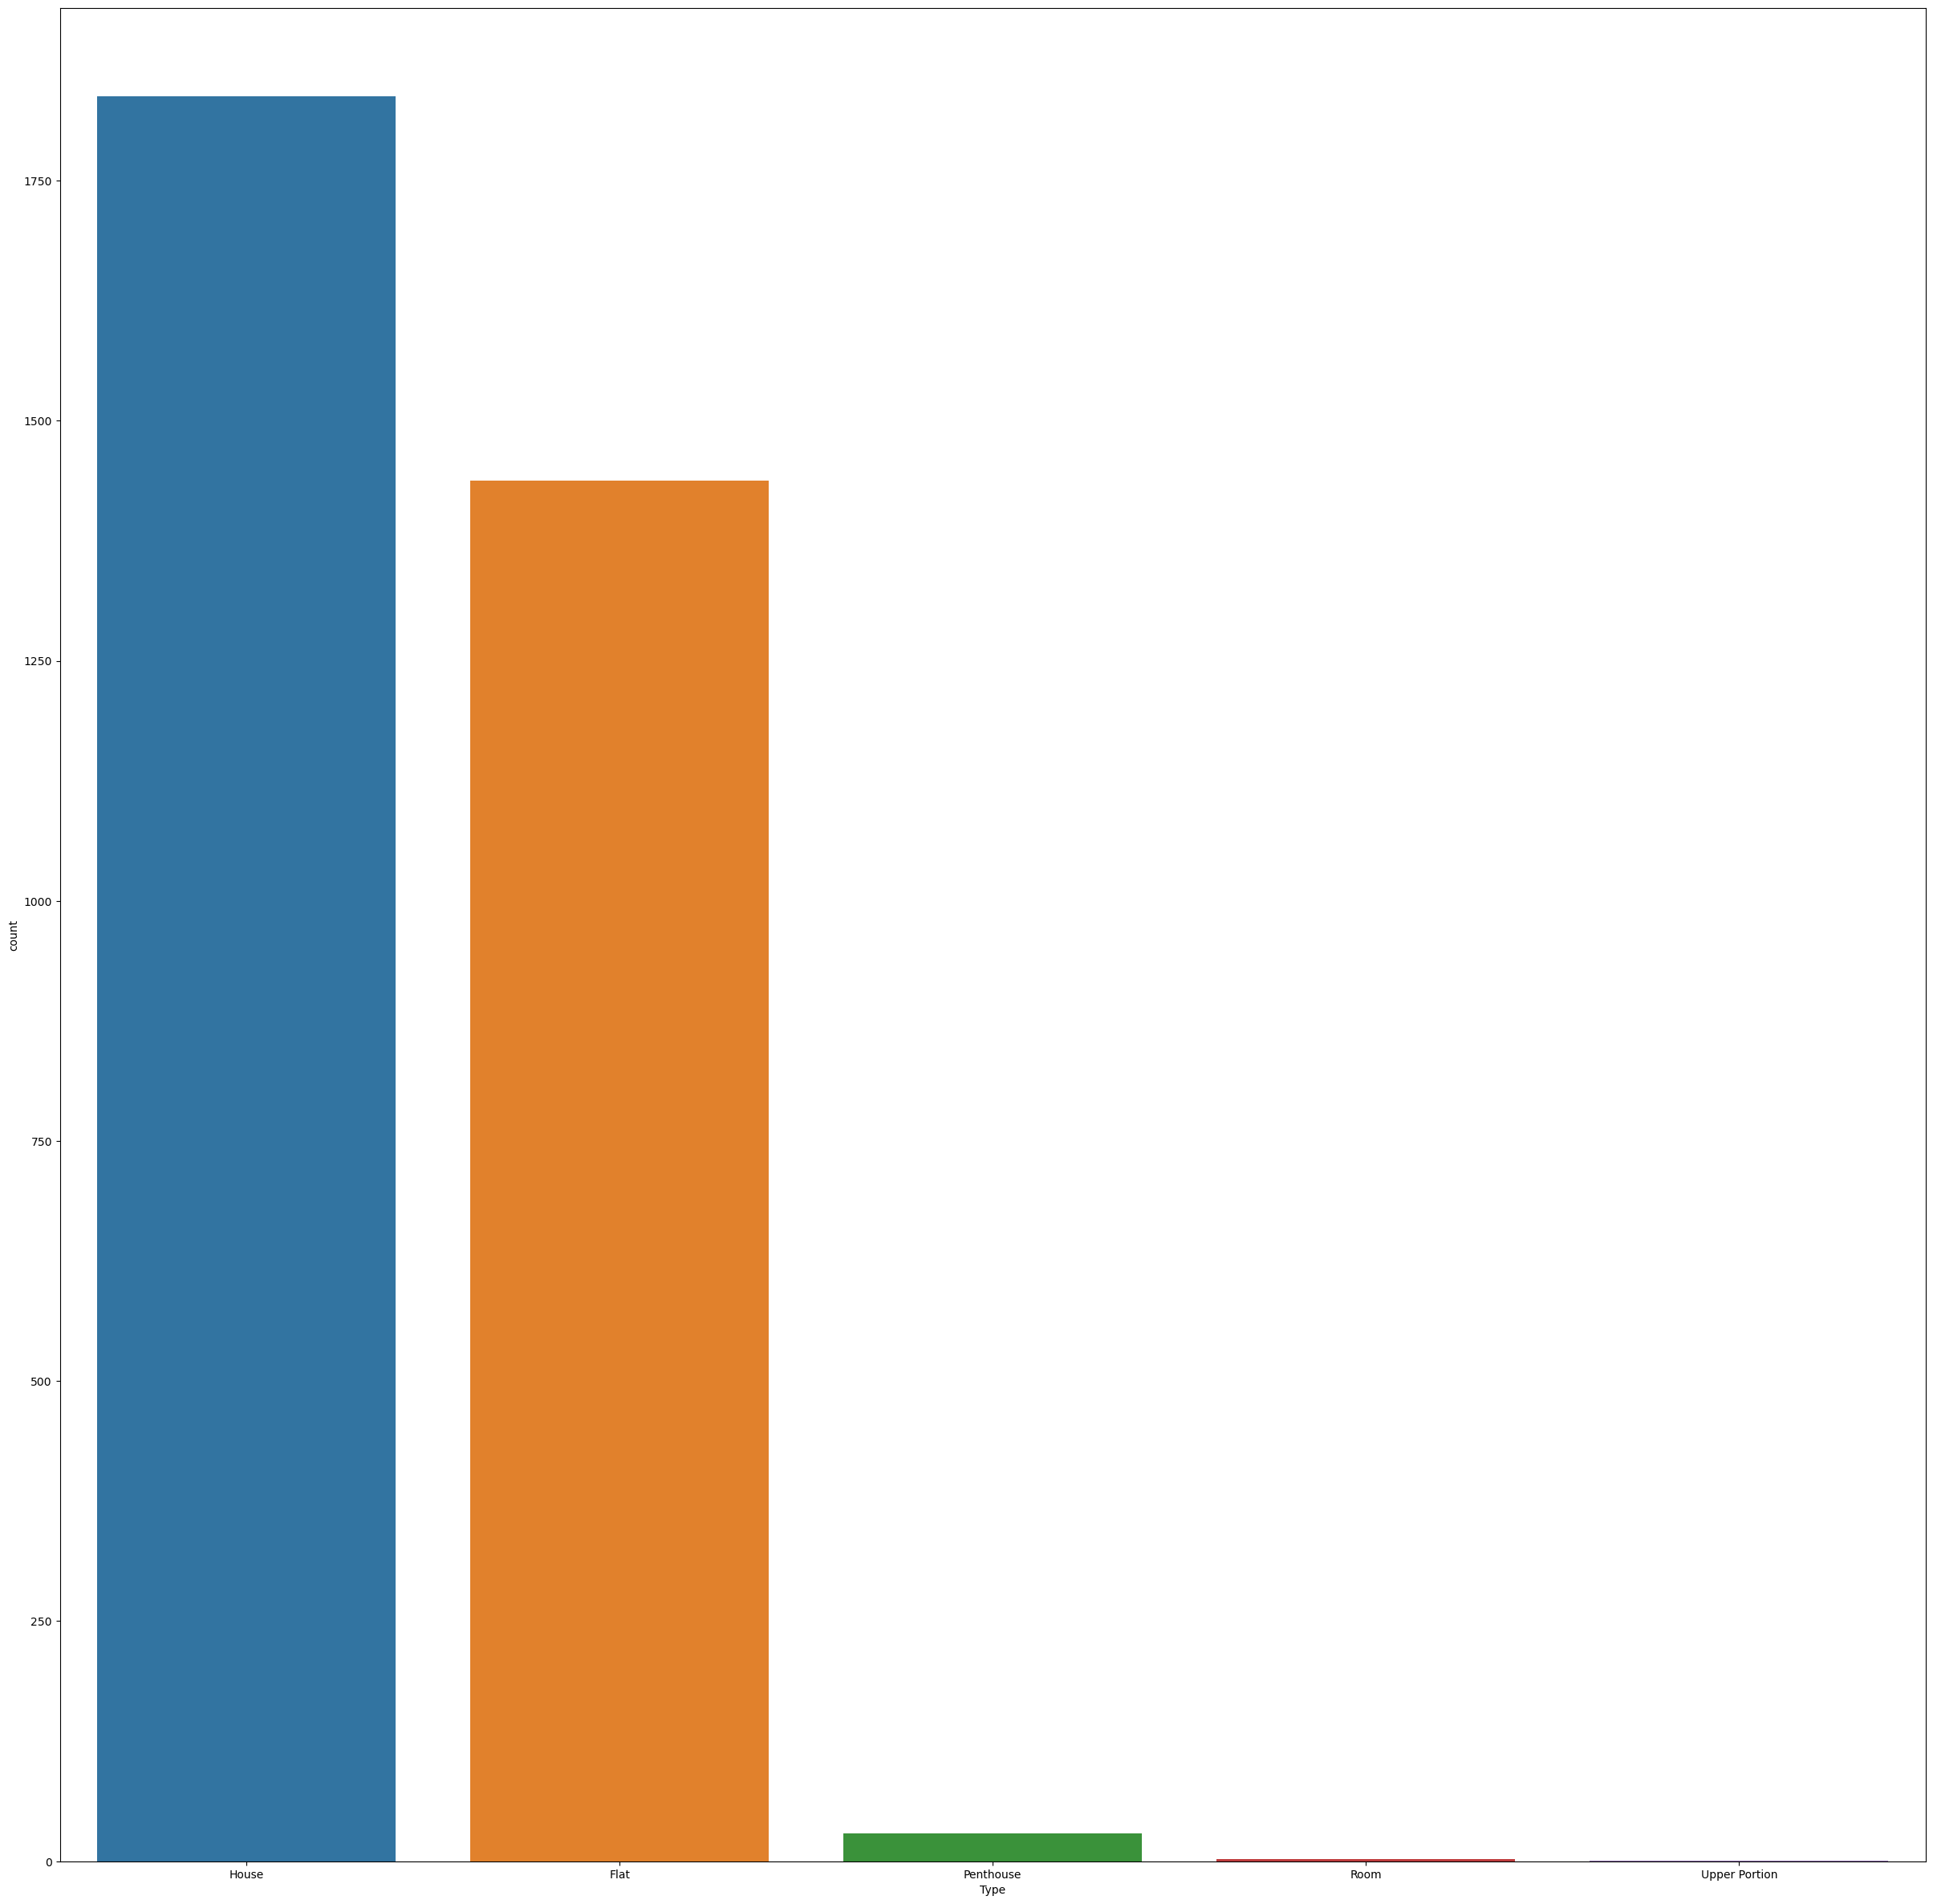

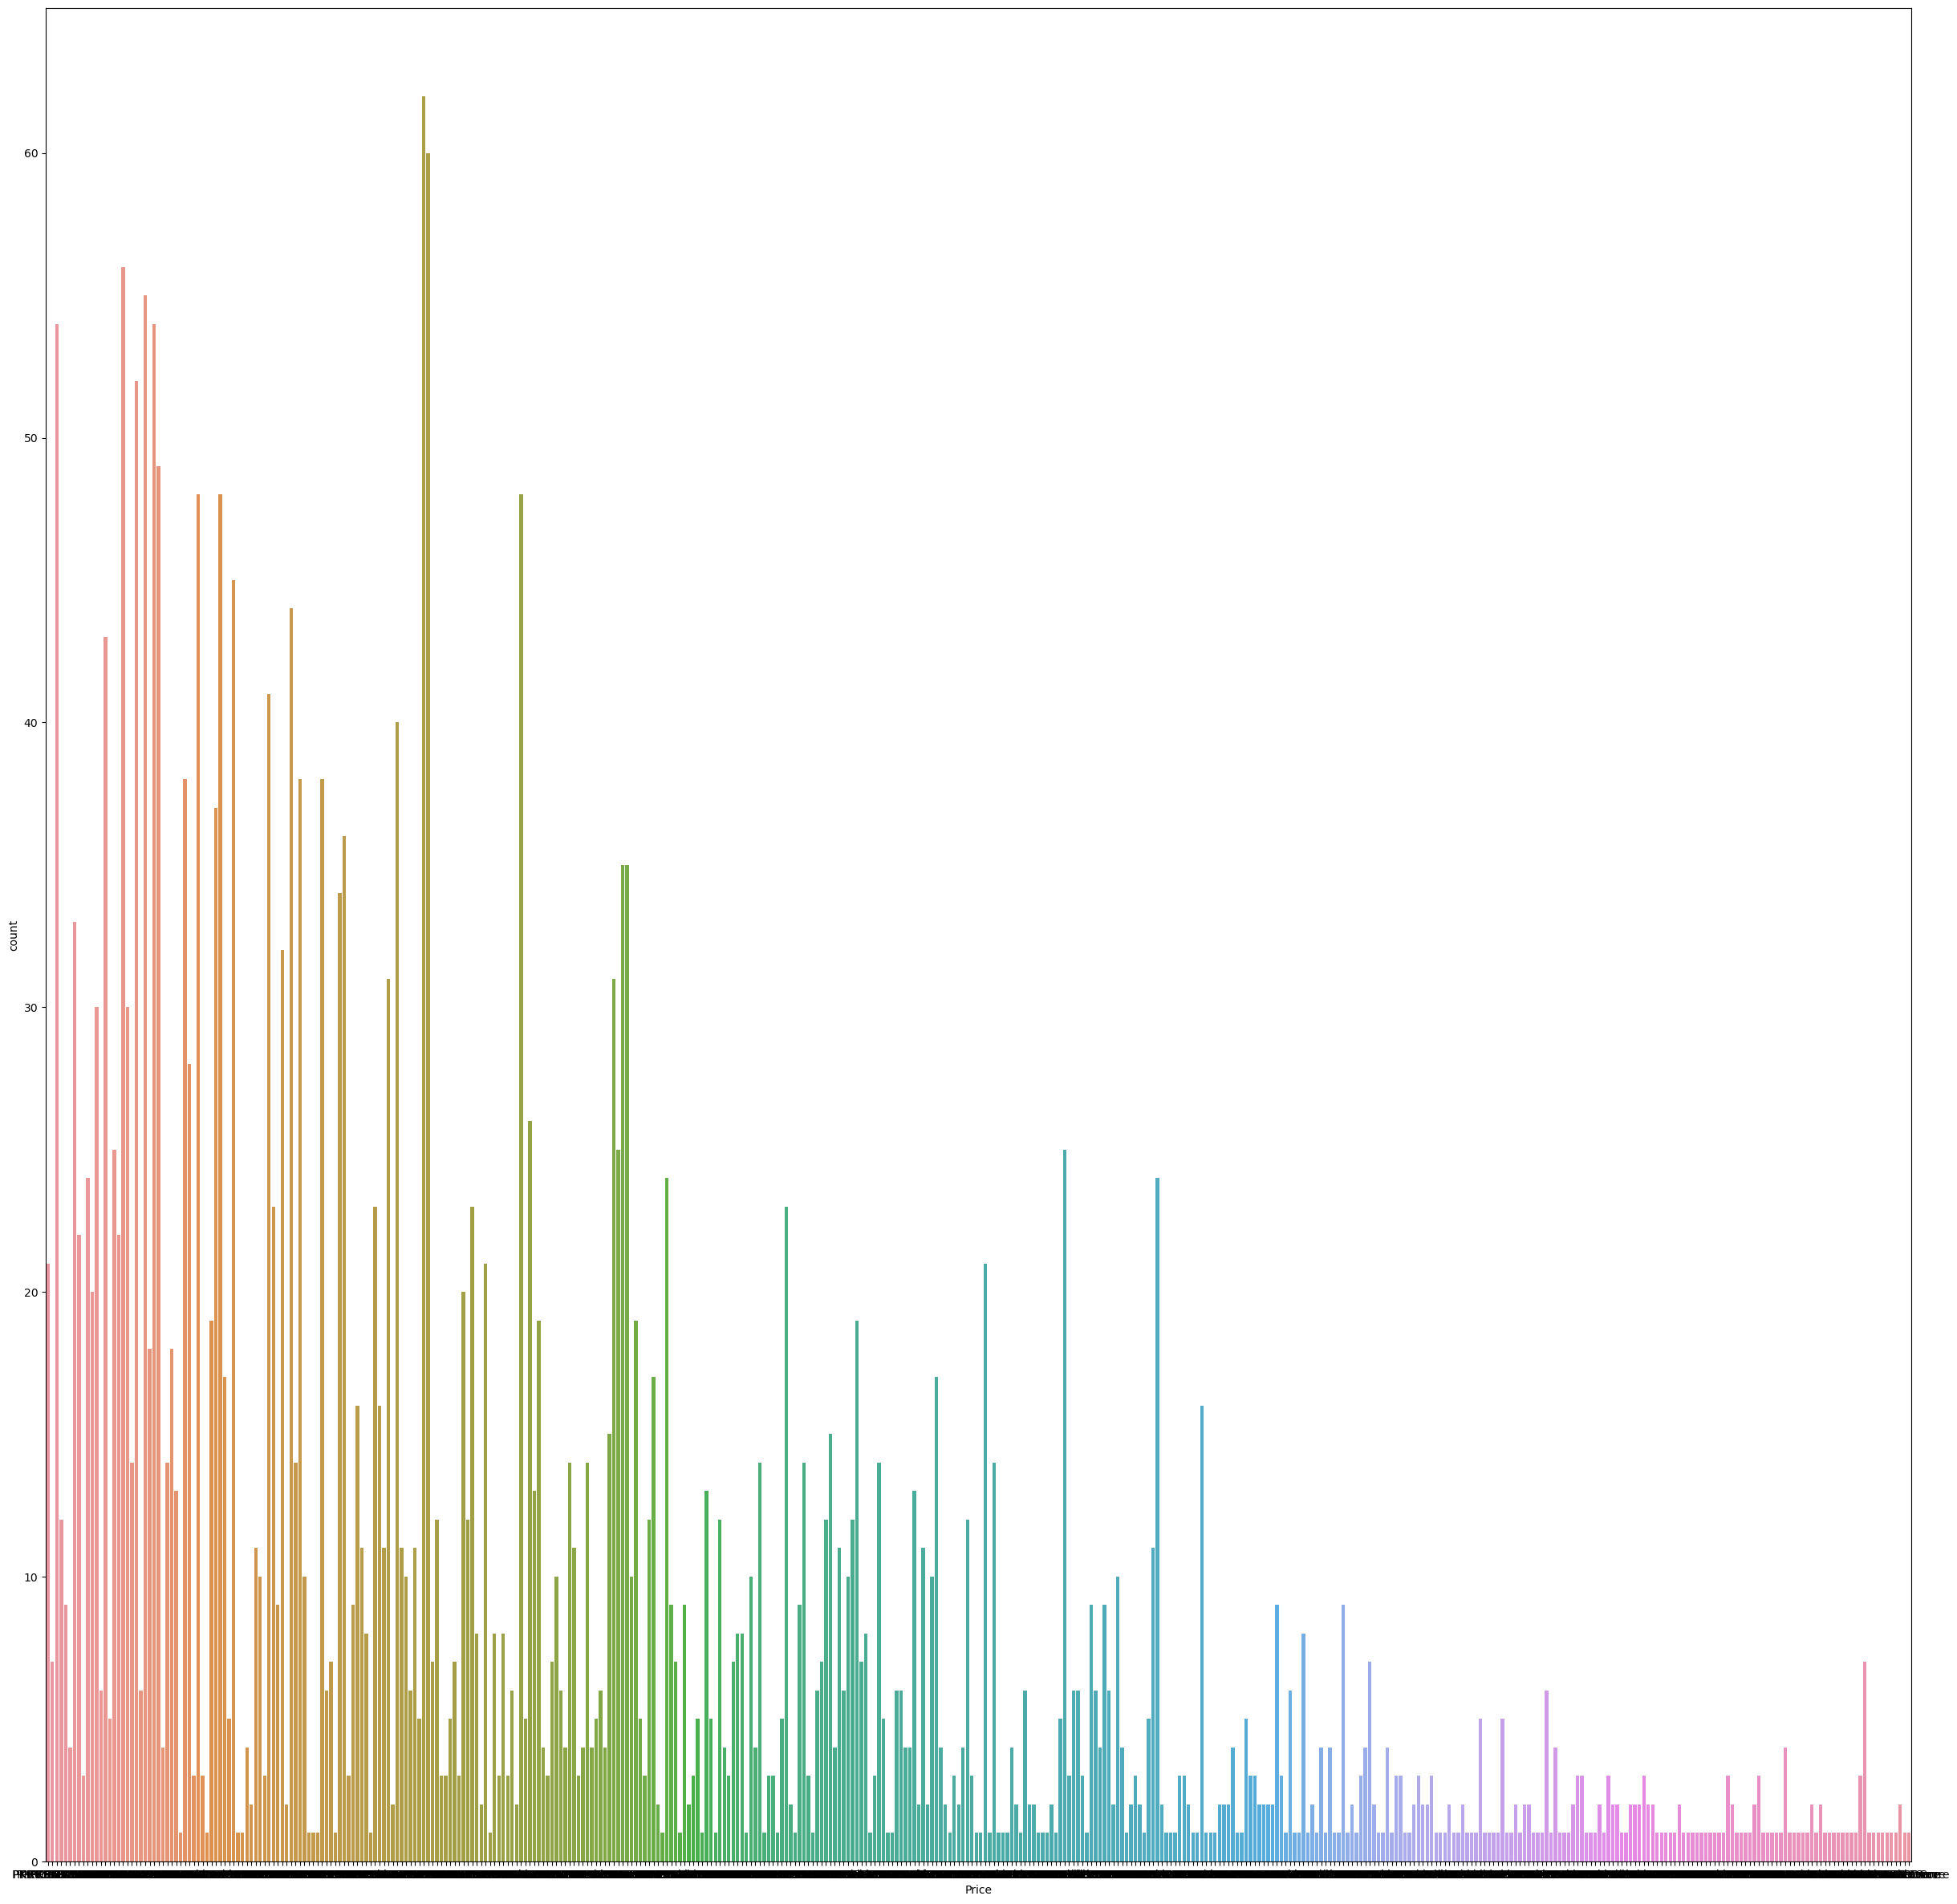

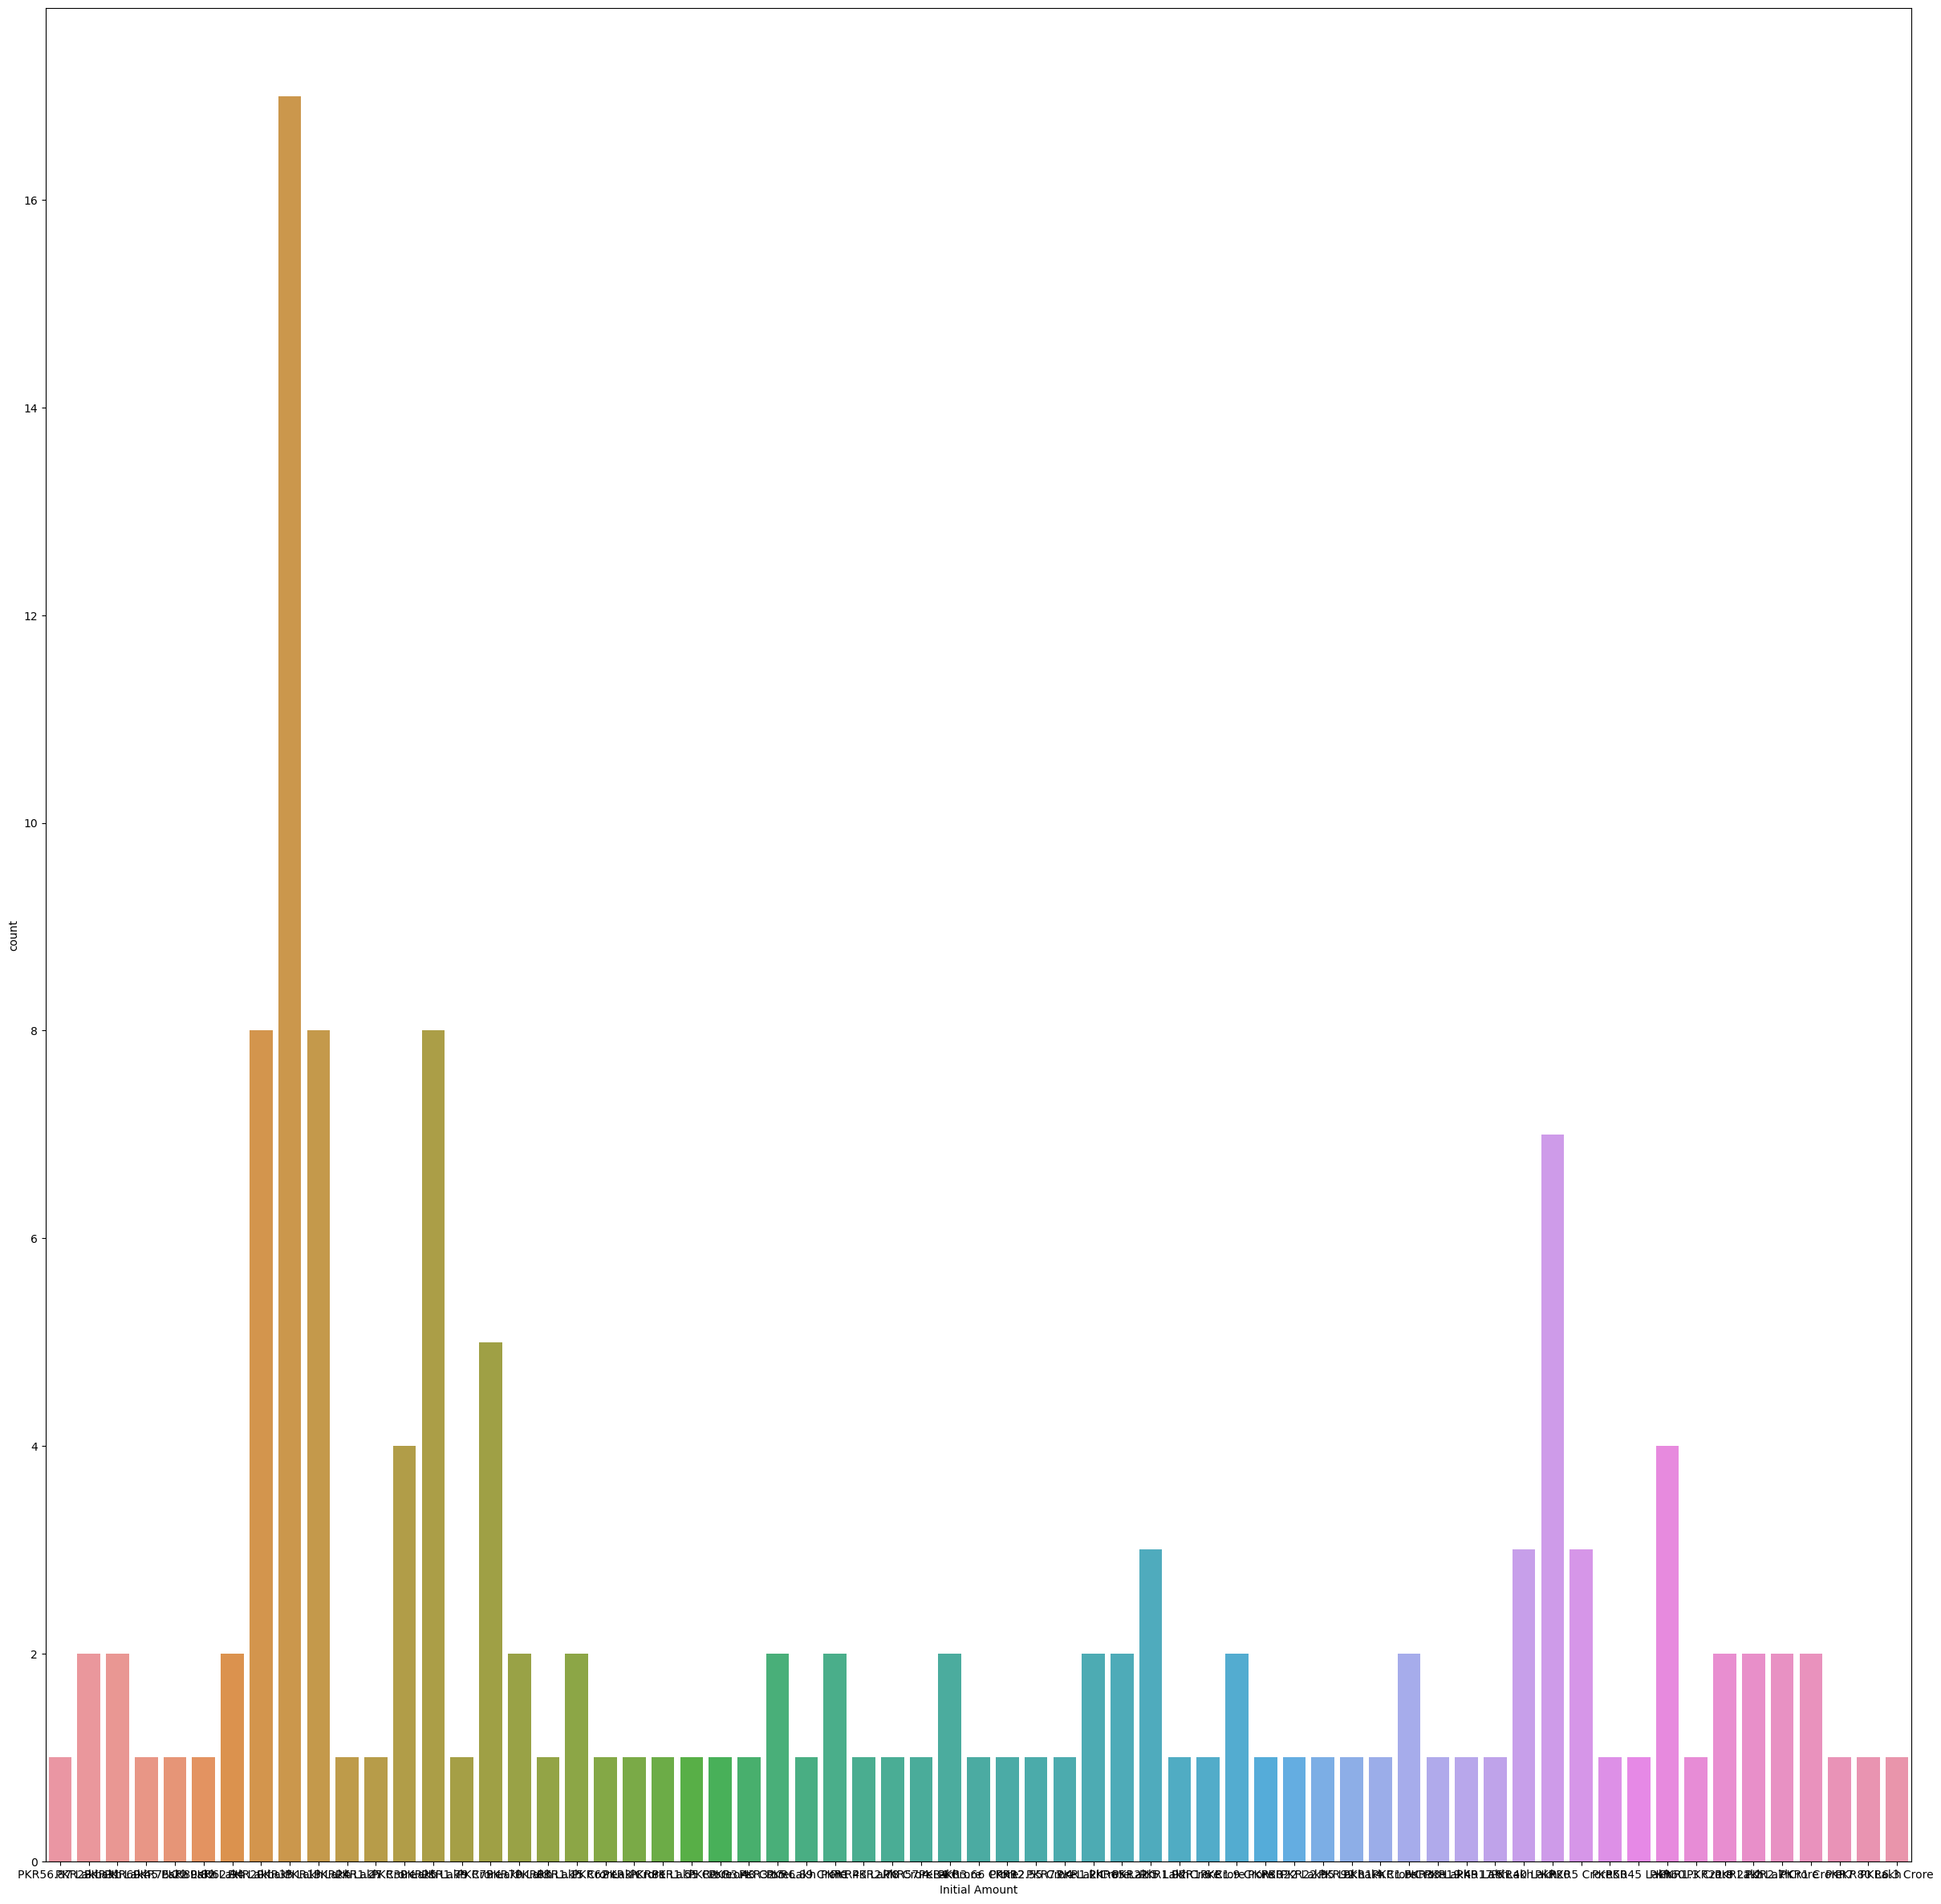

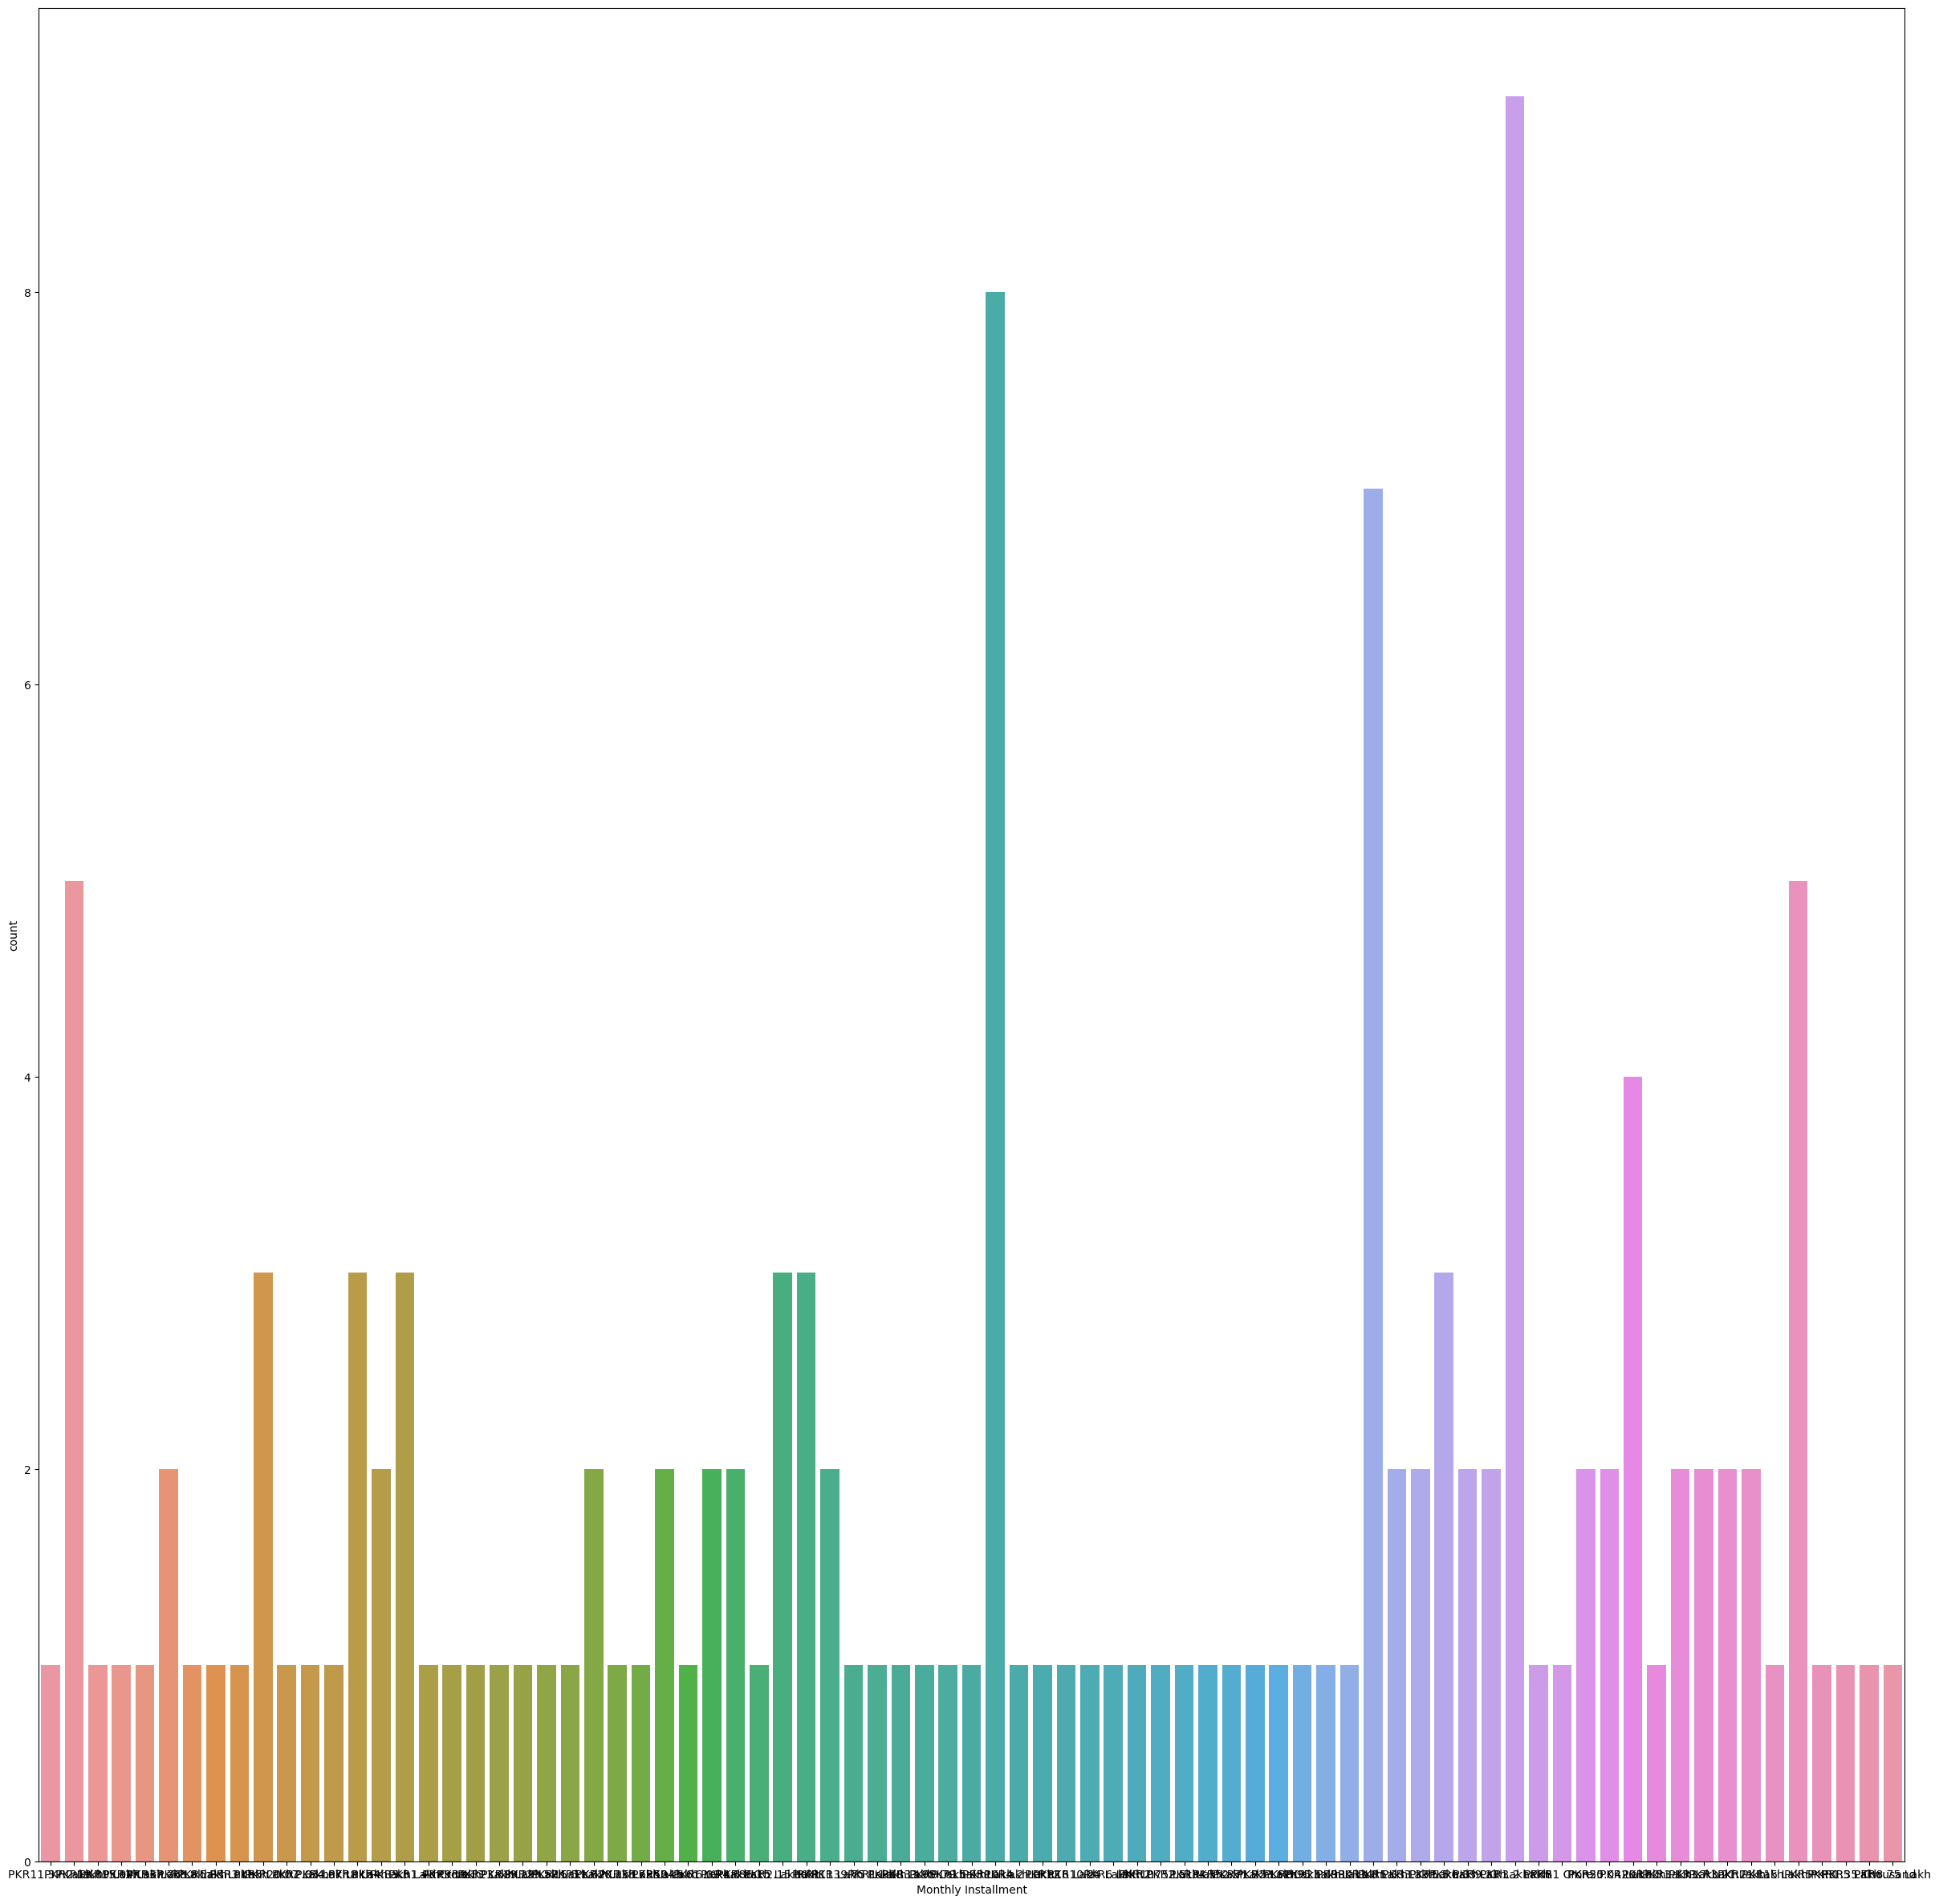

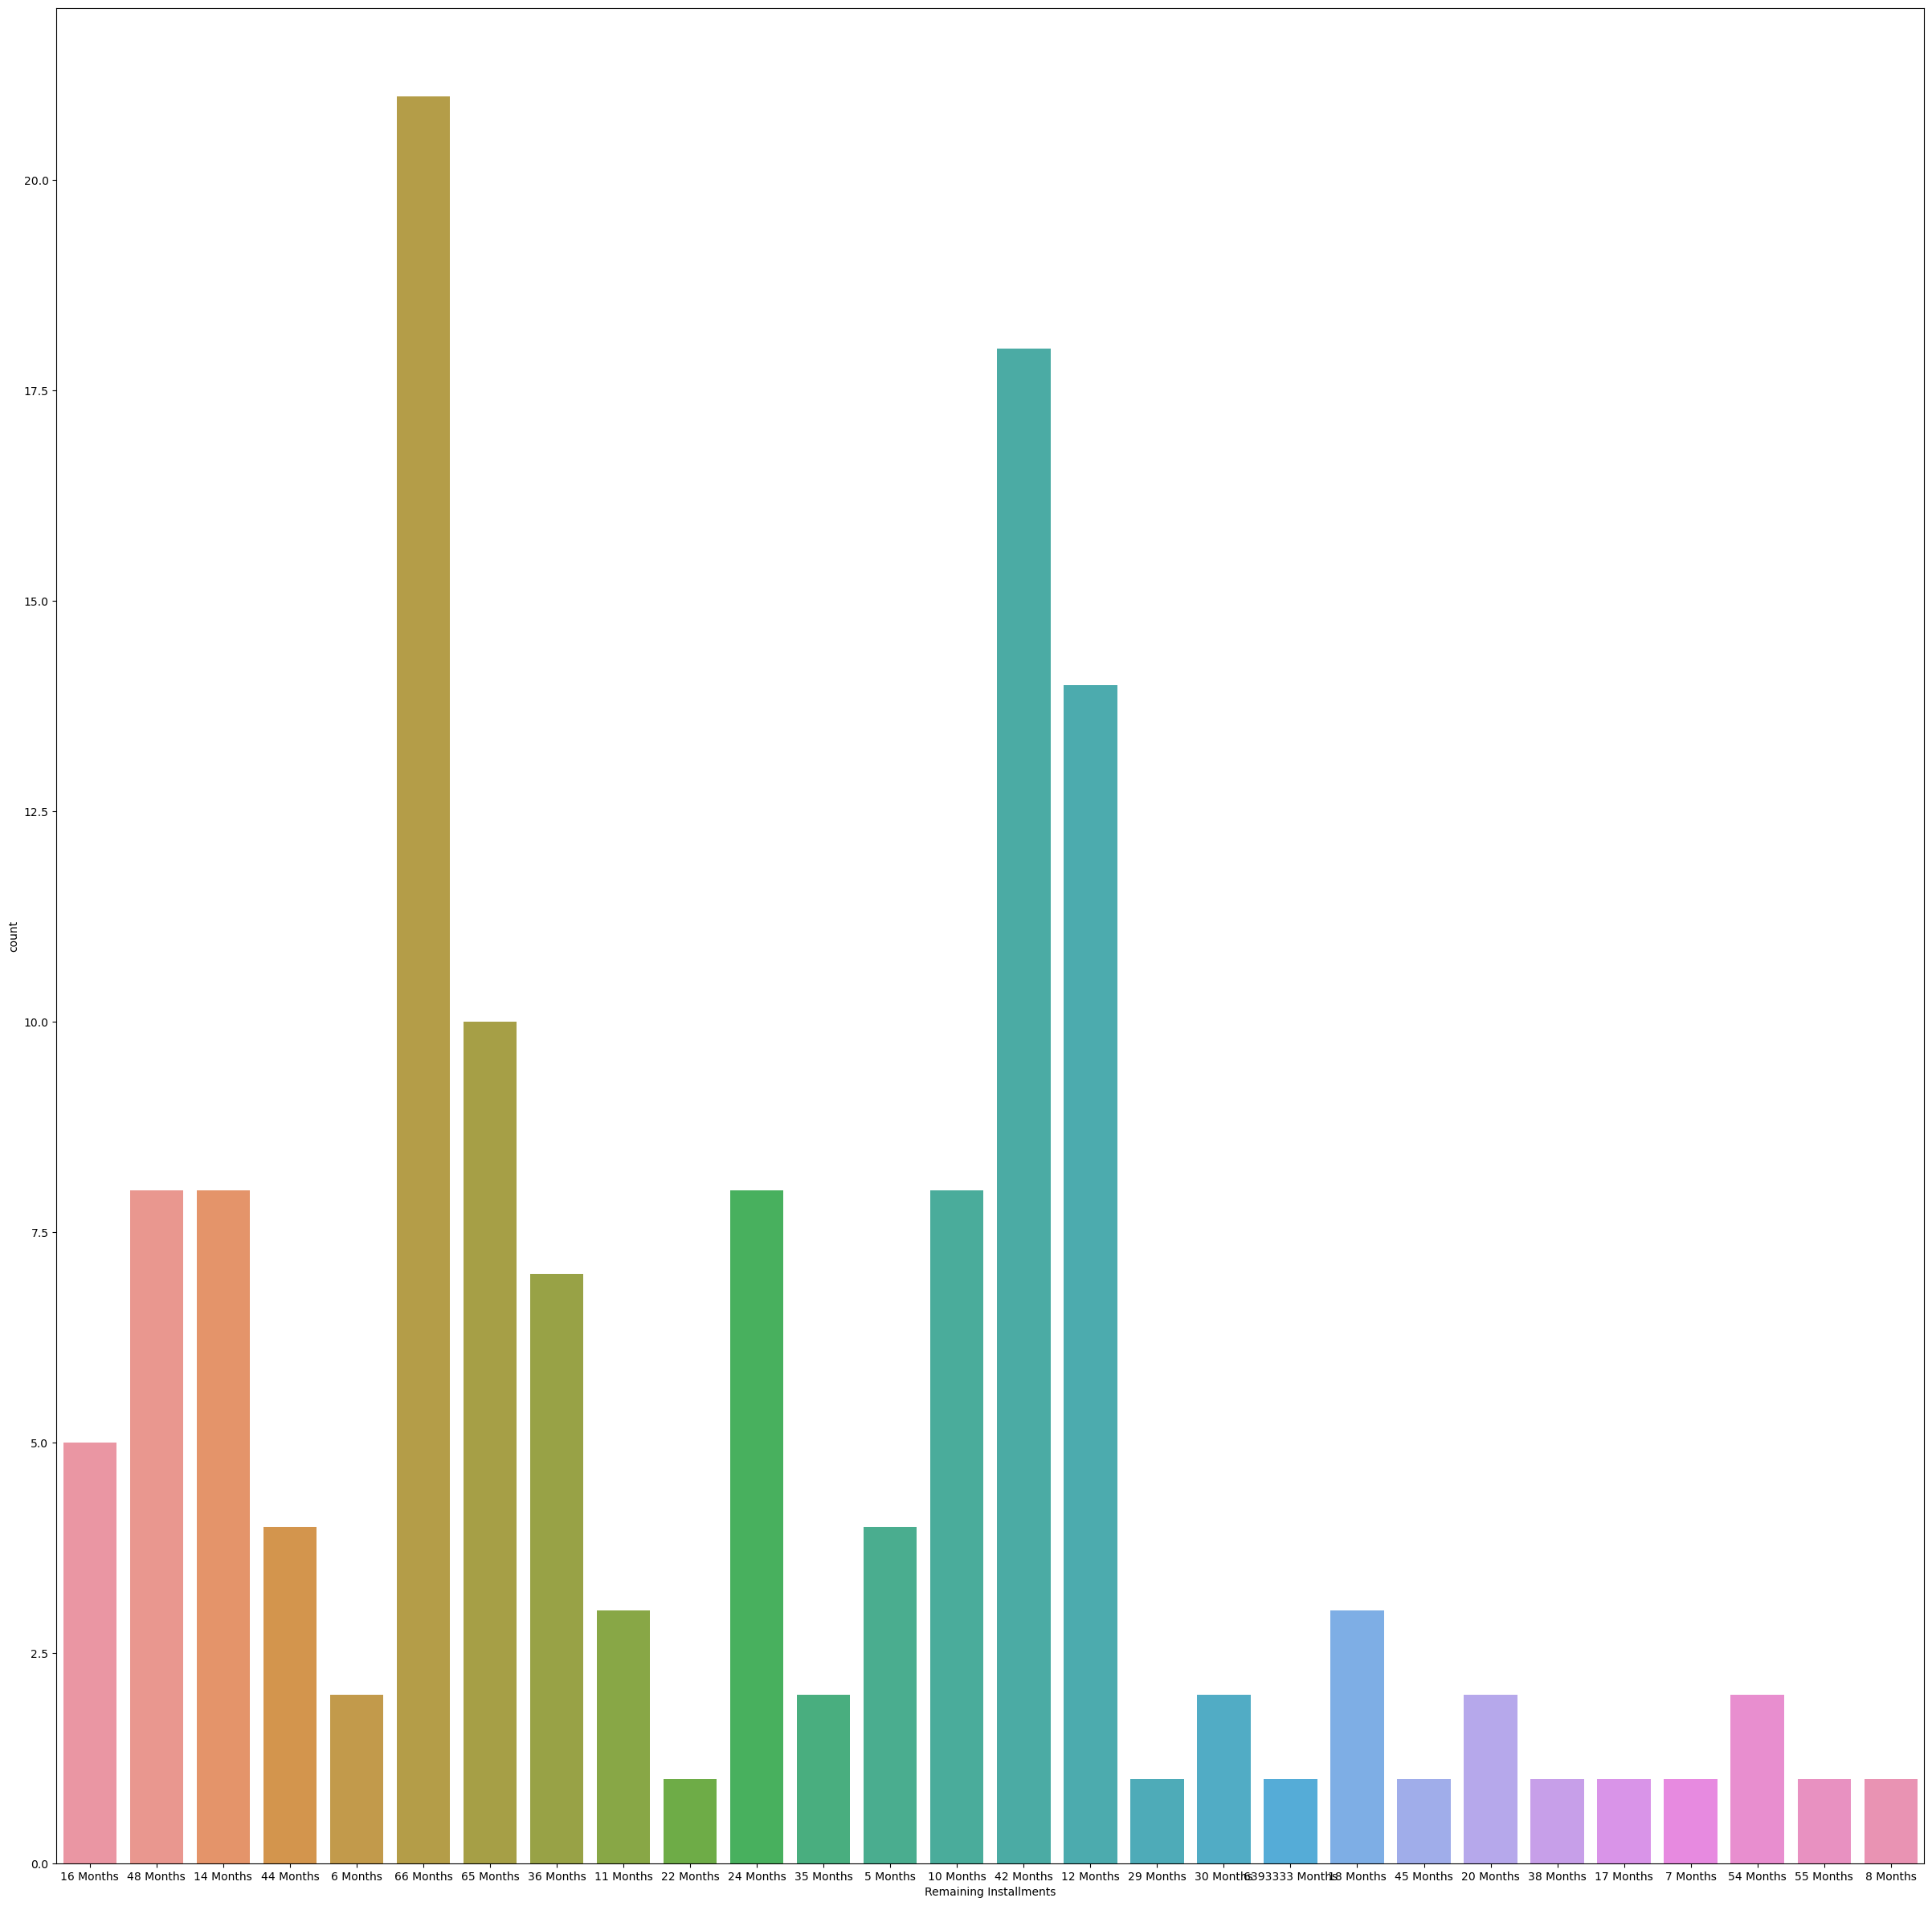

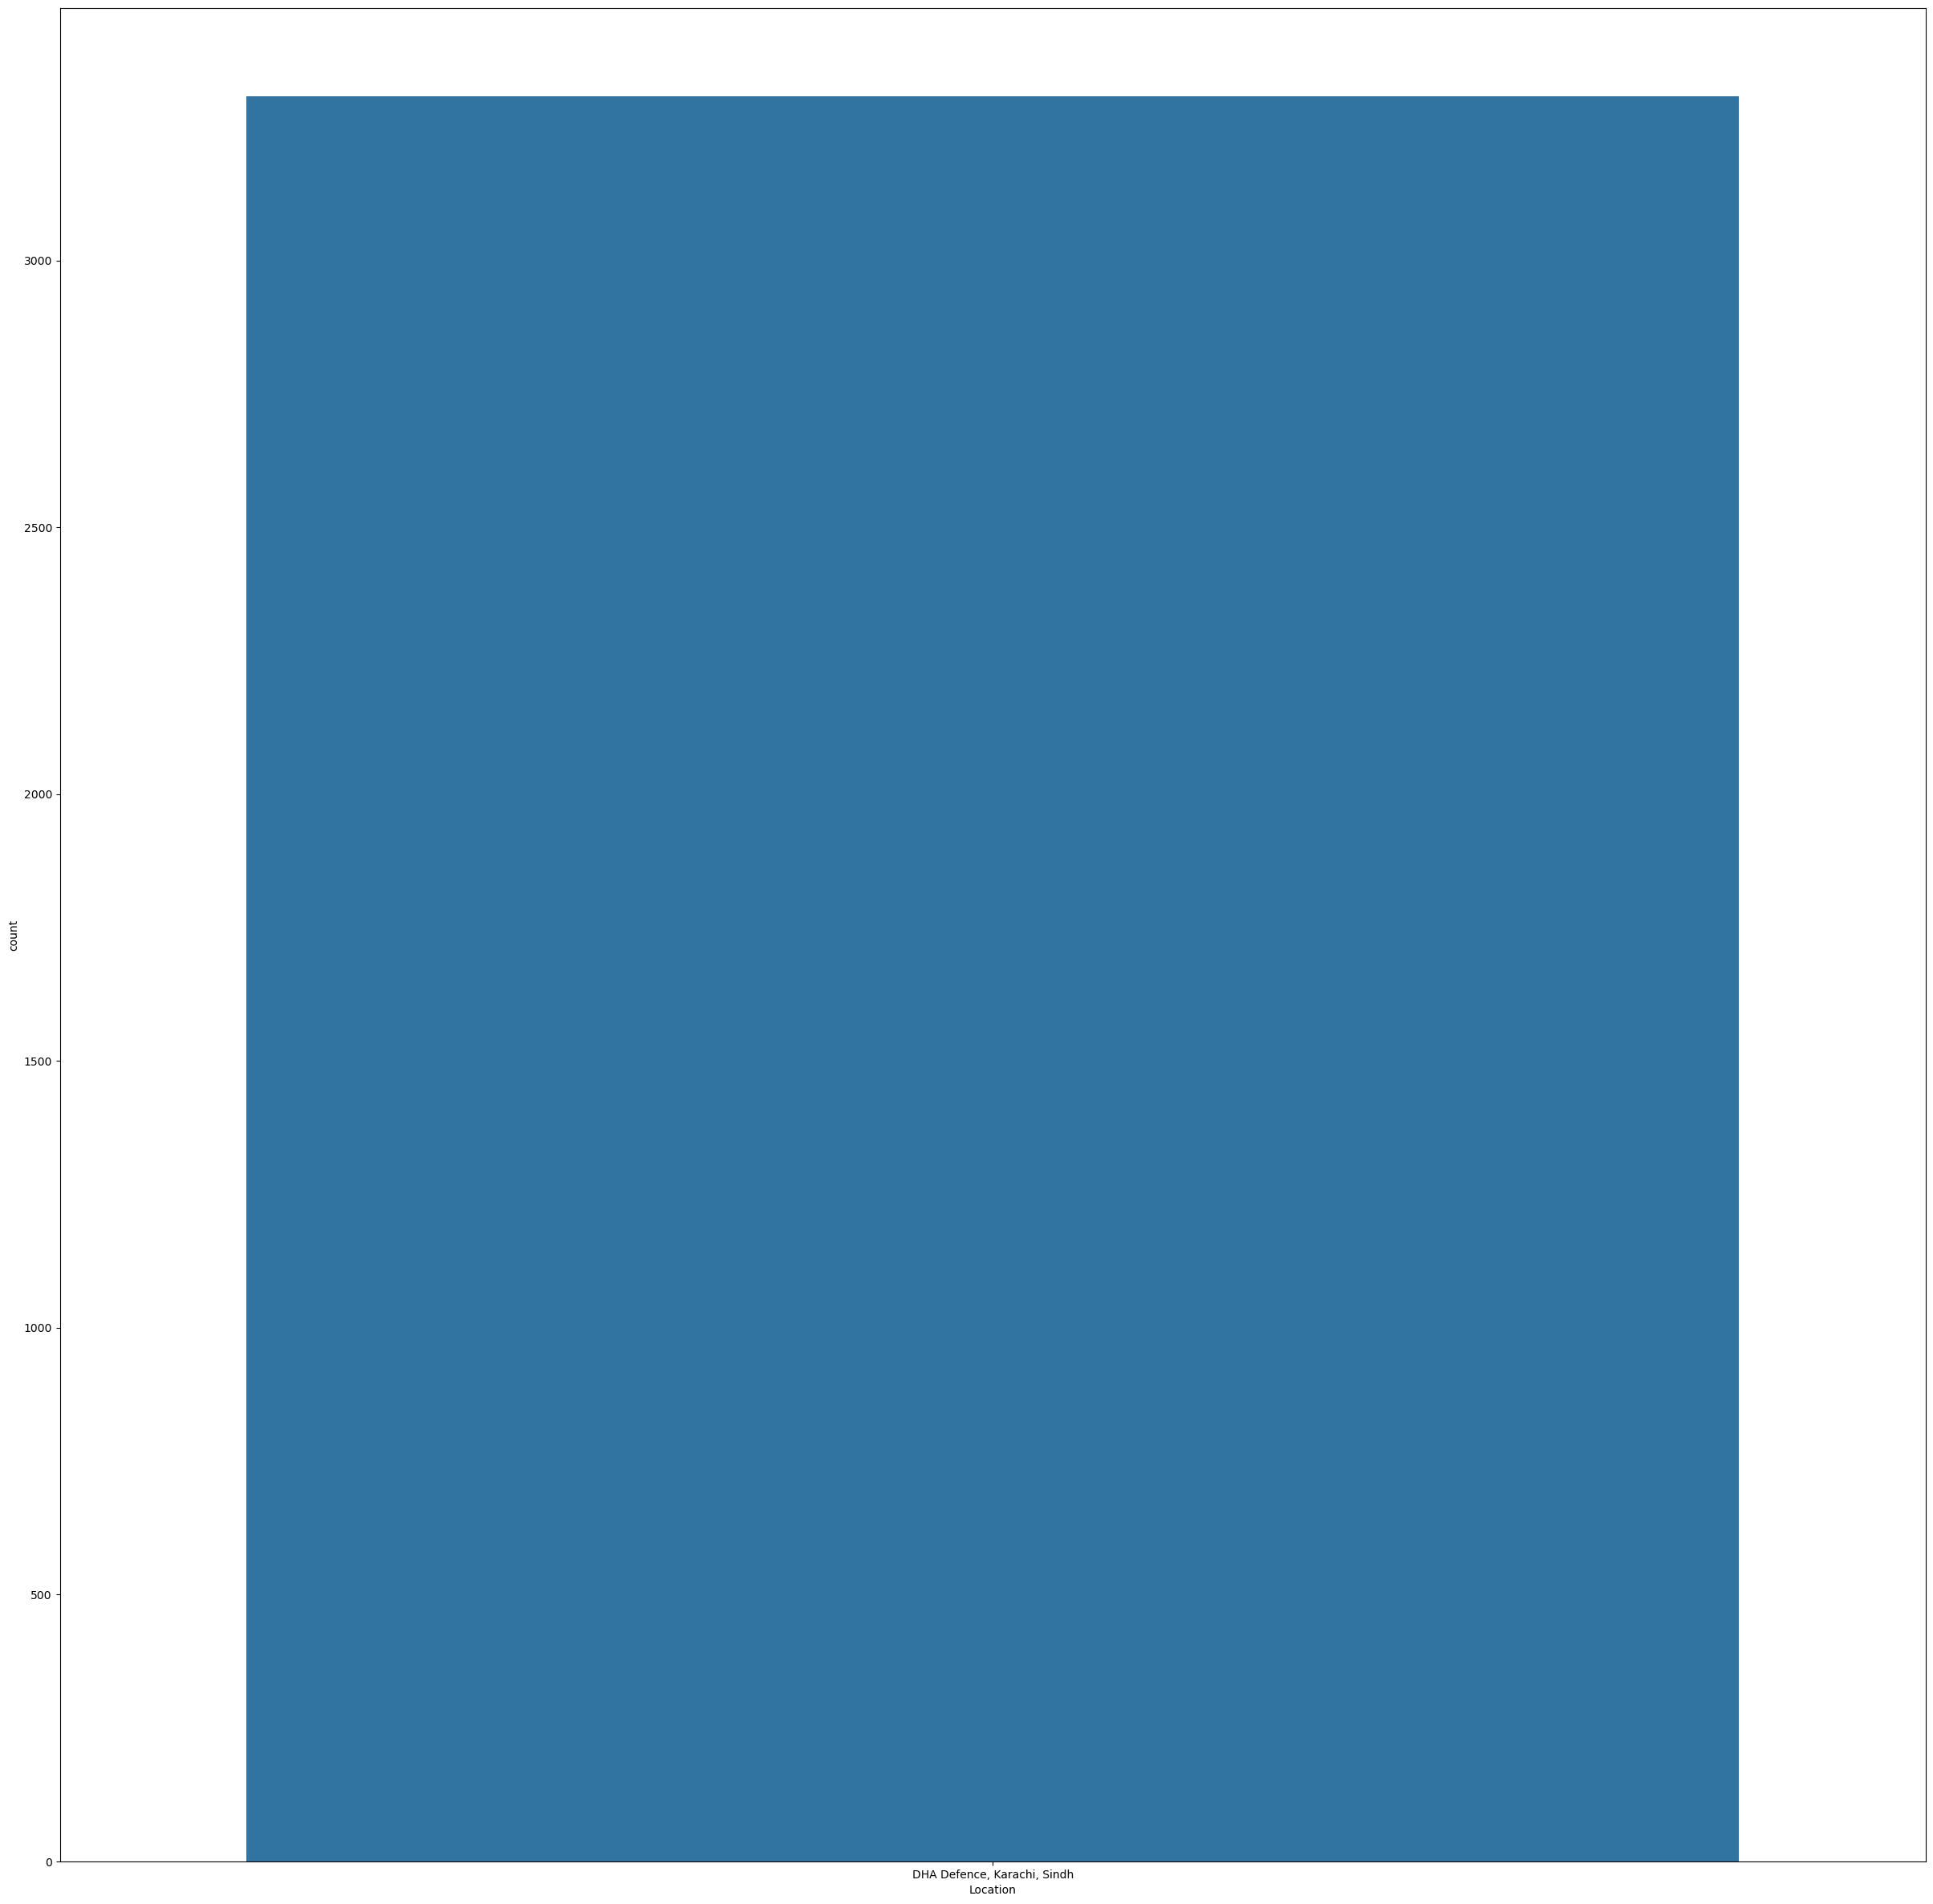

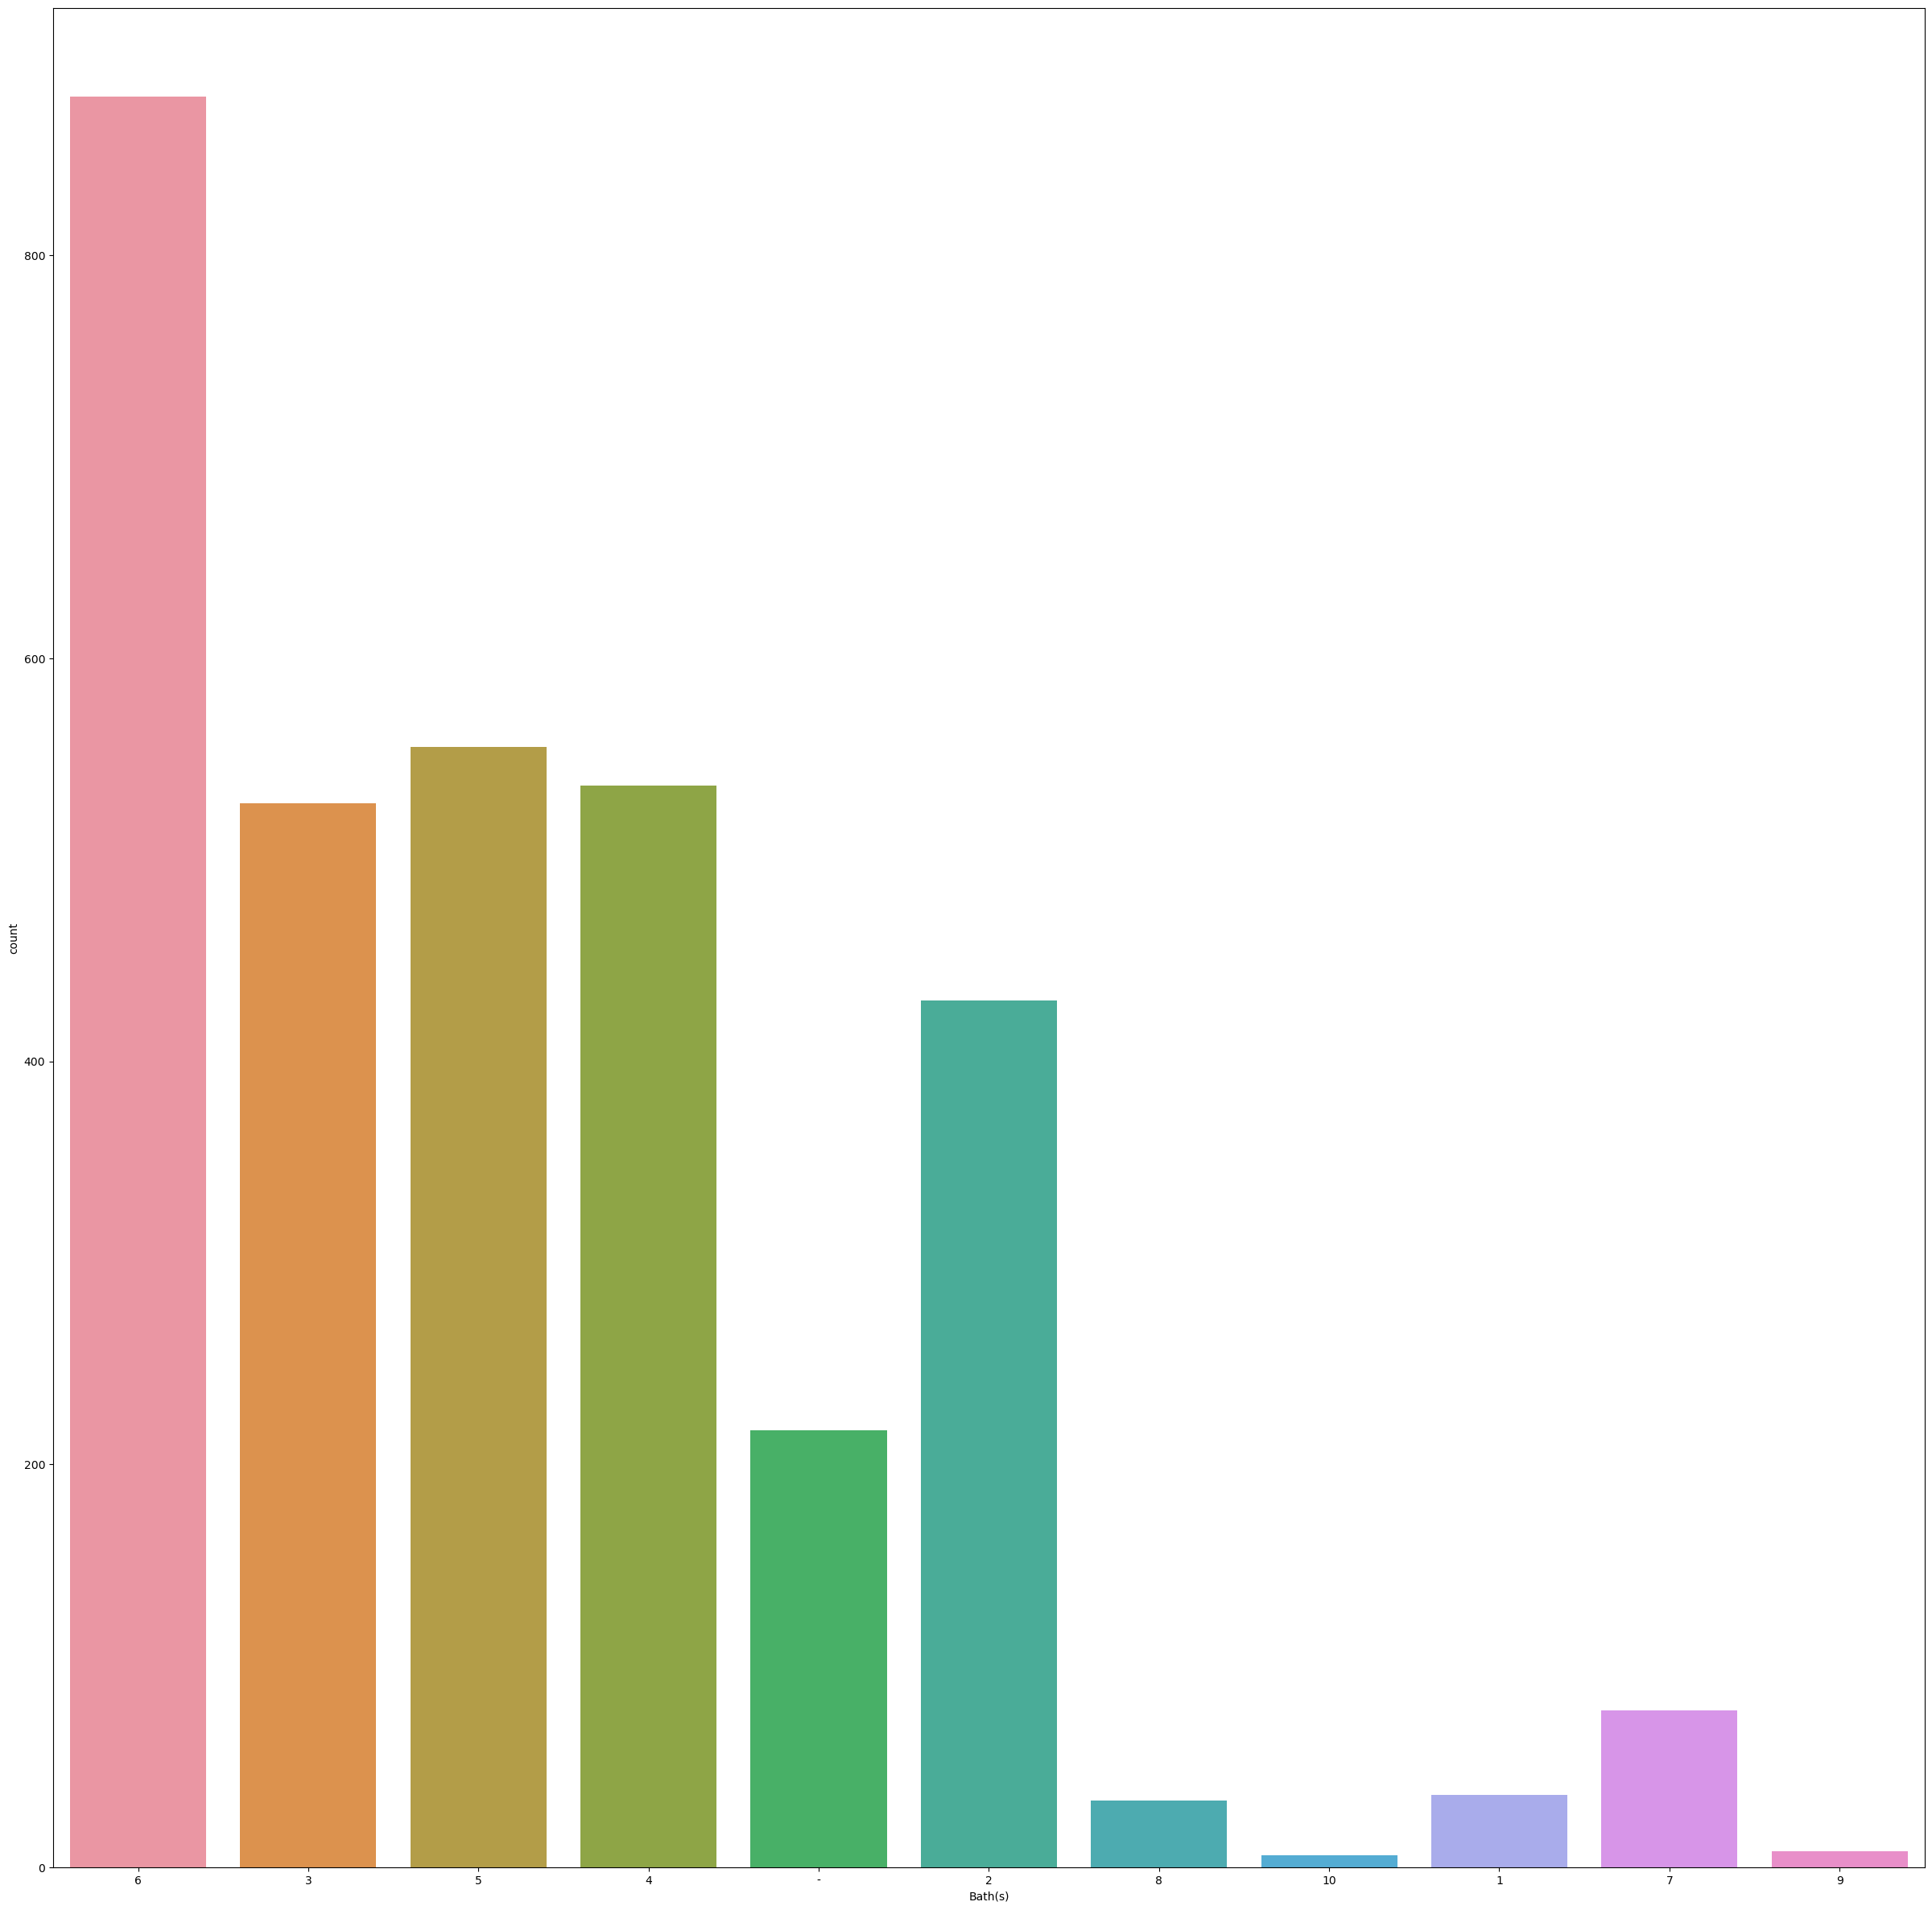

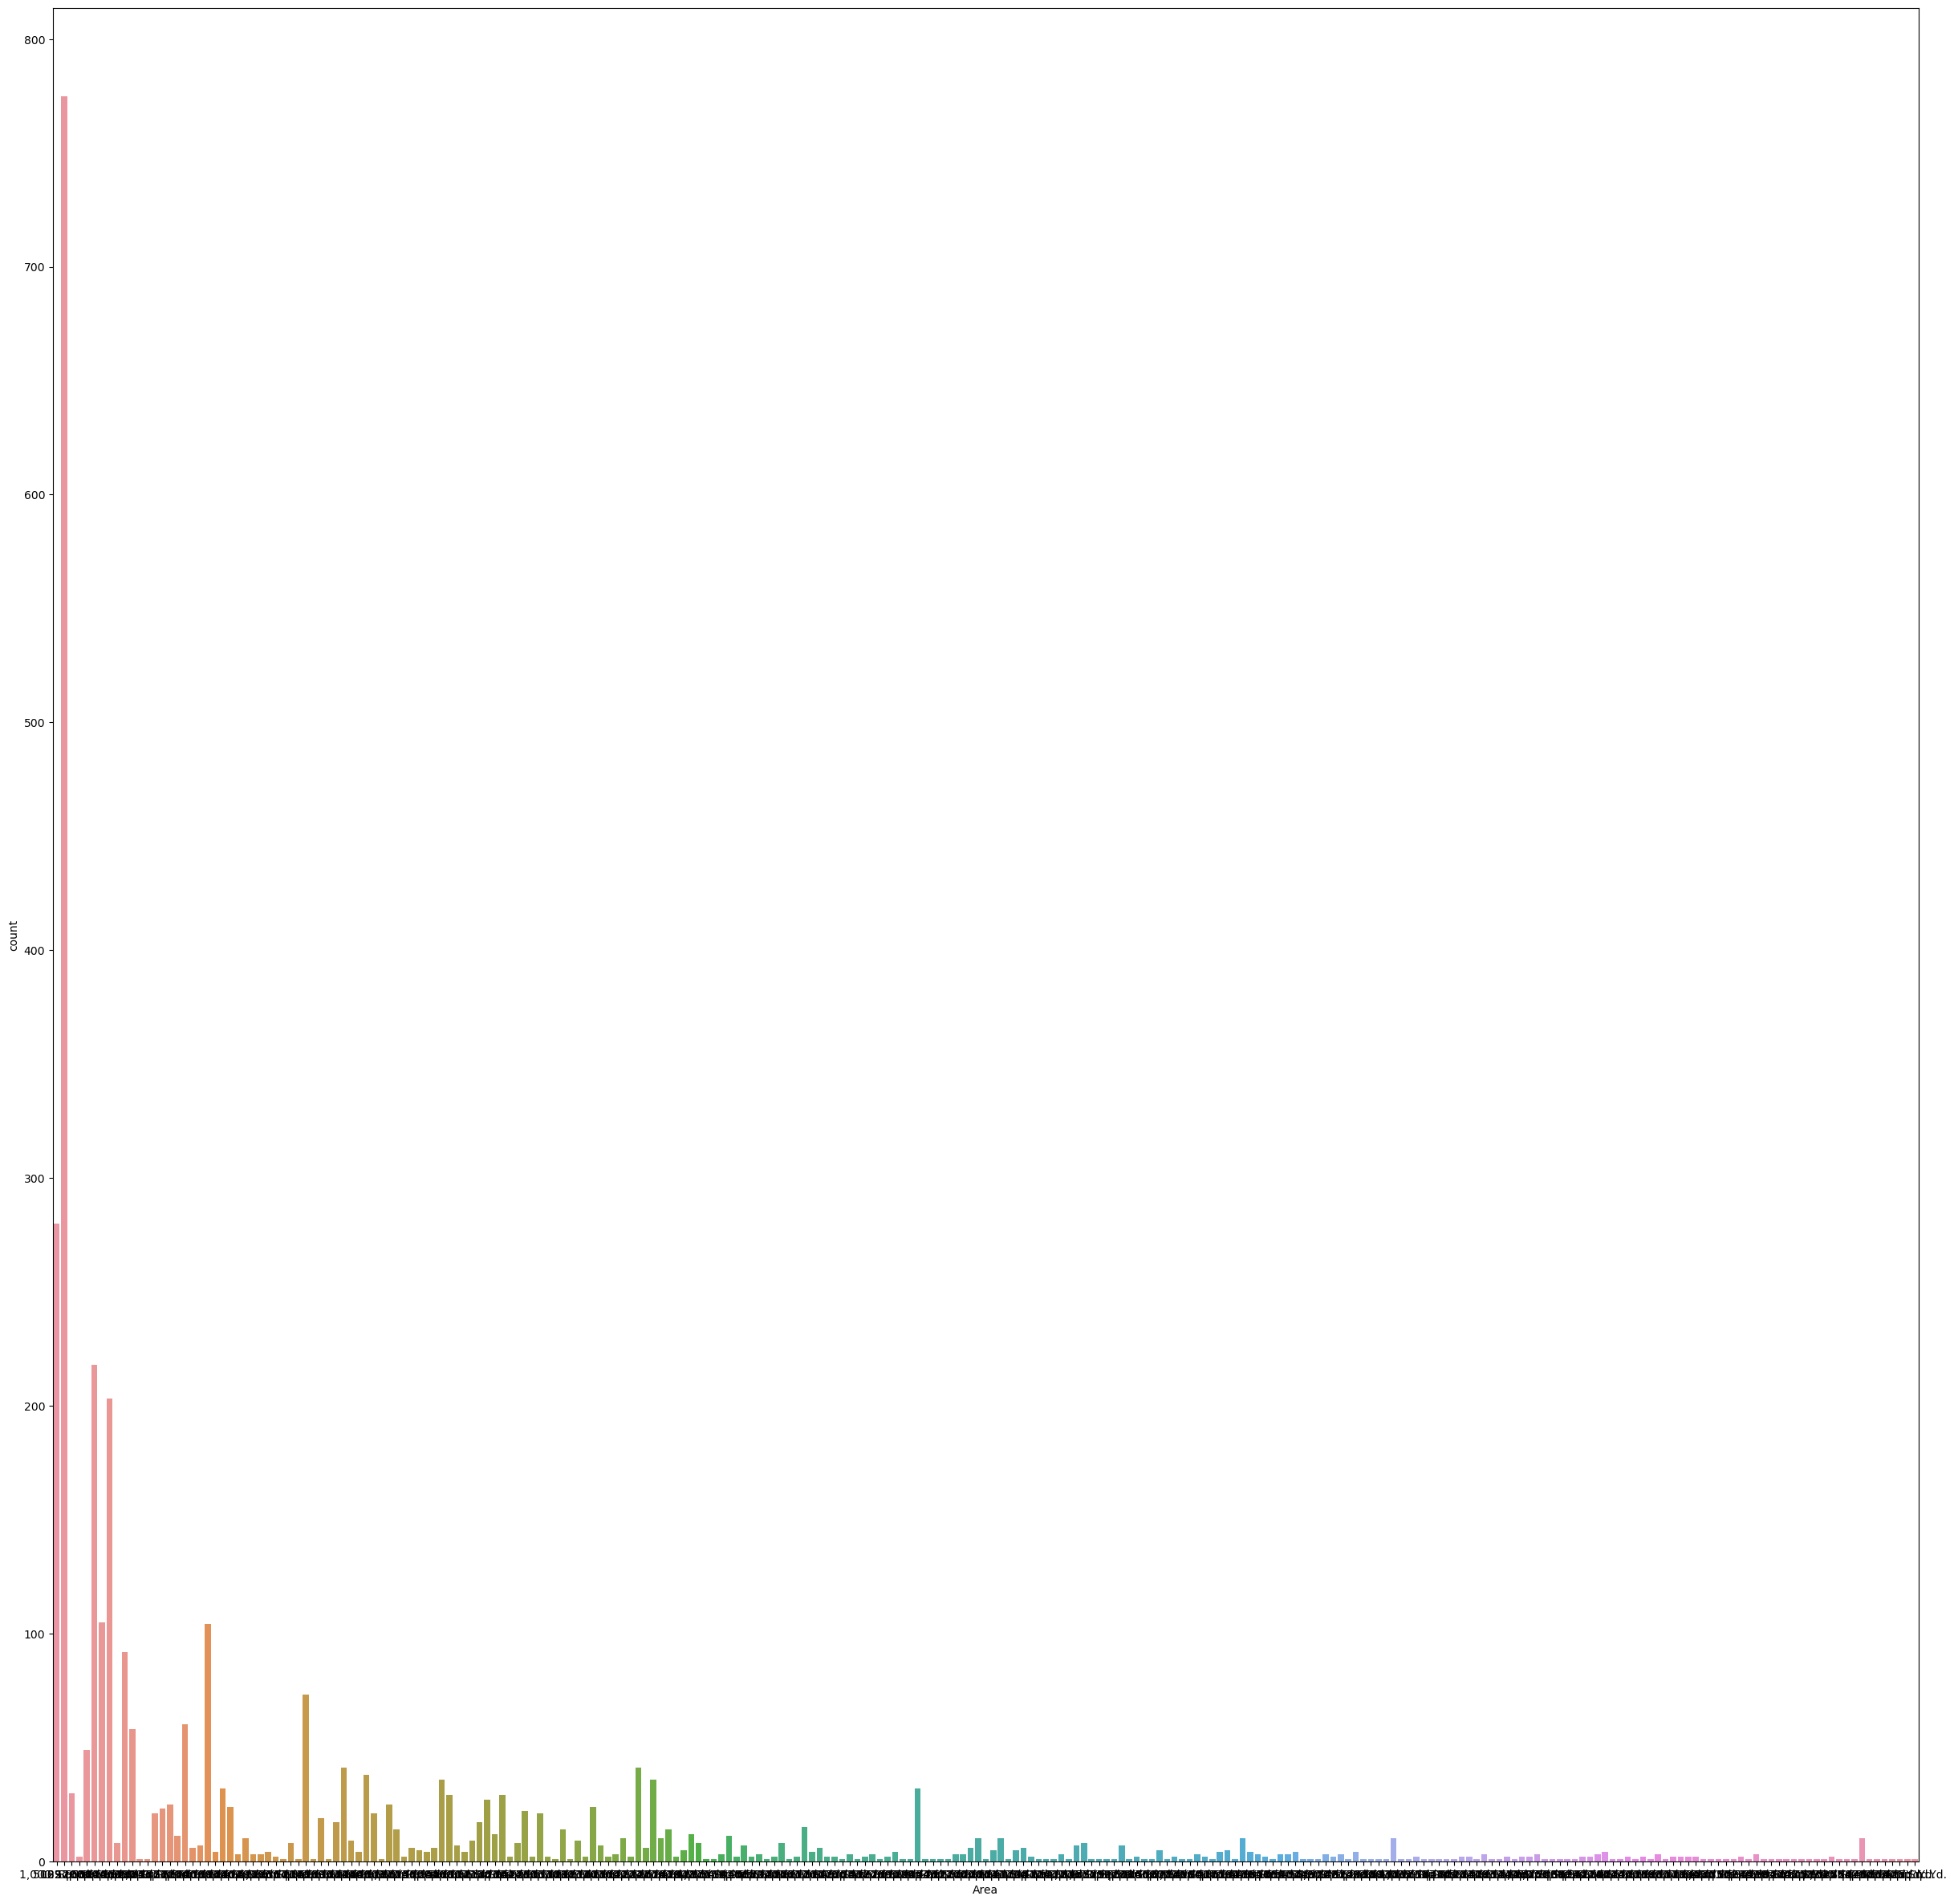

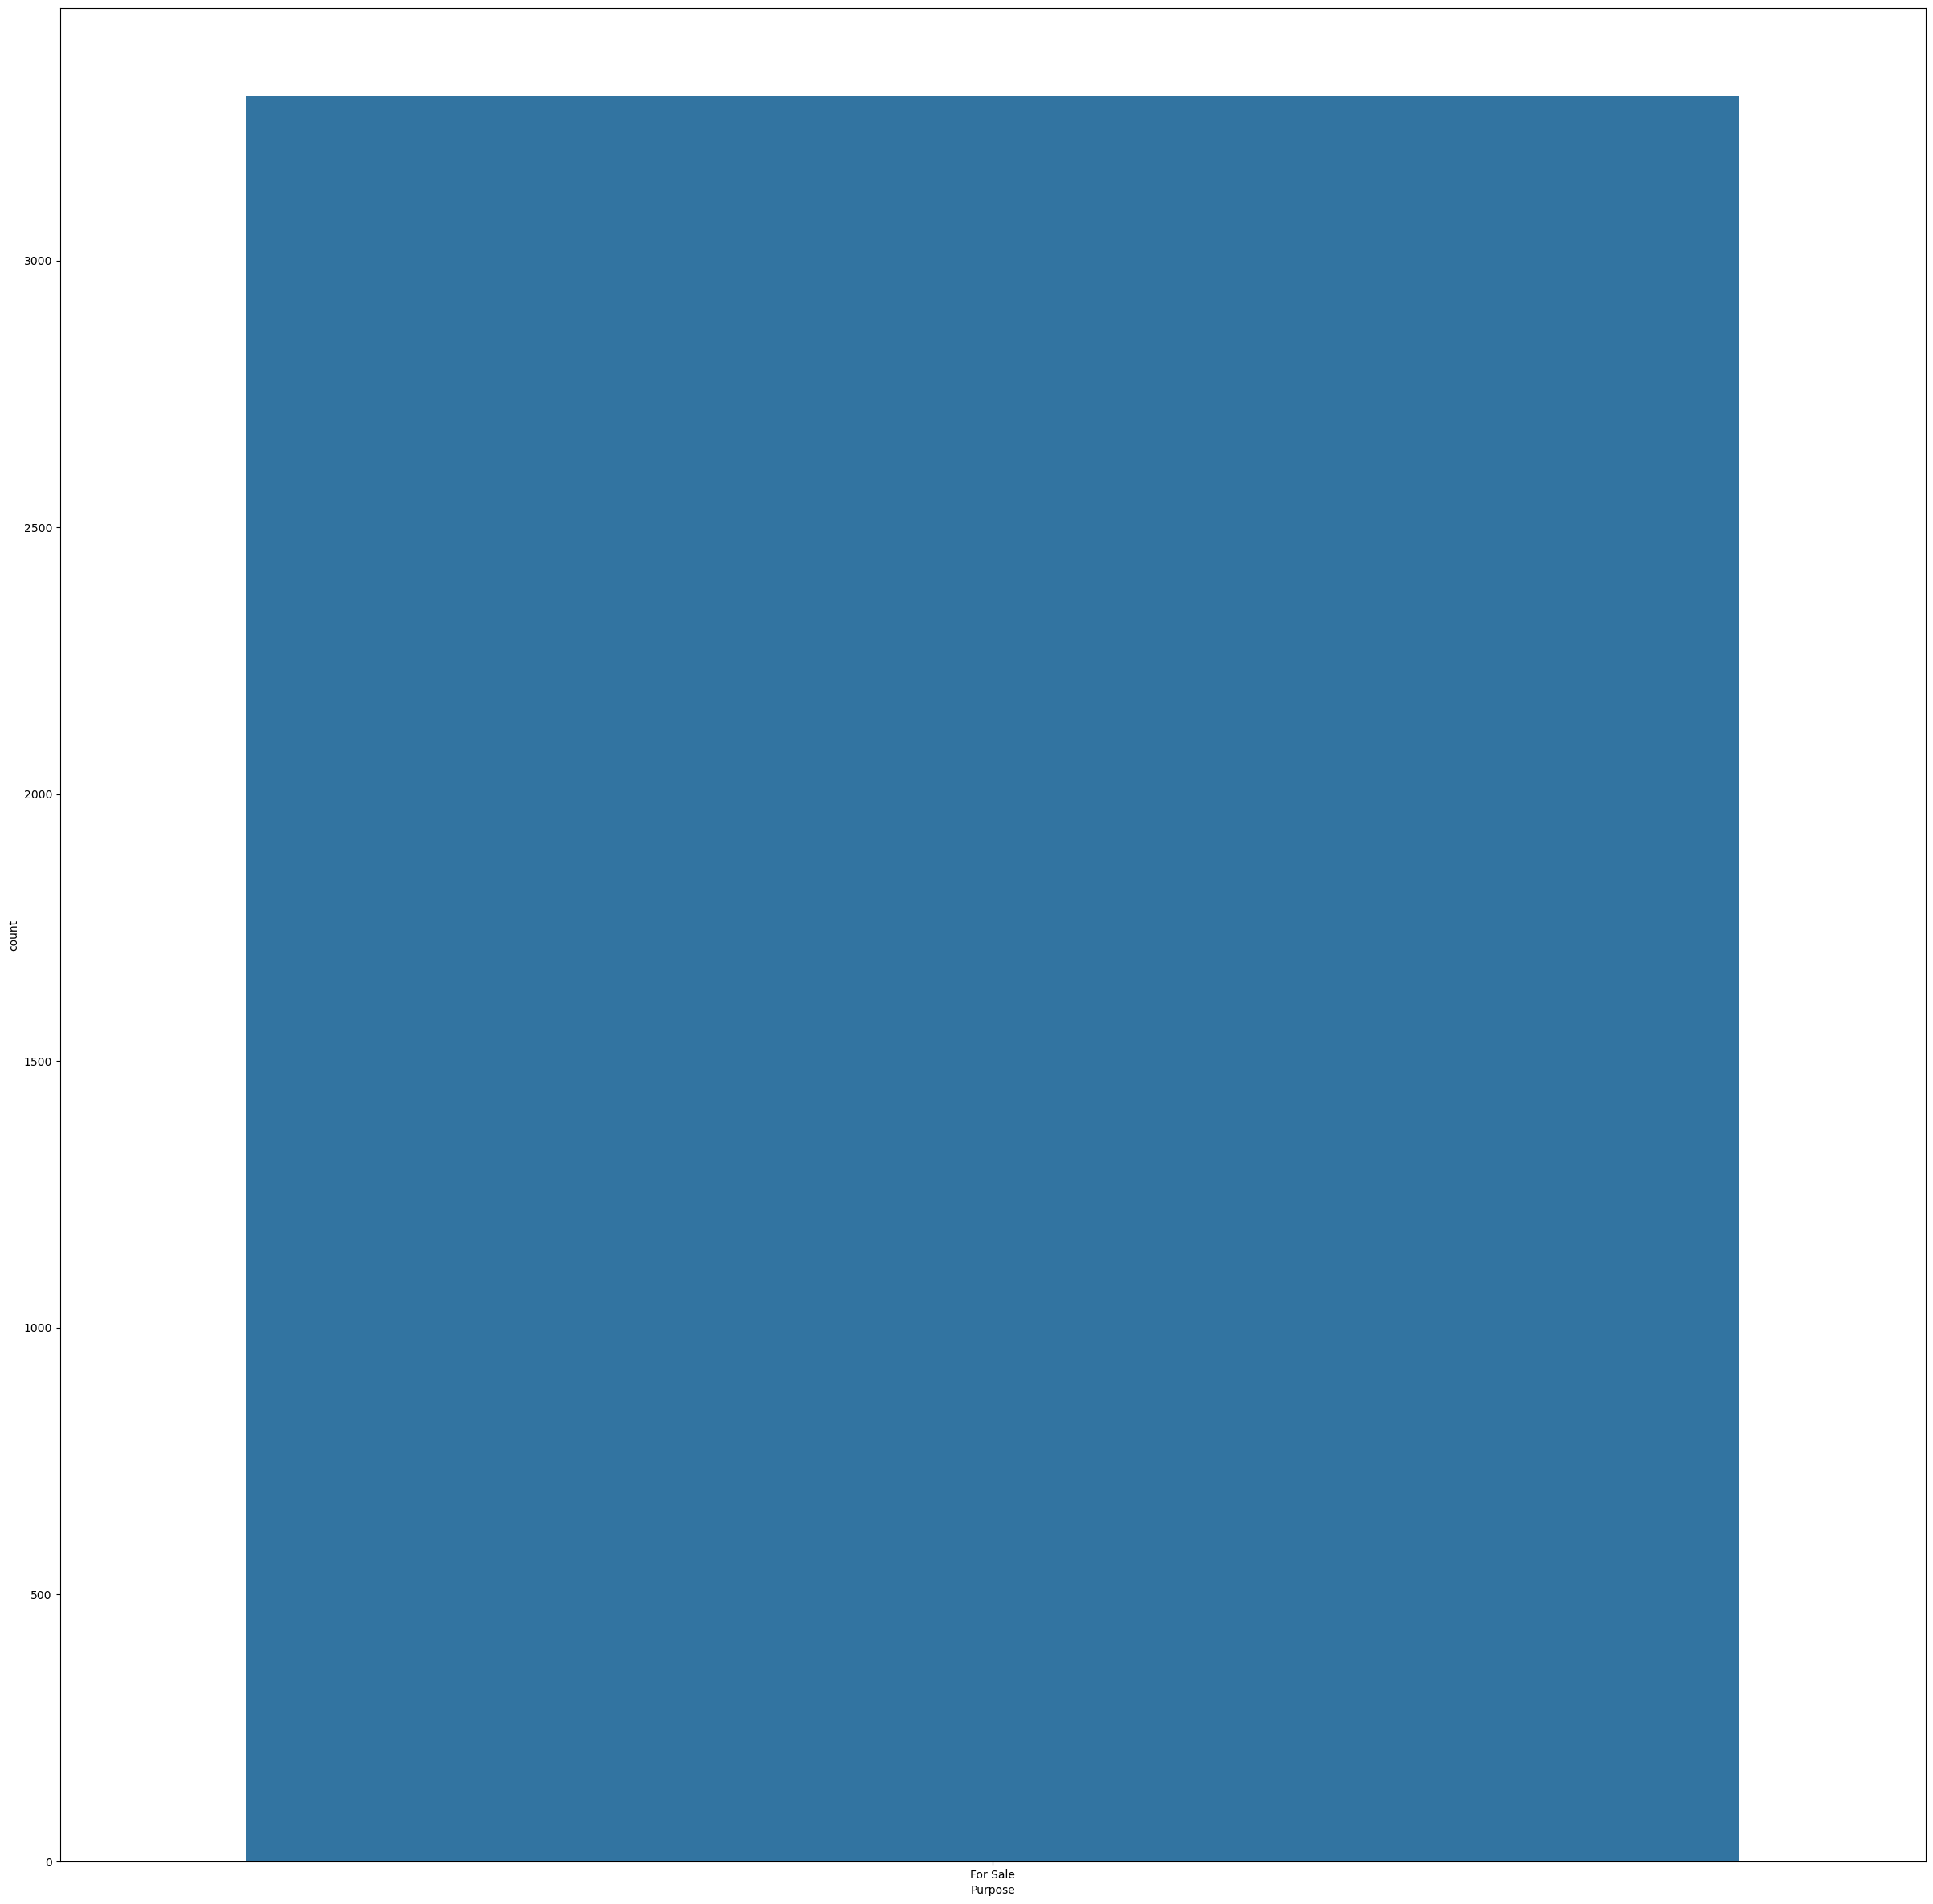

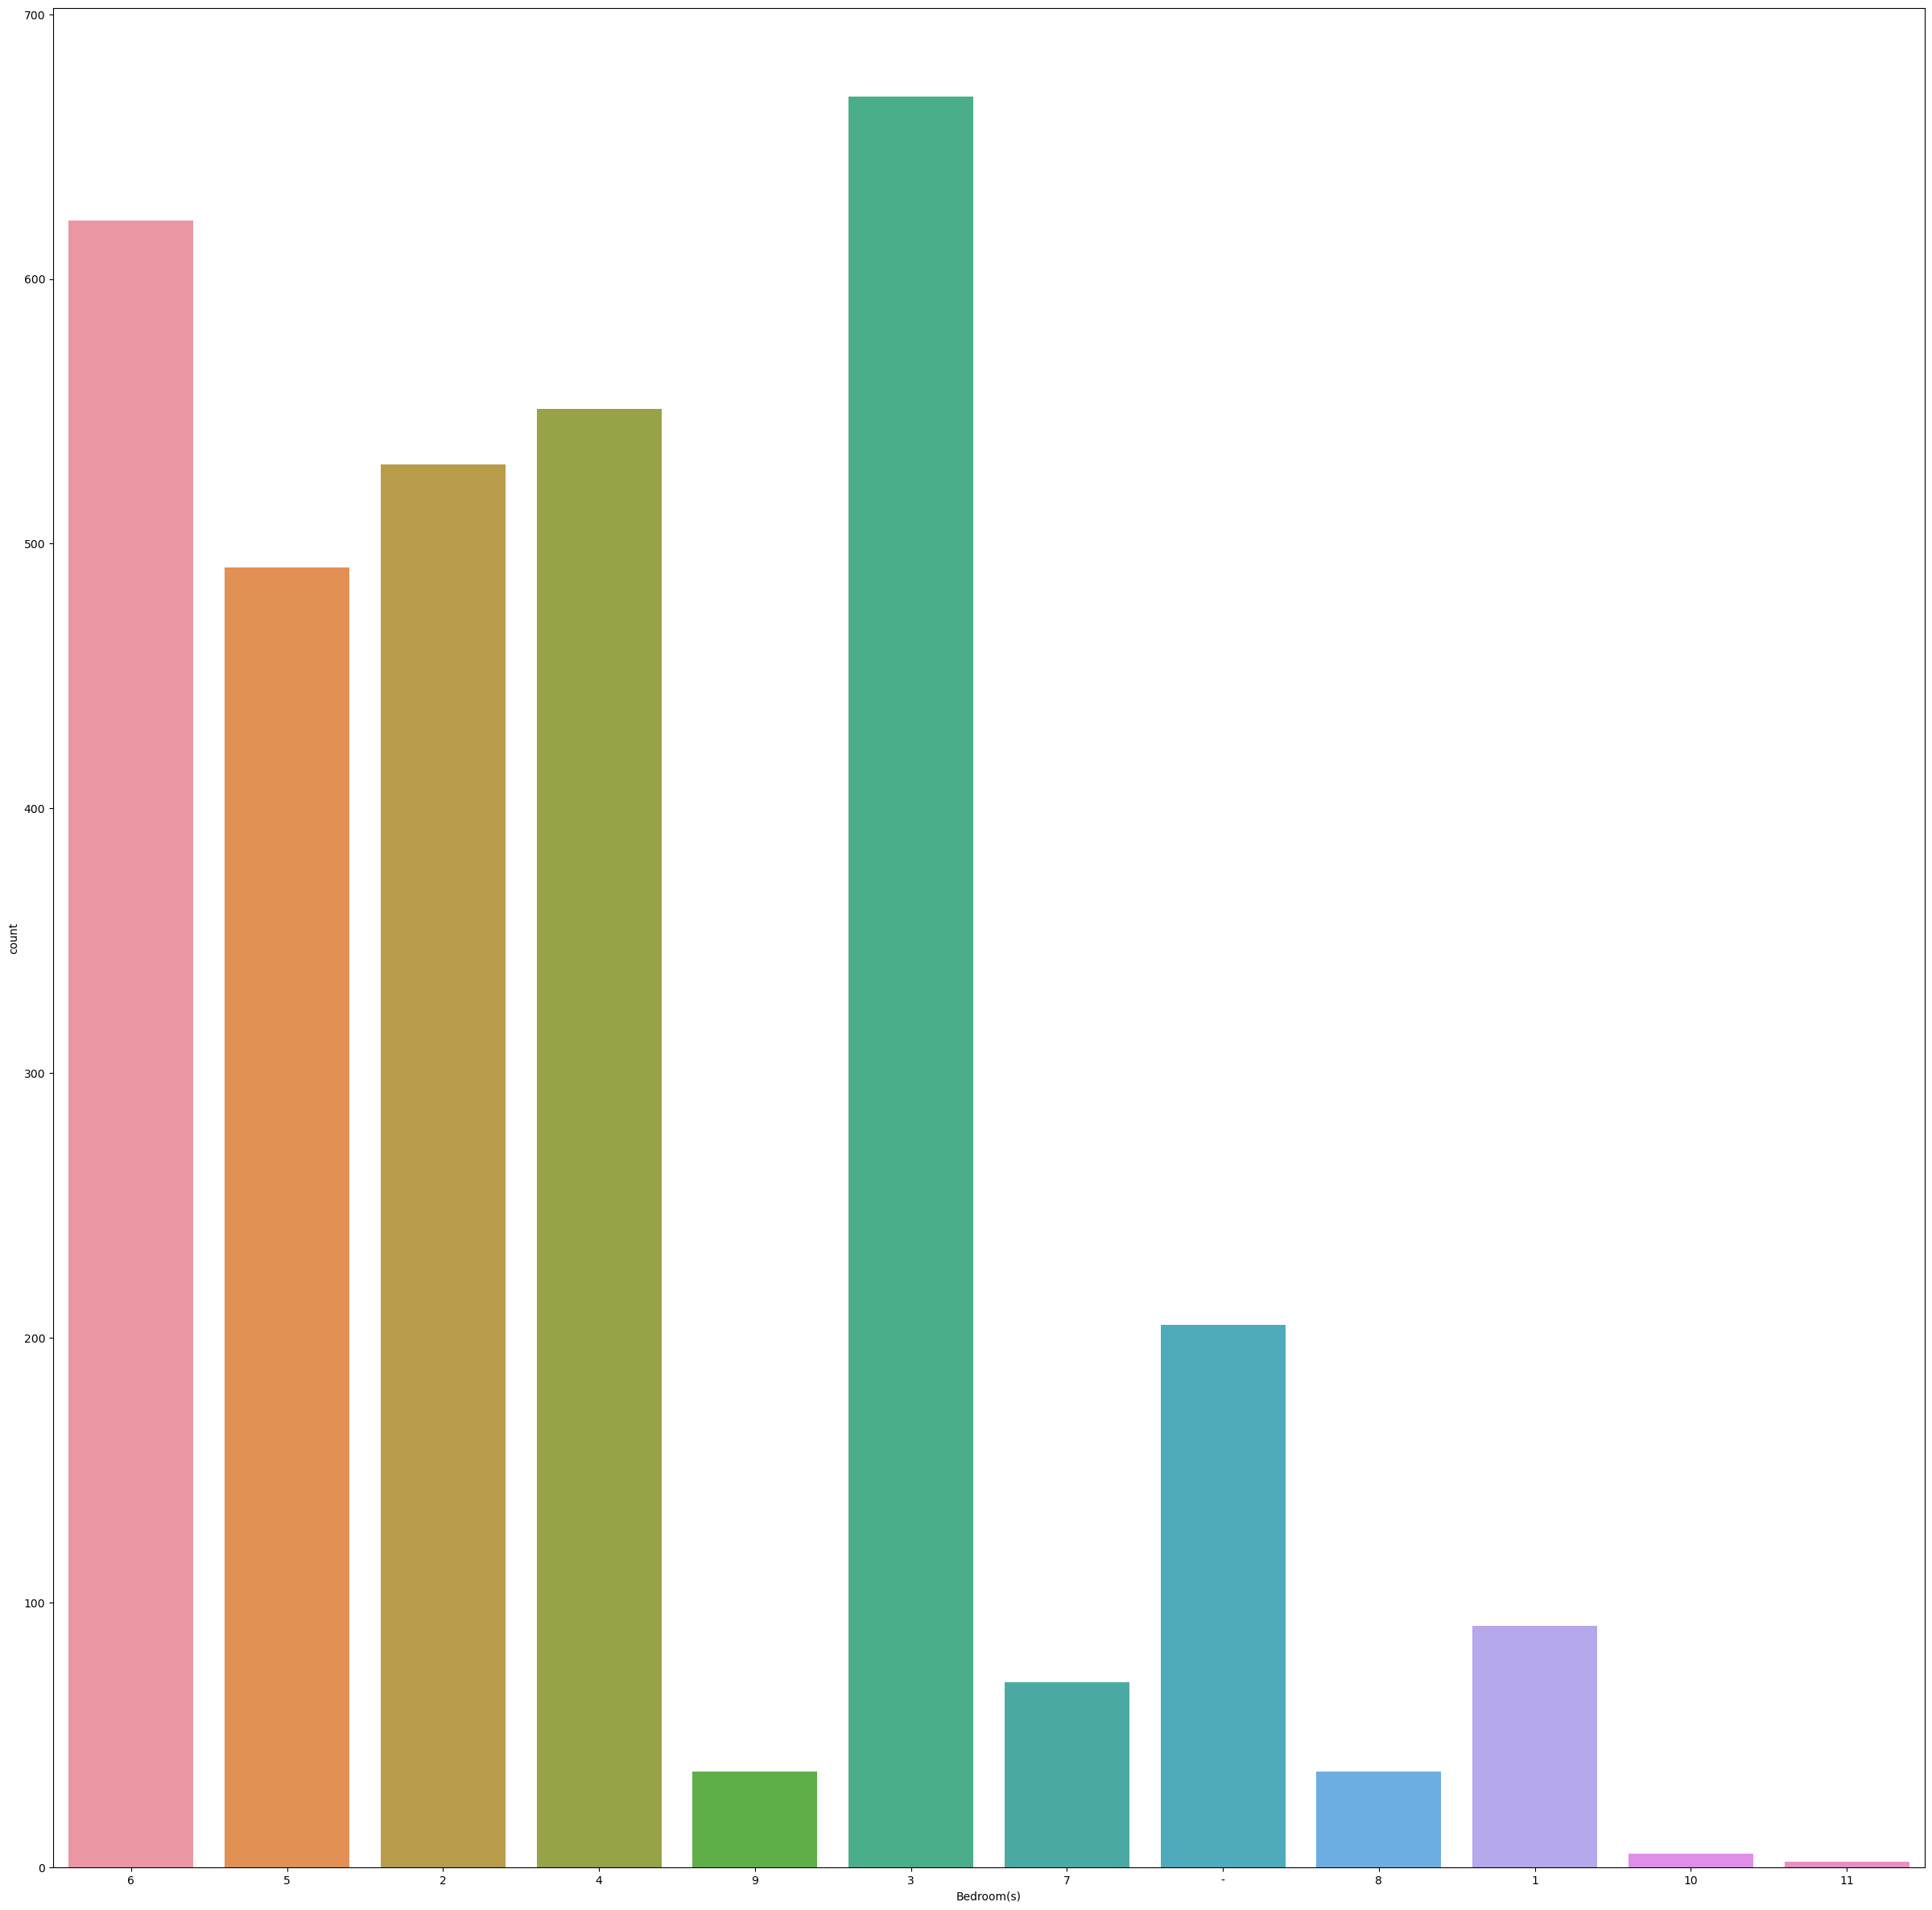

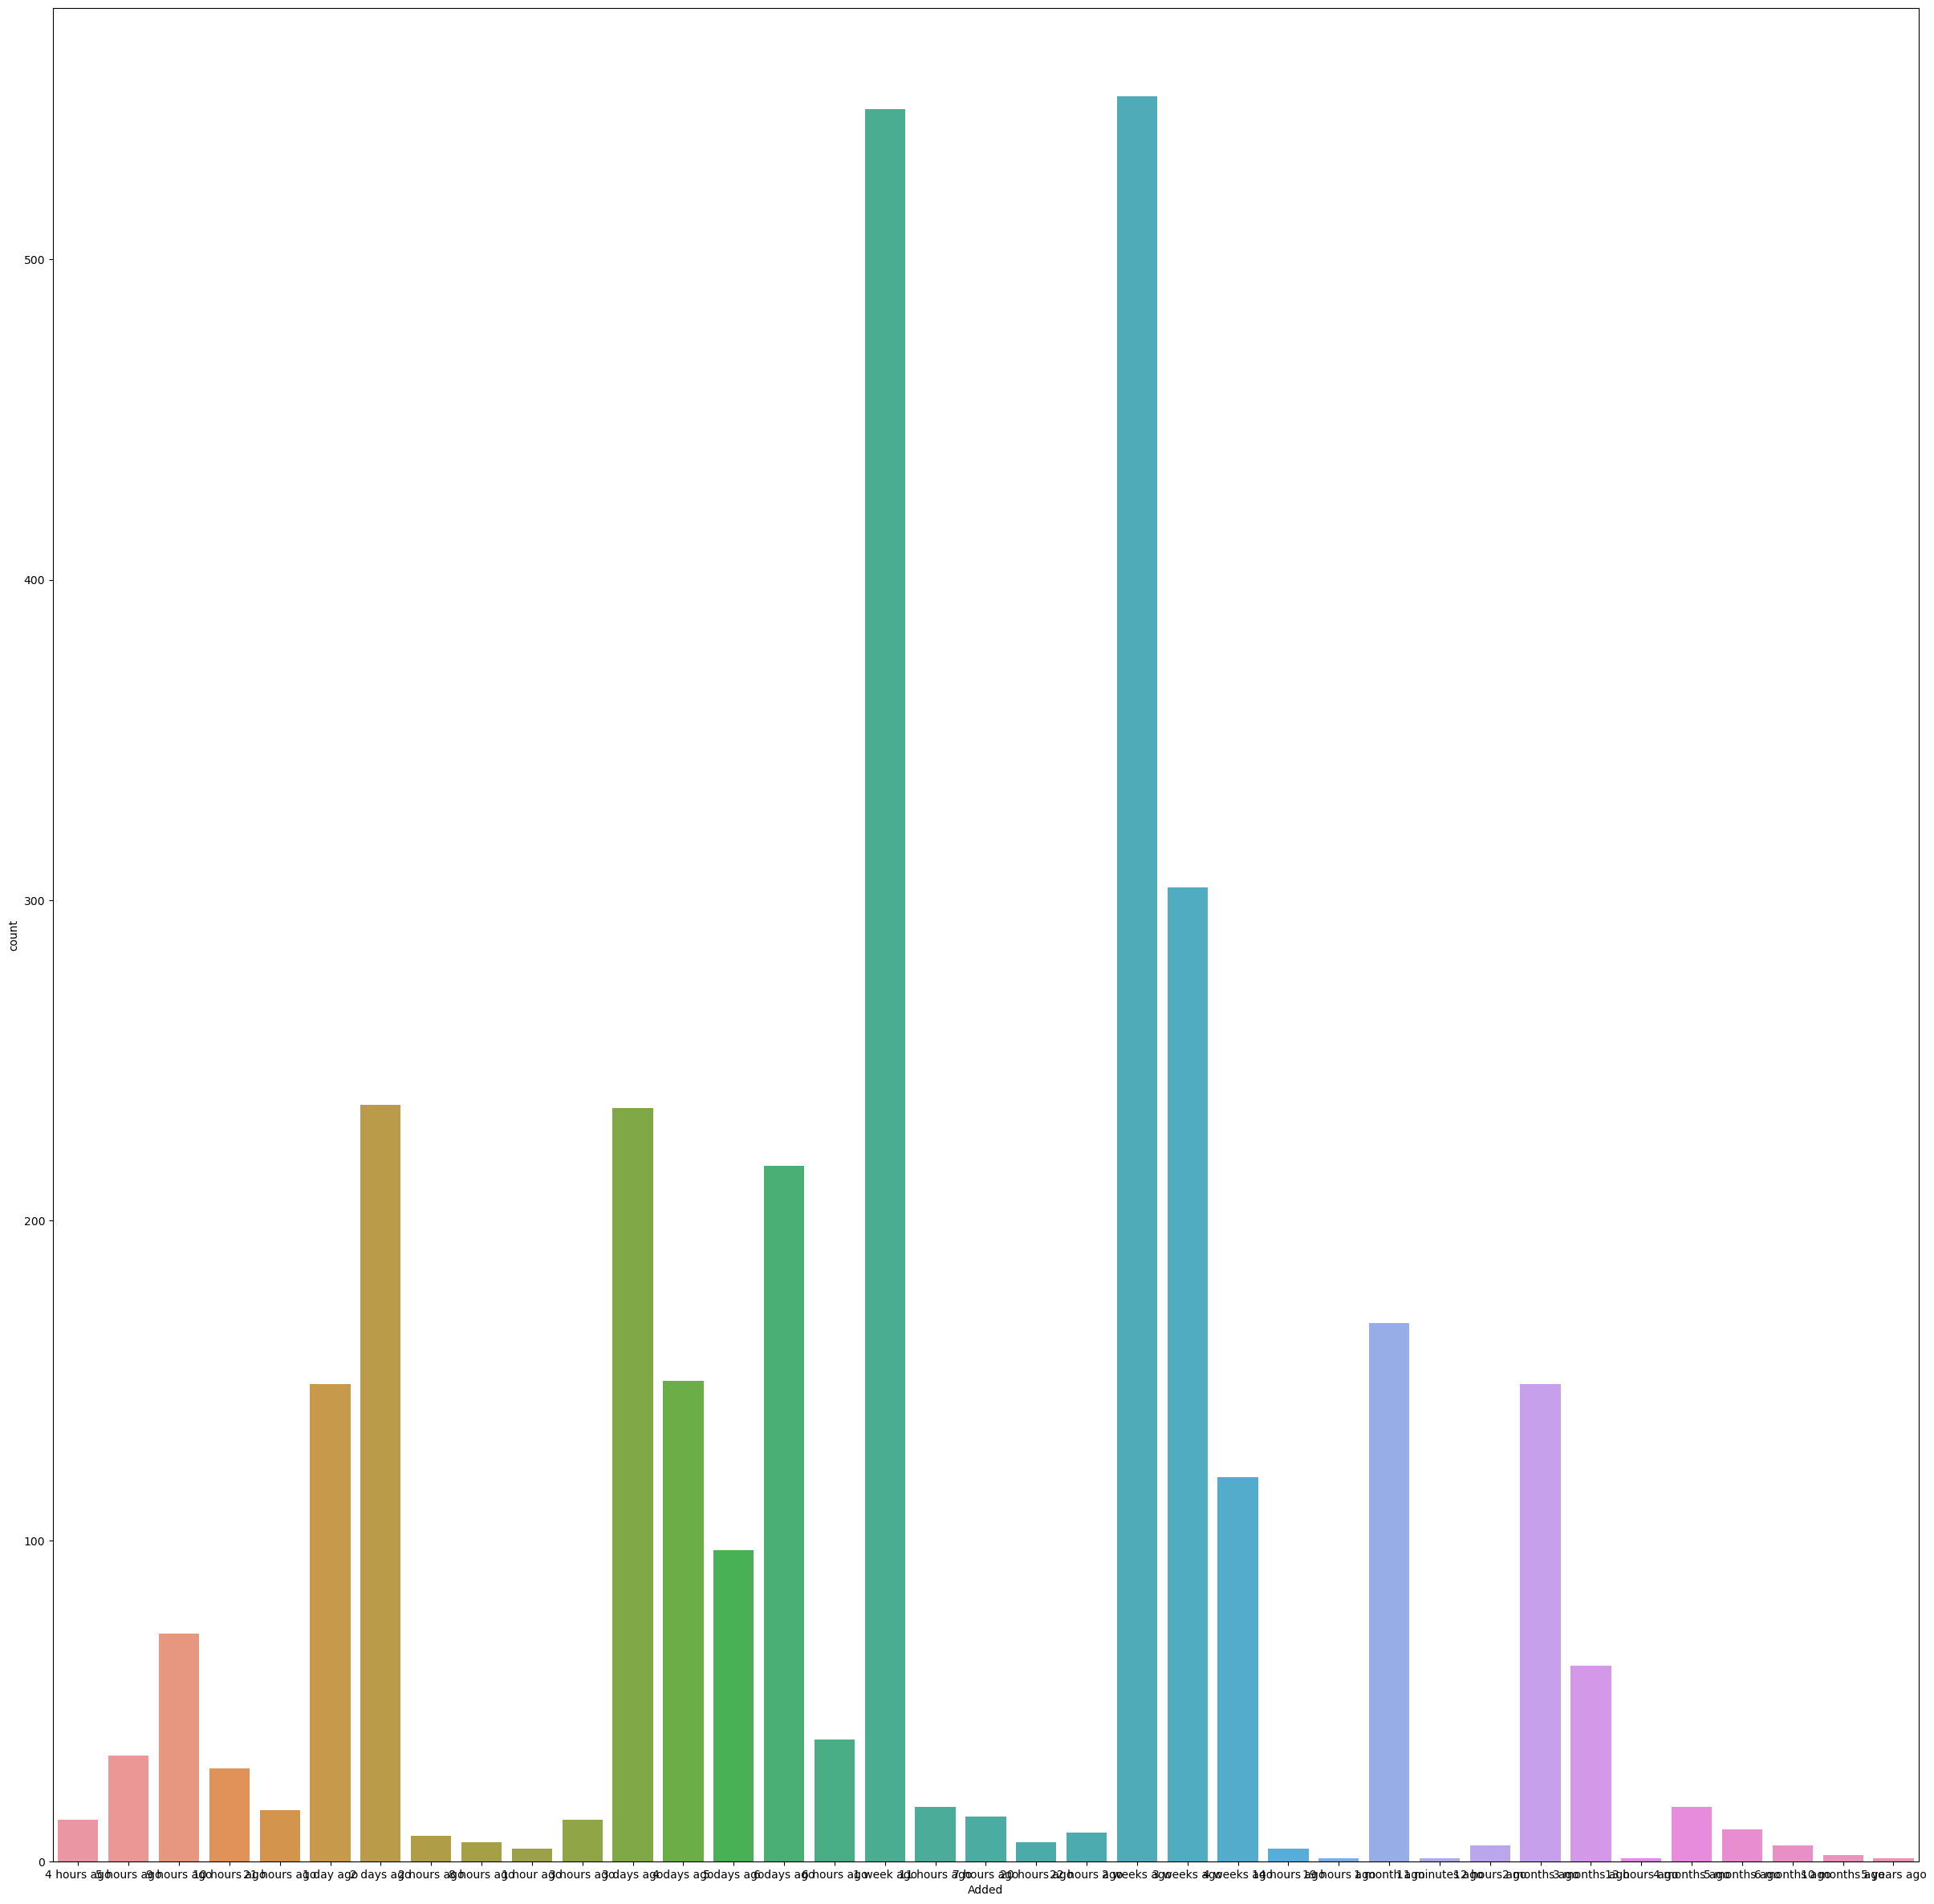

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

obj_columns = df.select_dtypes('object').columns
obj_columns = obj_columns[1:]

# Plot for each identified column
for c in df[obj_columns].columns:
    plt.figure(figsize=(30,30))
    sns.countplot(x=c,data=df);

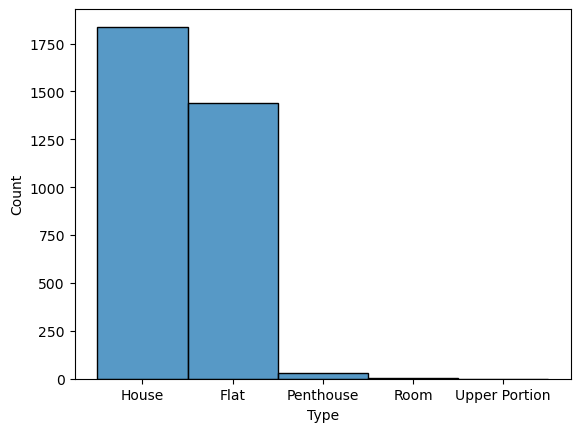

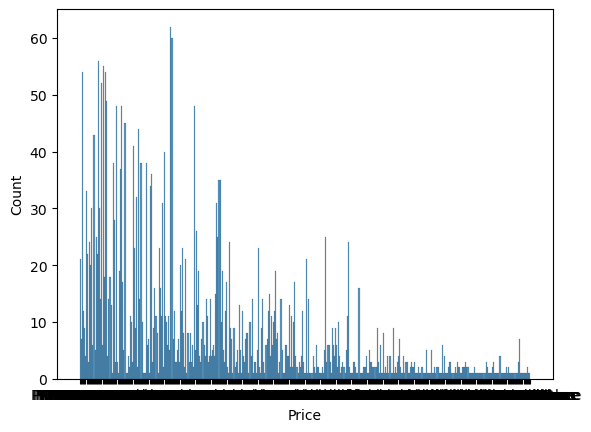

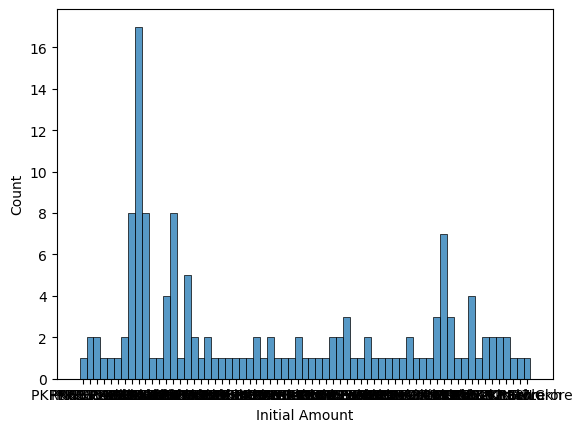

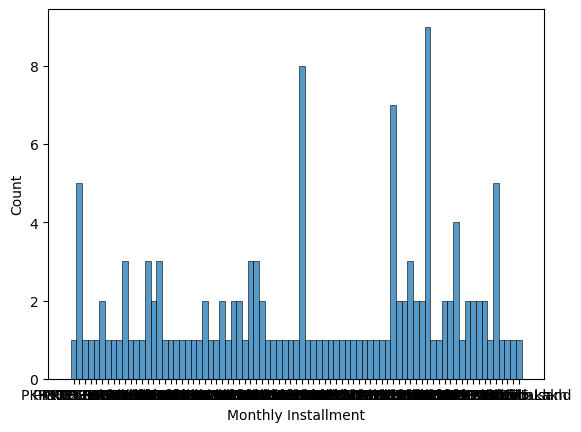

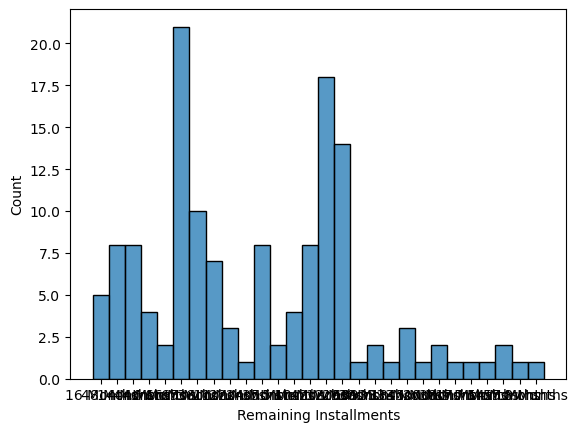

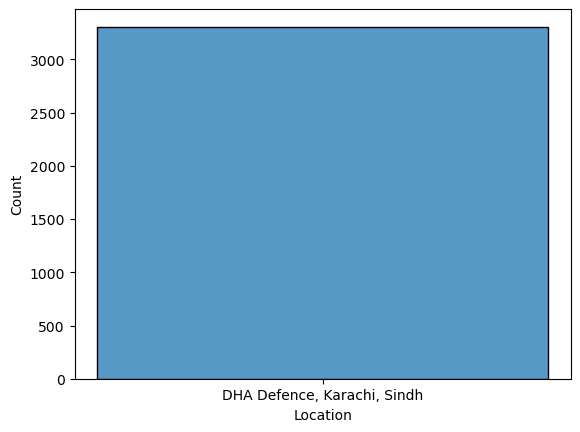

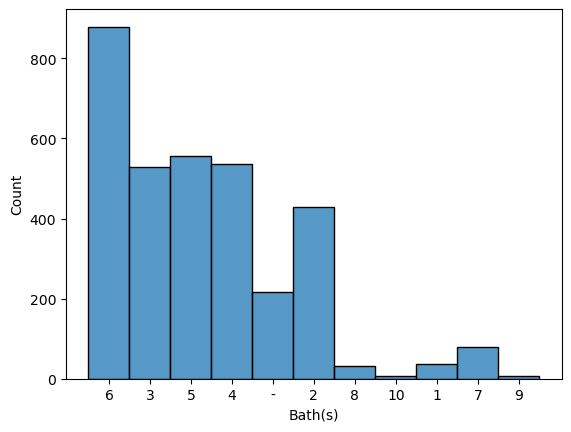

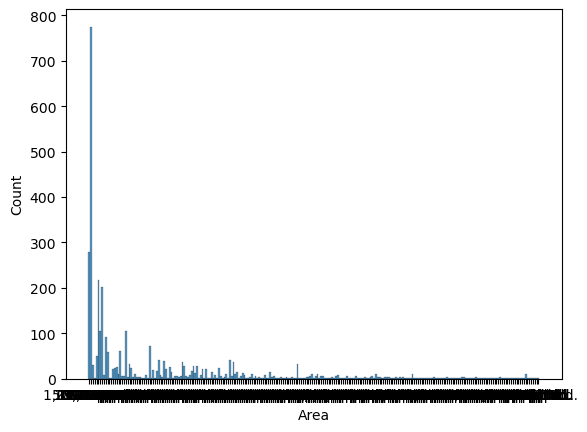

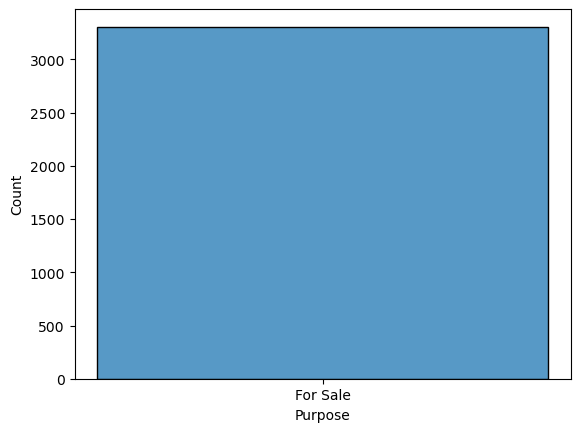

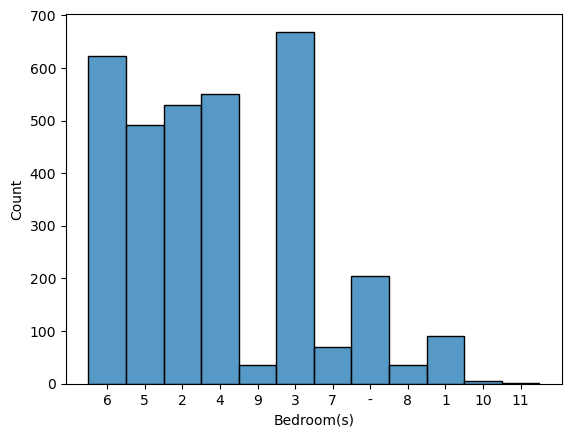

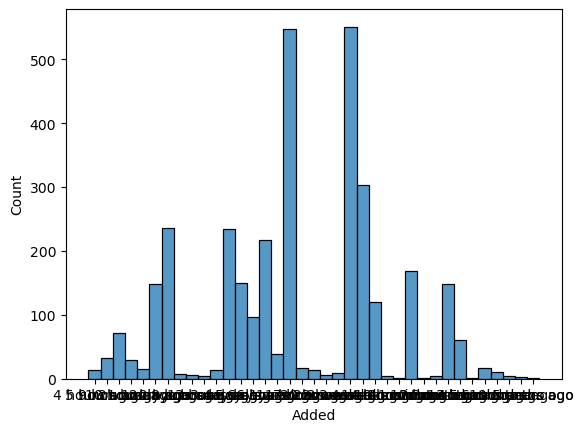

In [20]:
for c in df[obj_columns].columns:
    plt.figure() #creates a different figure
    sns.histplot(x=c,data=df,bins=10)

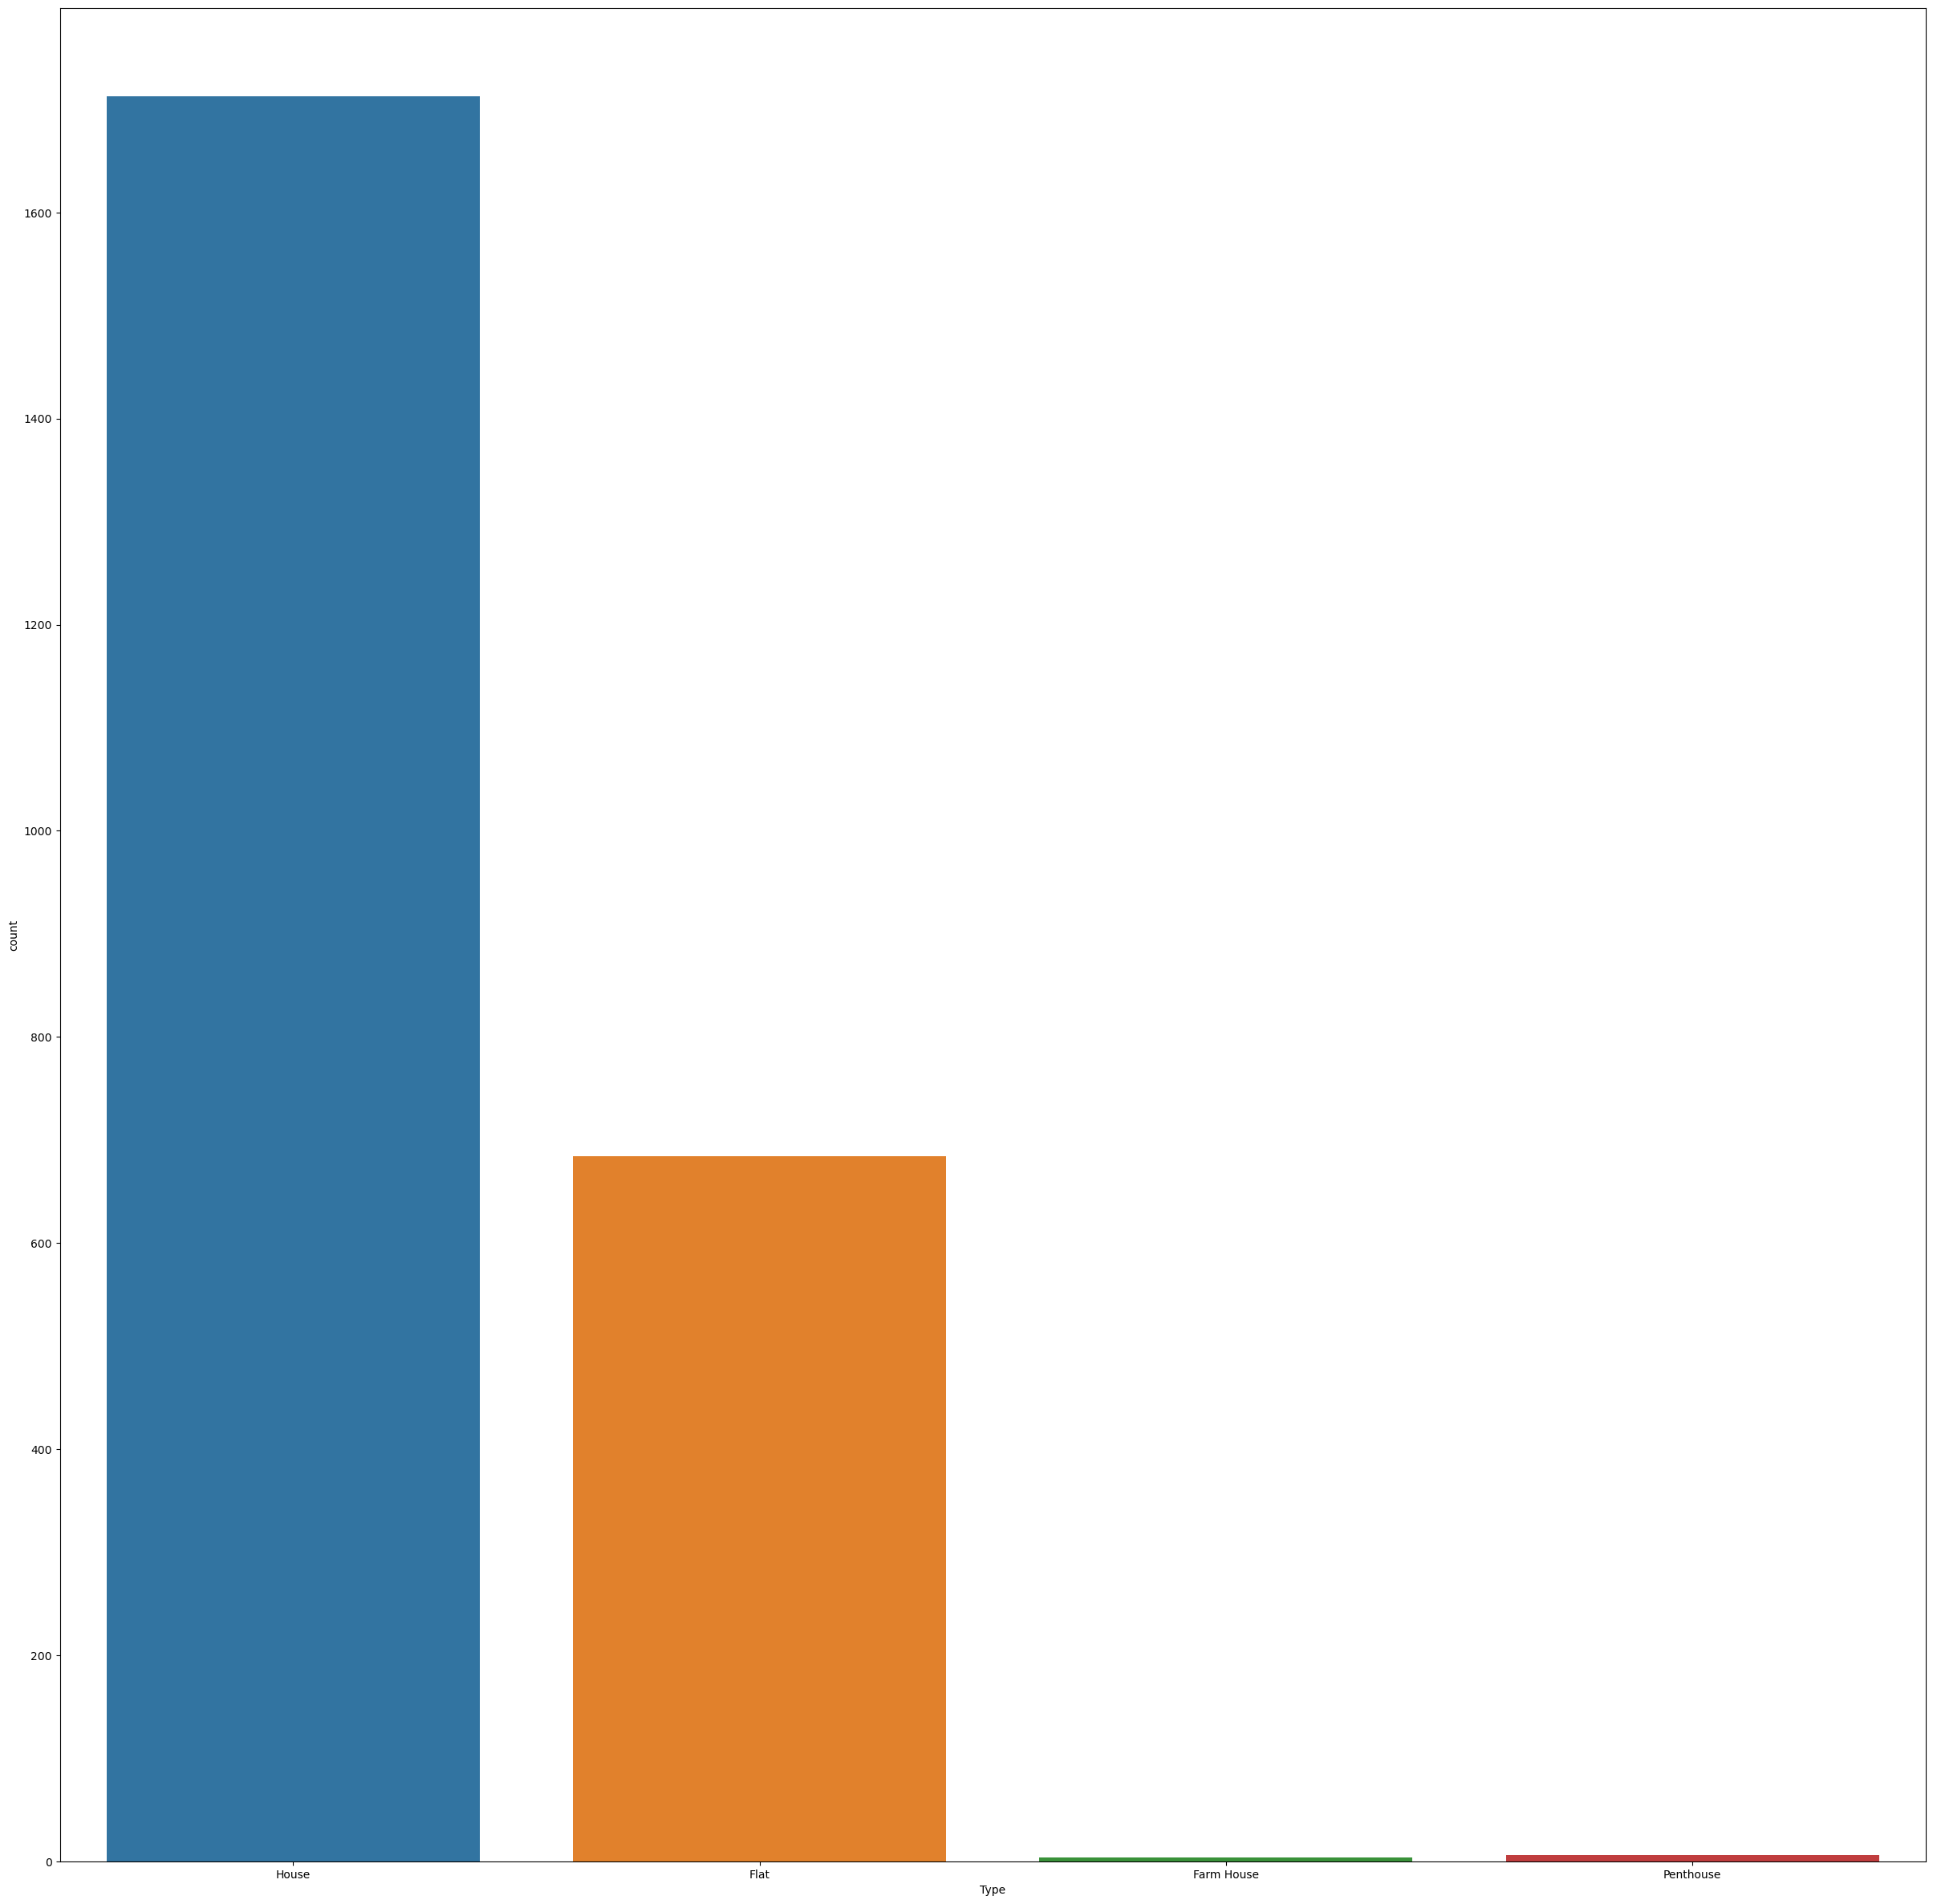

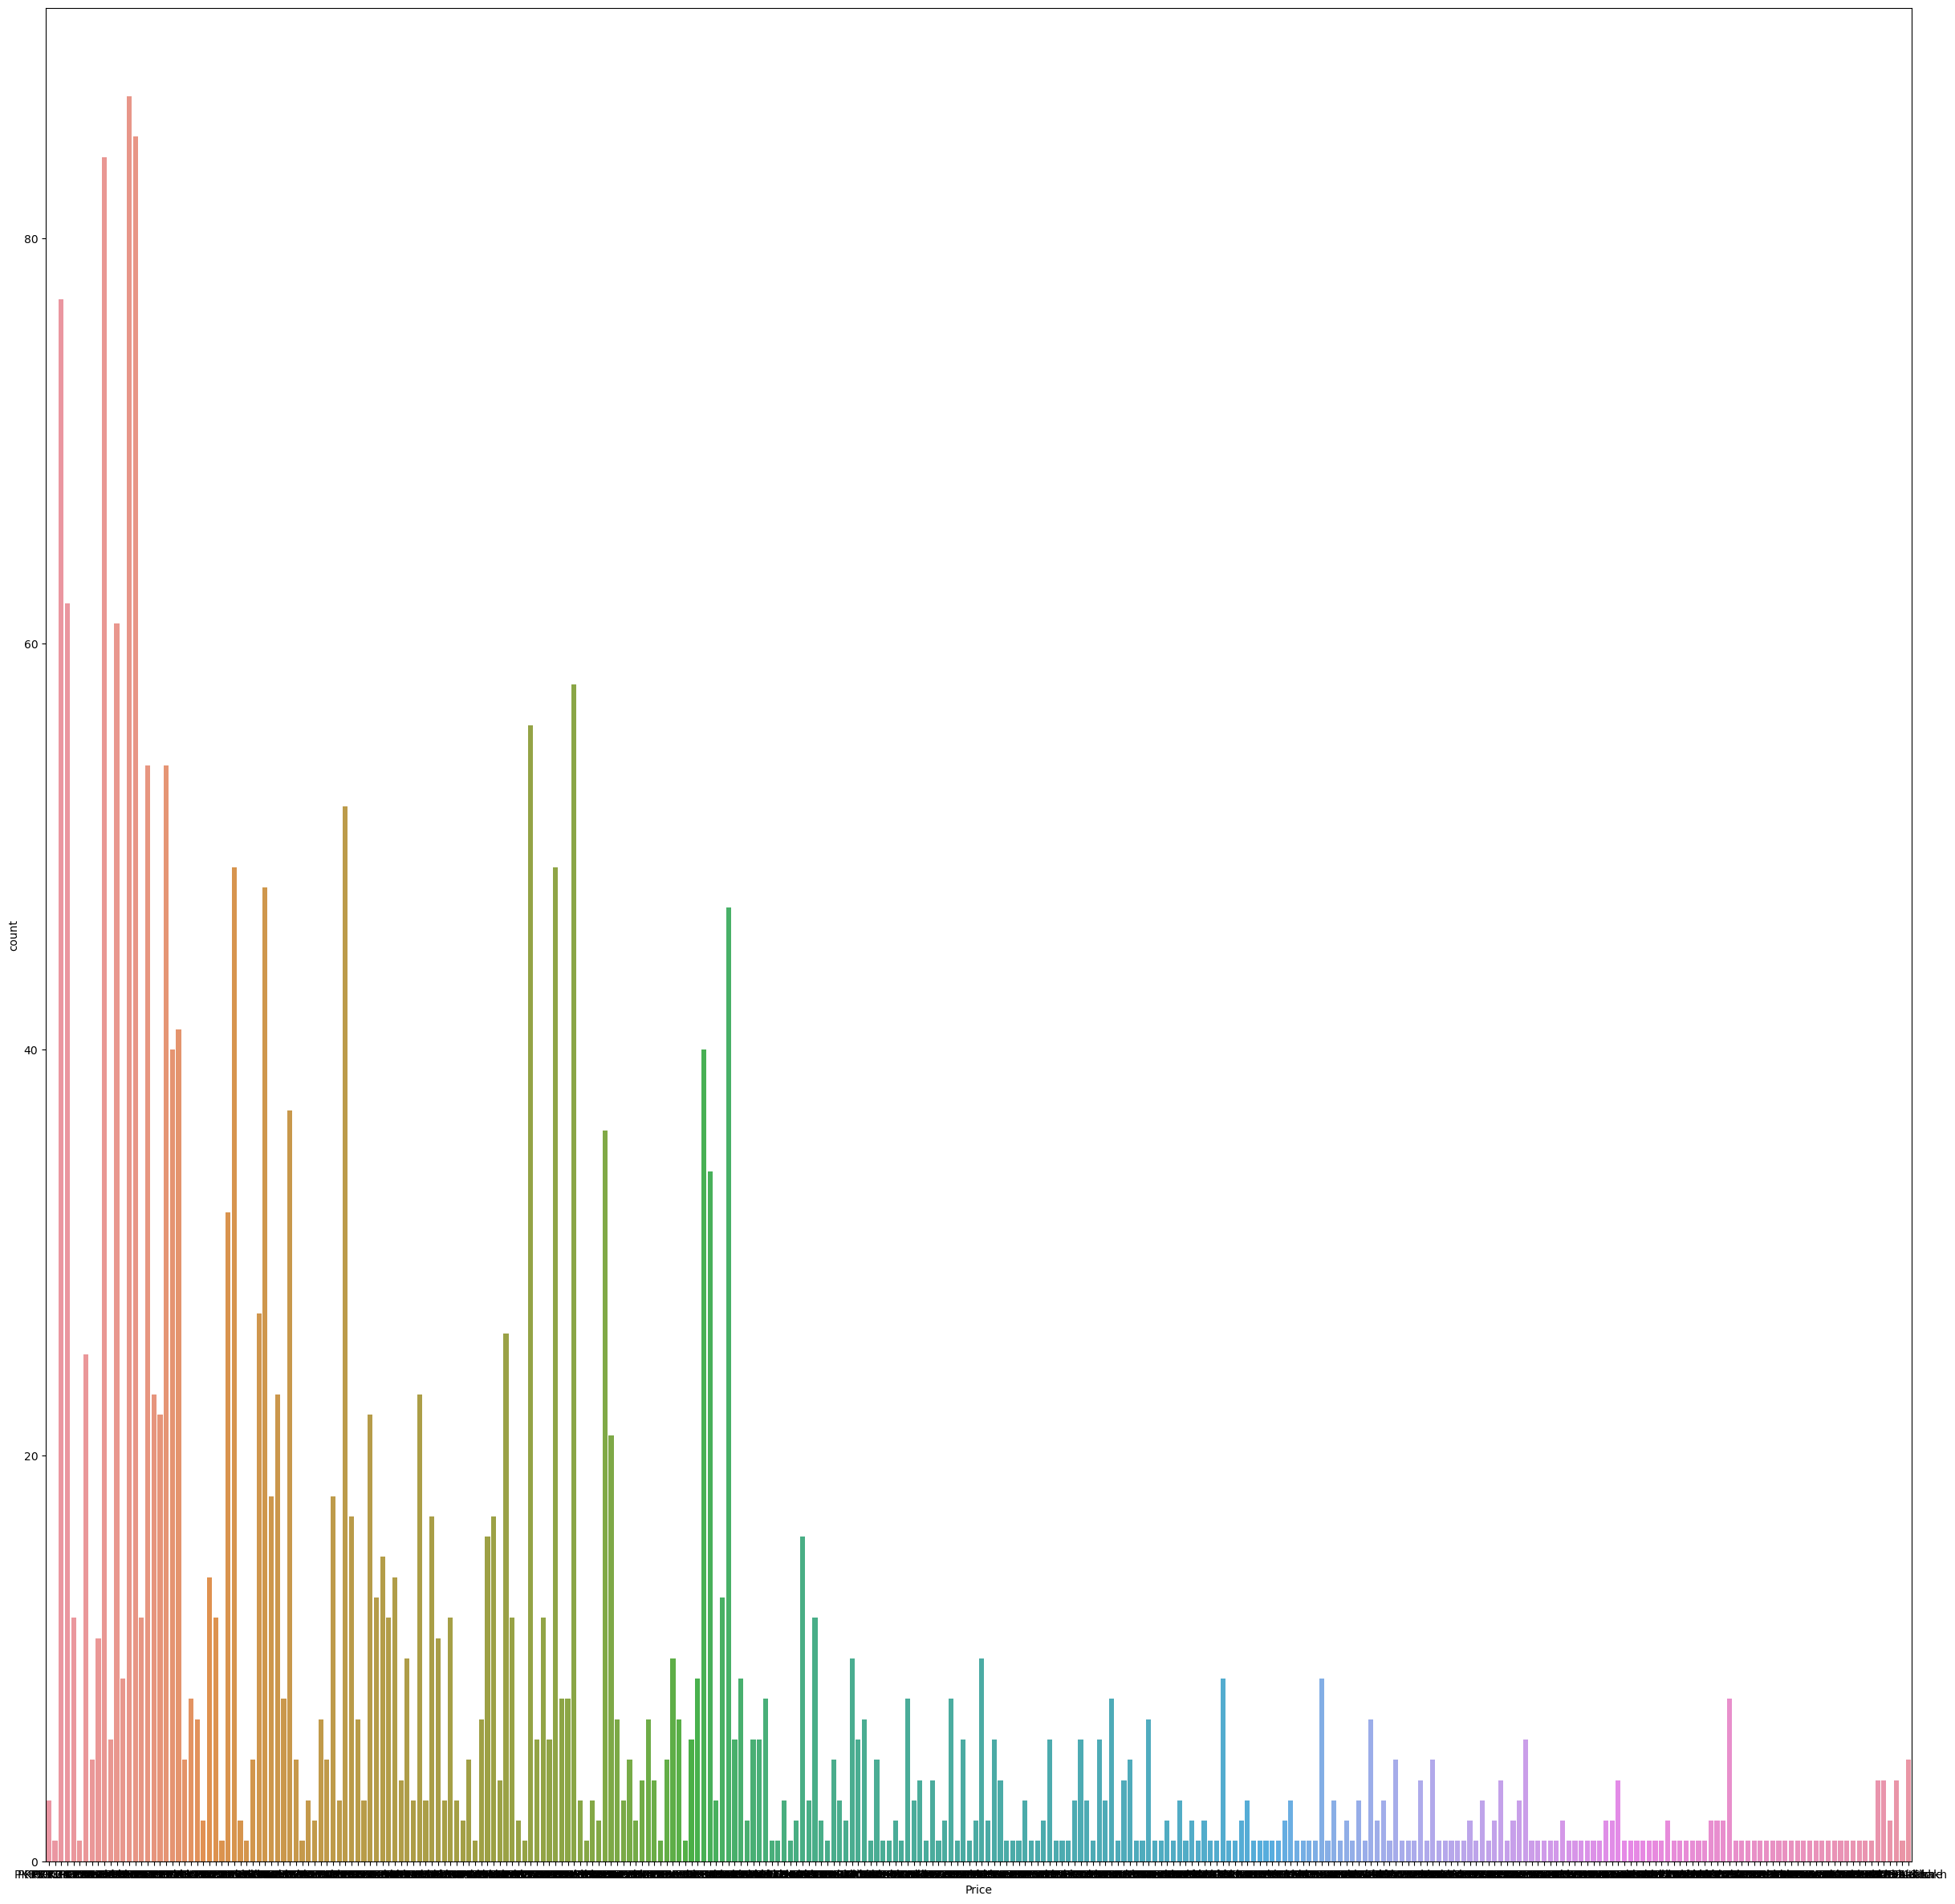

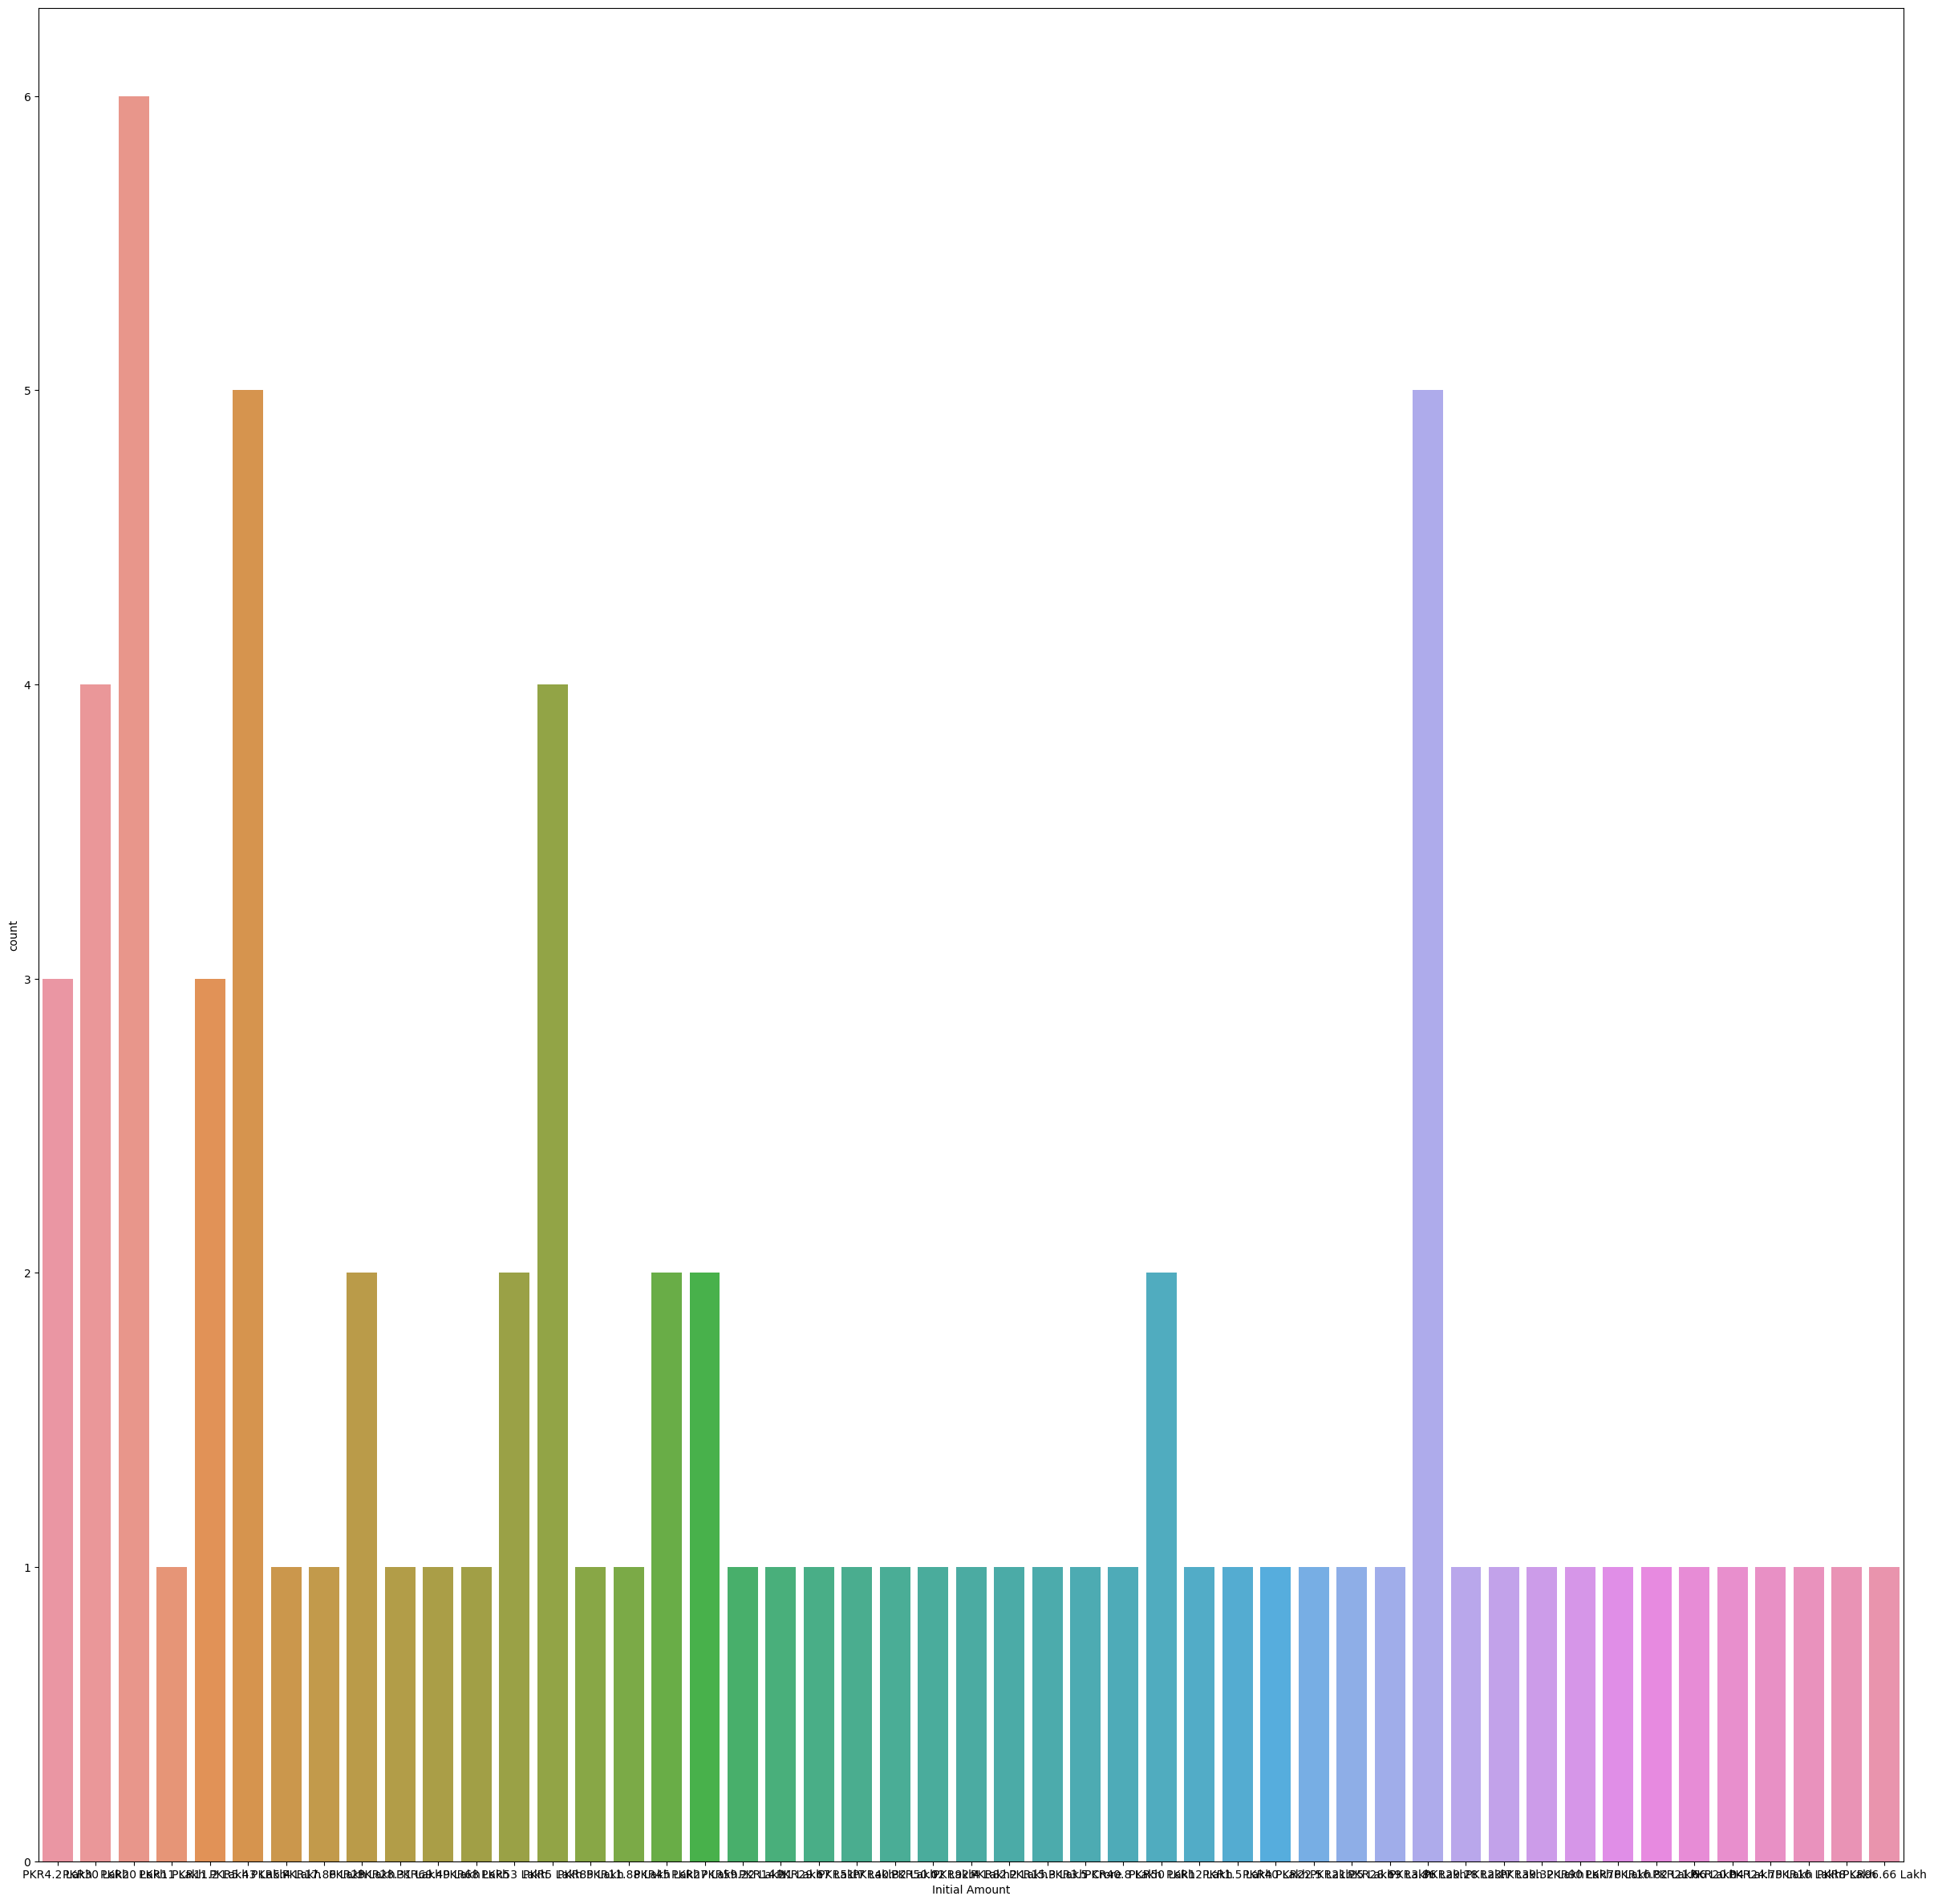

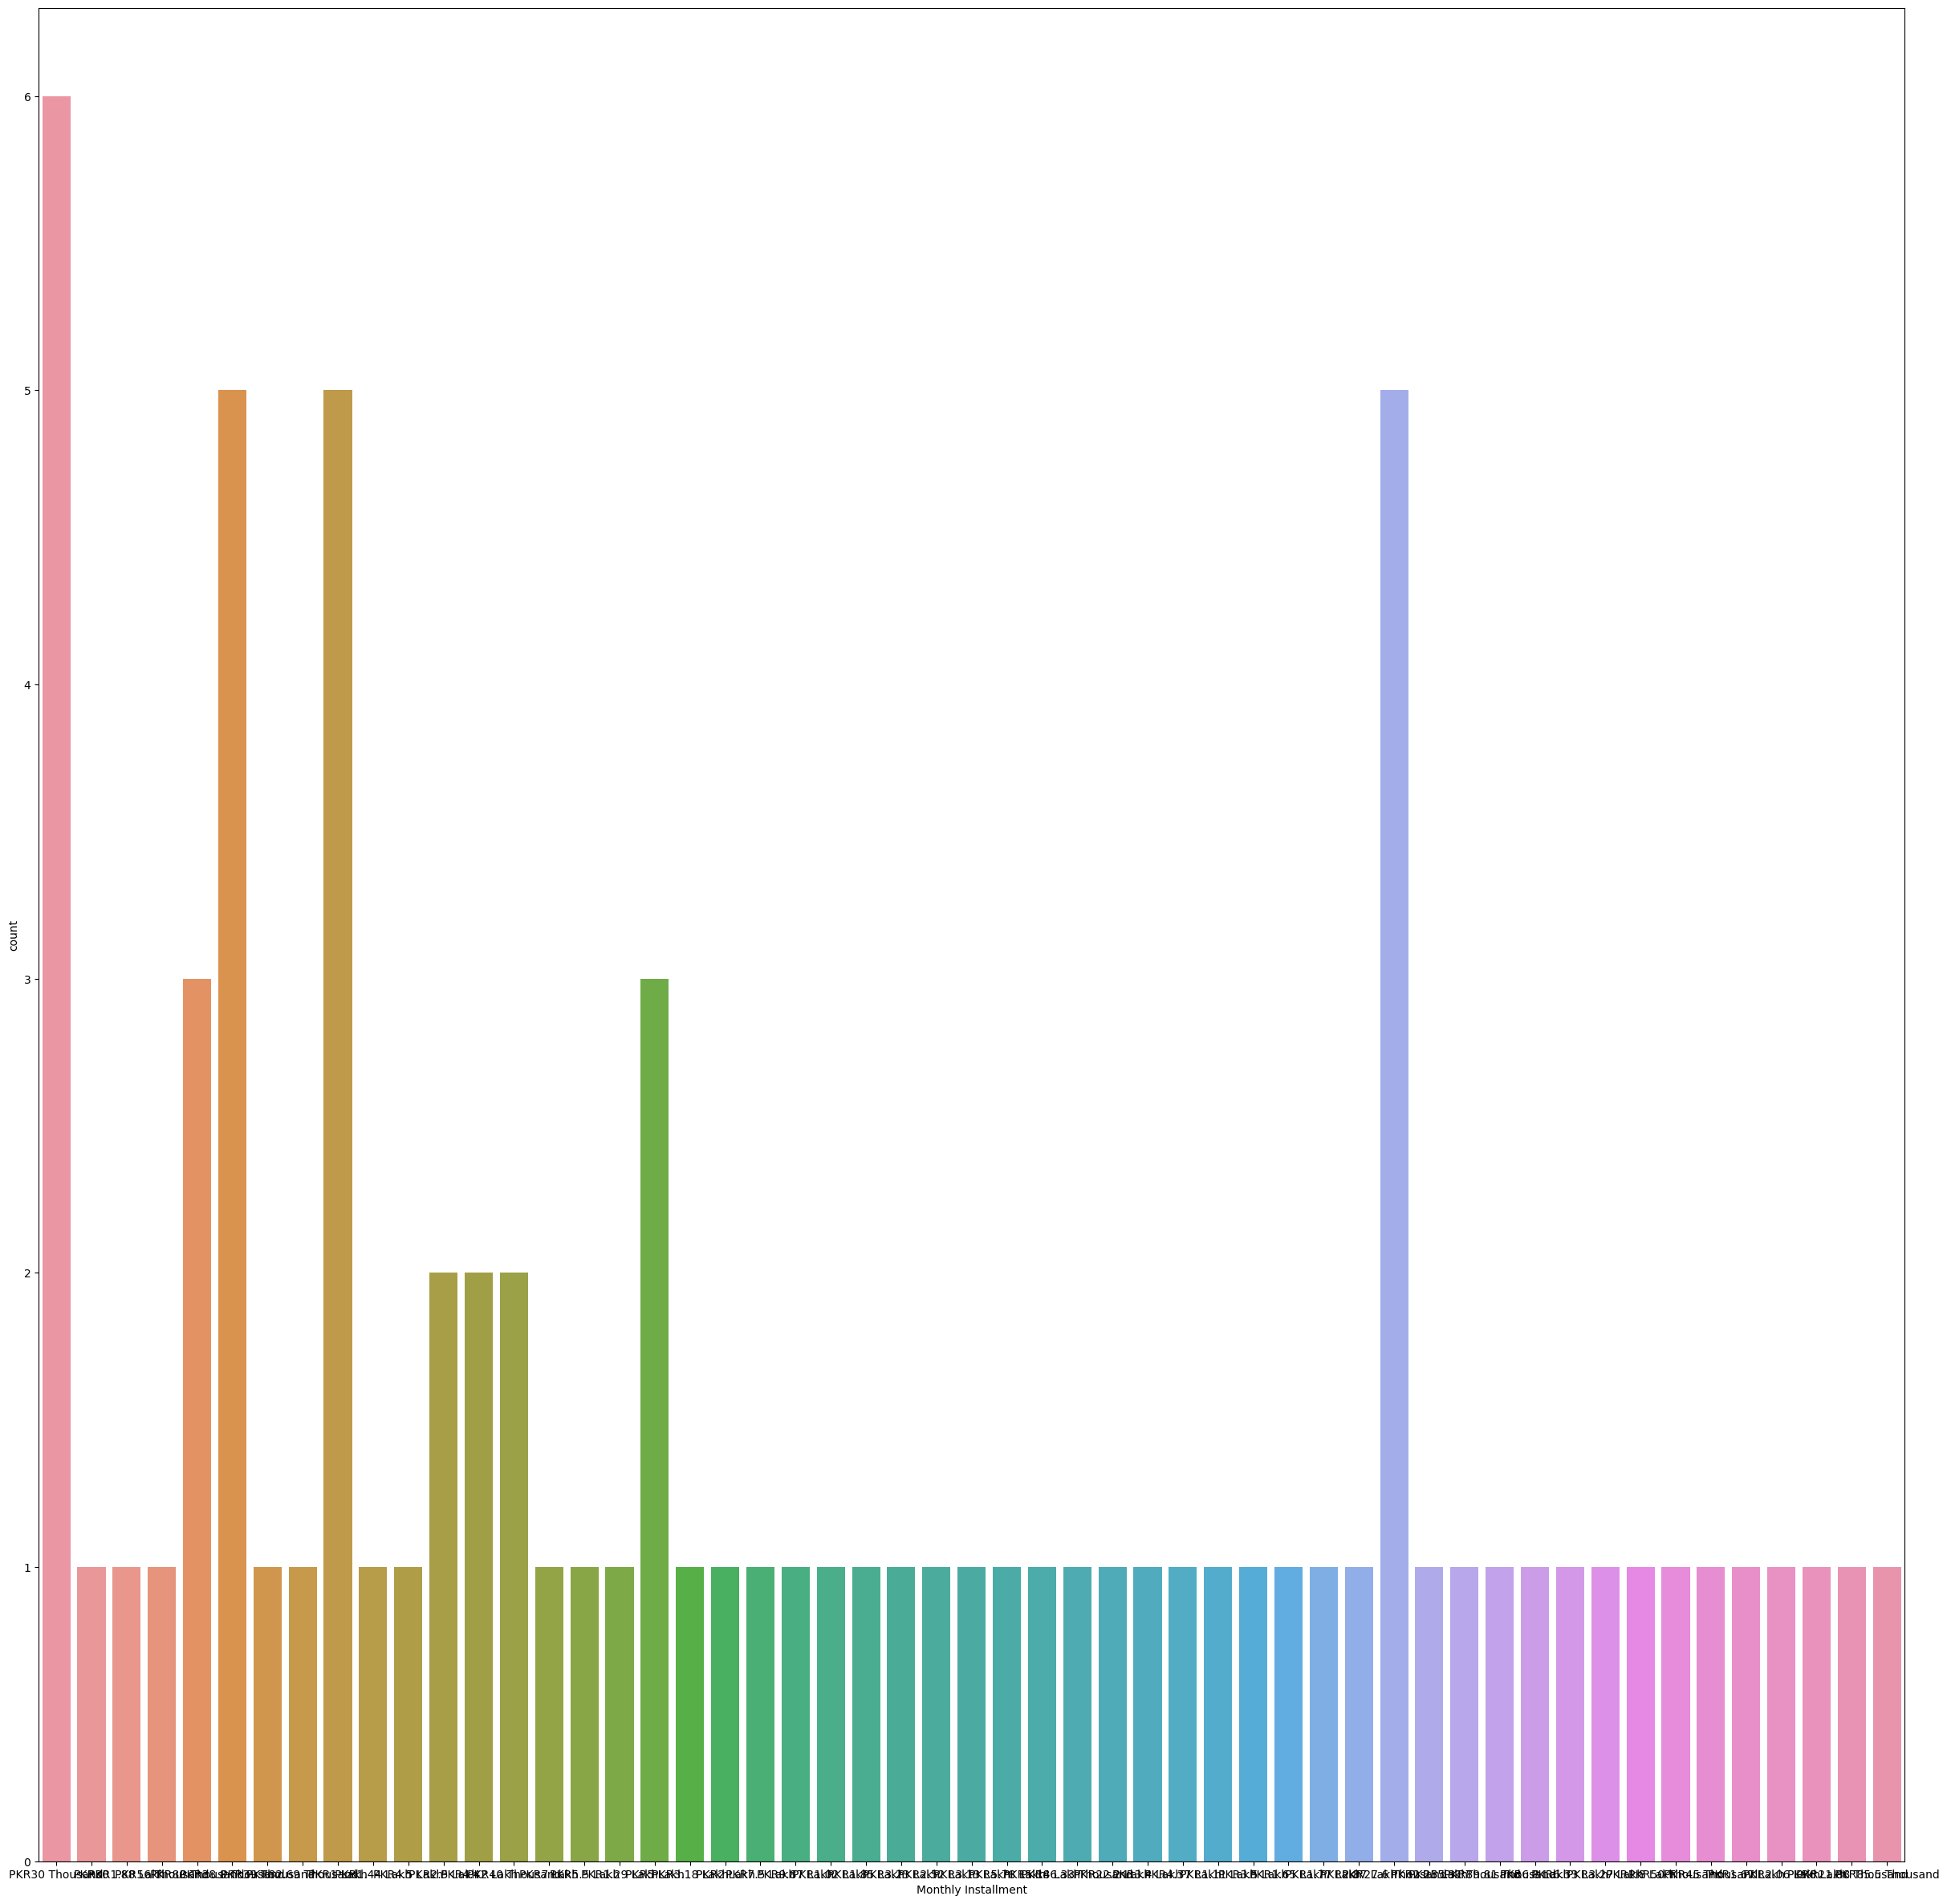

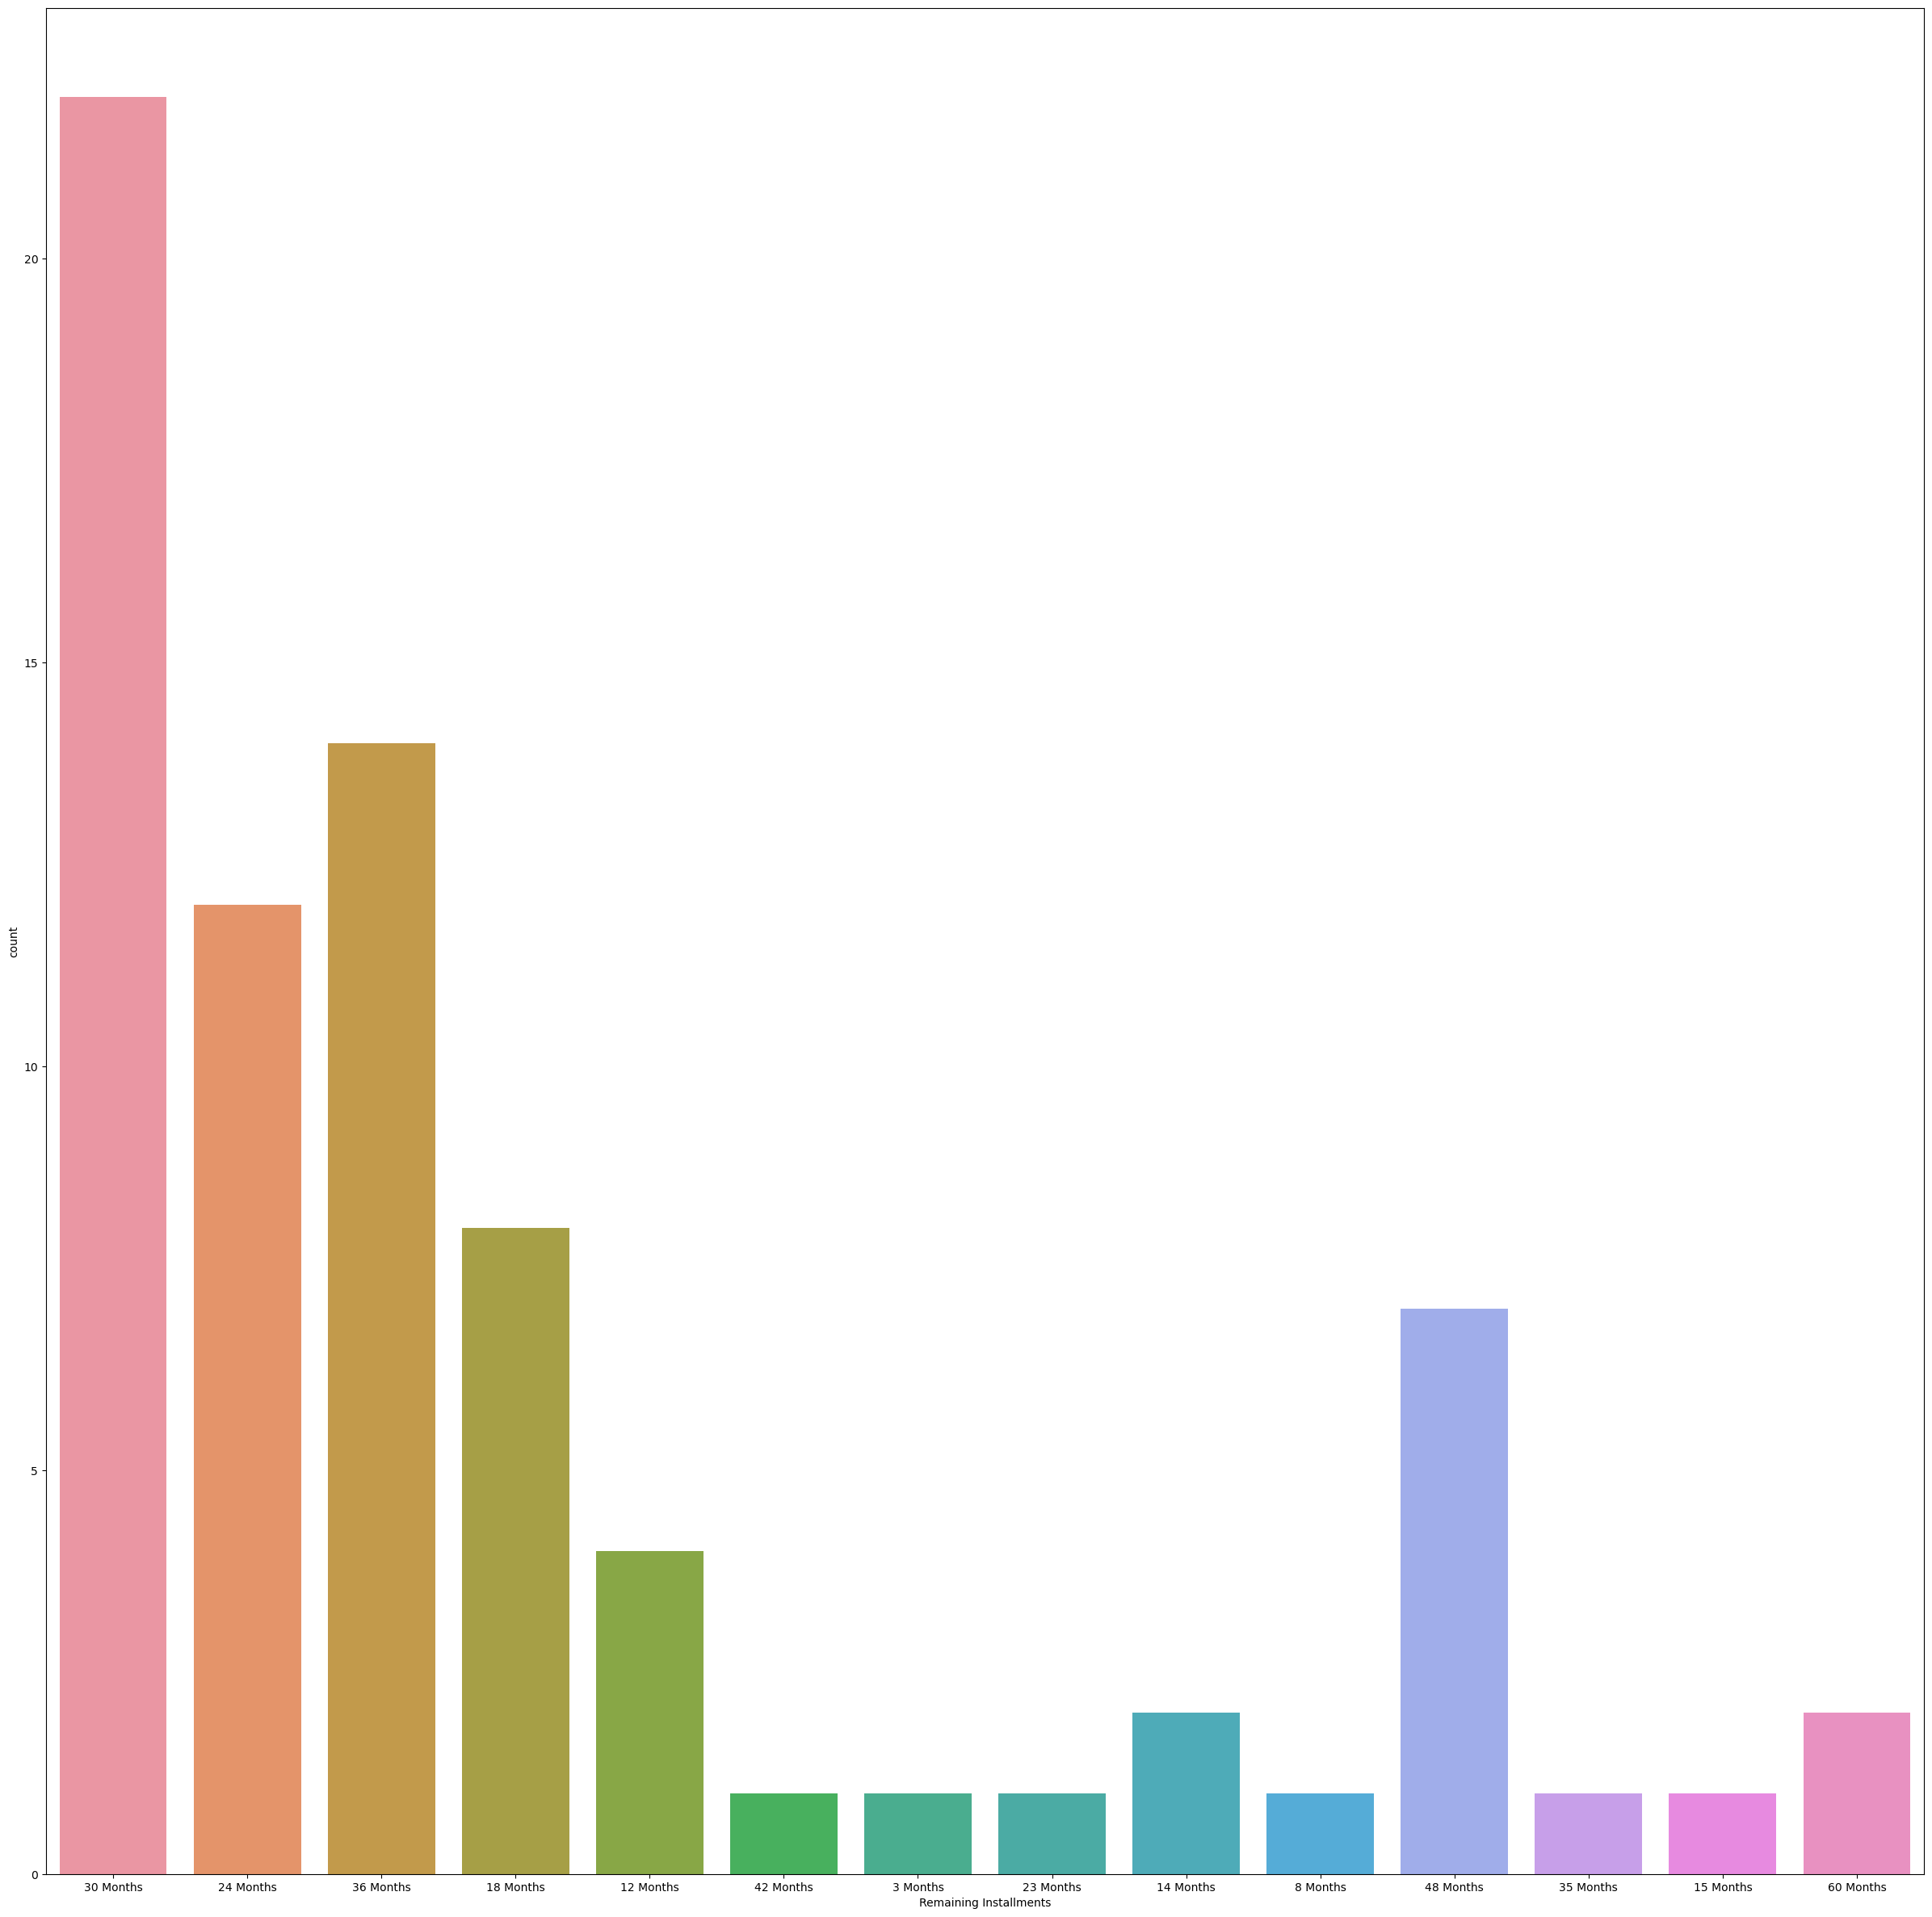

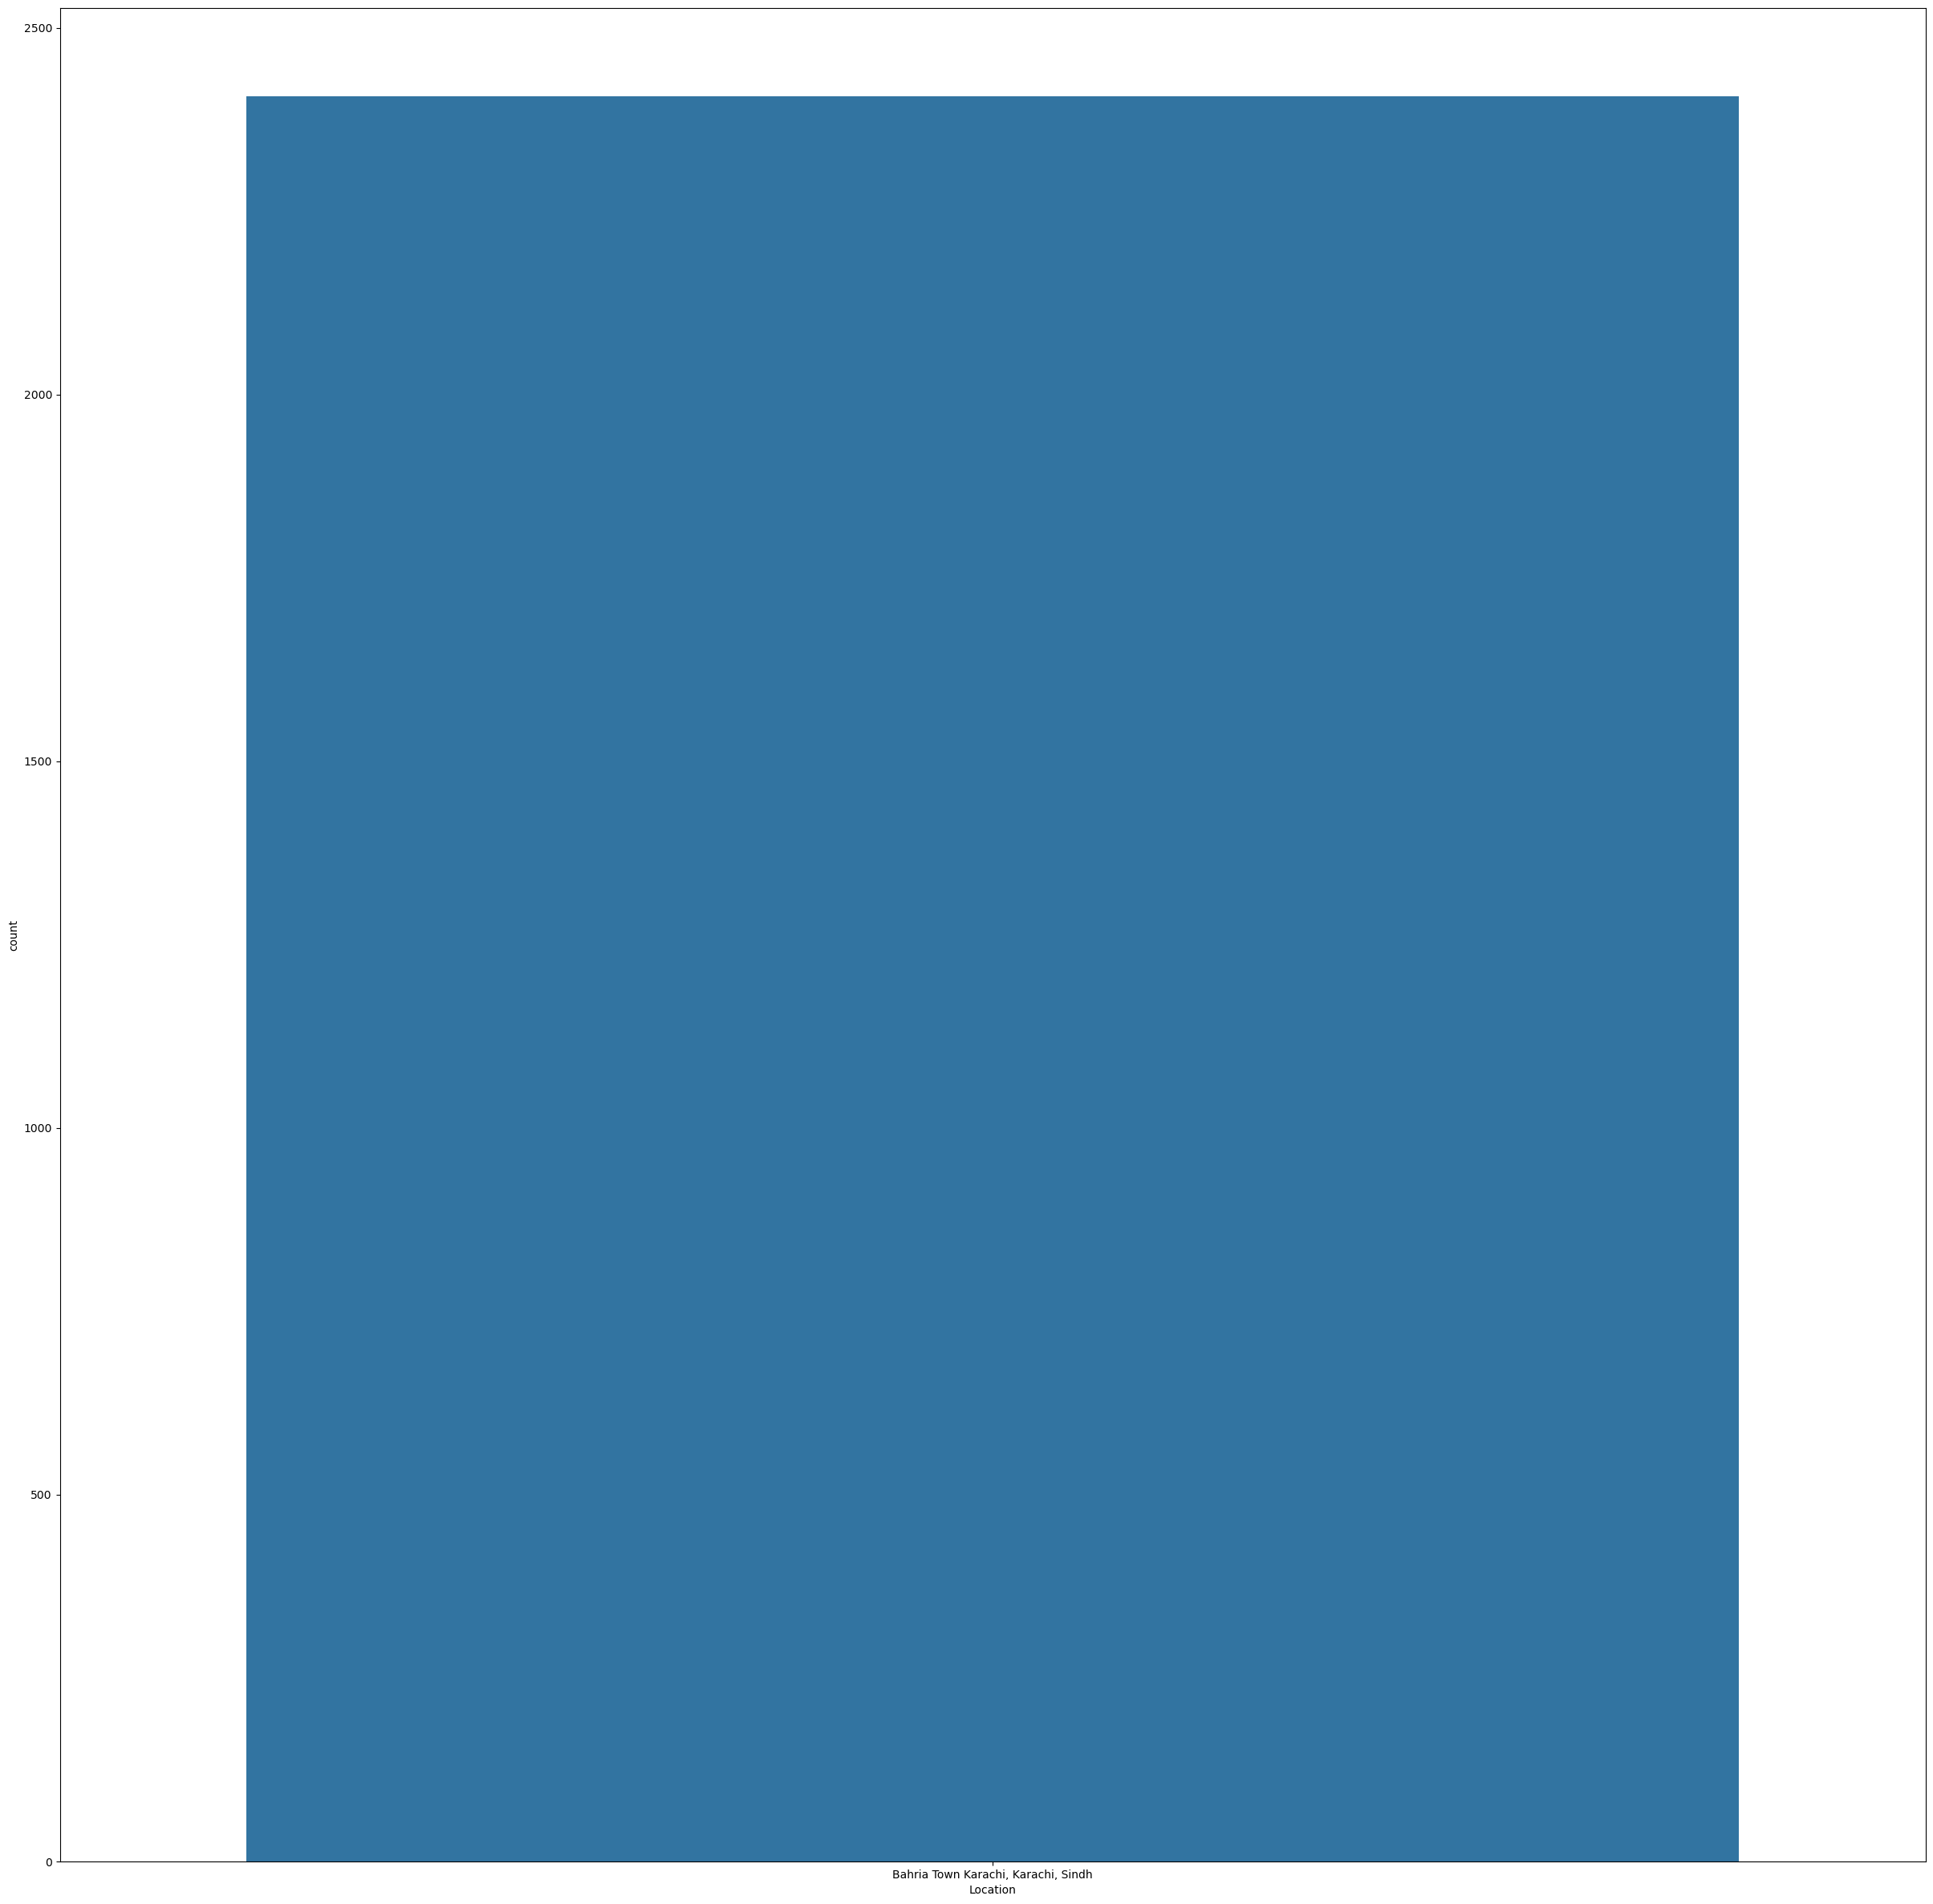

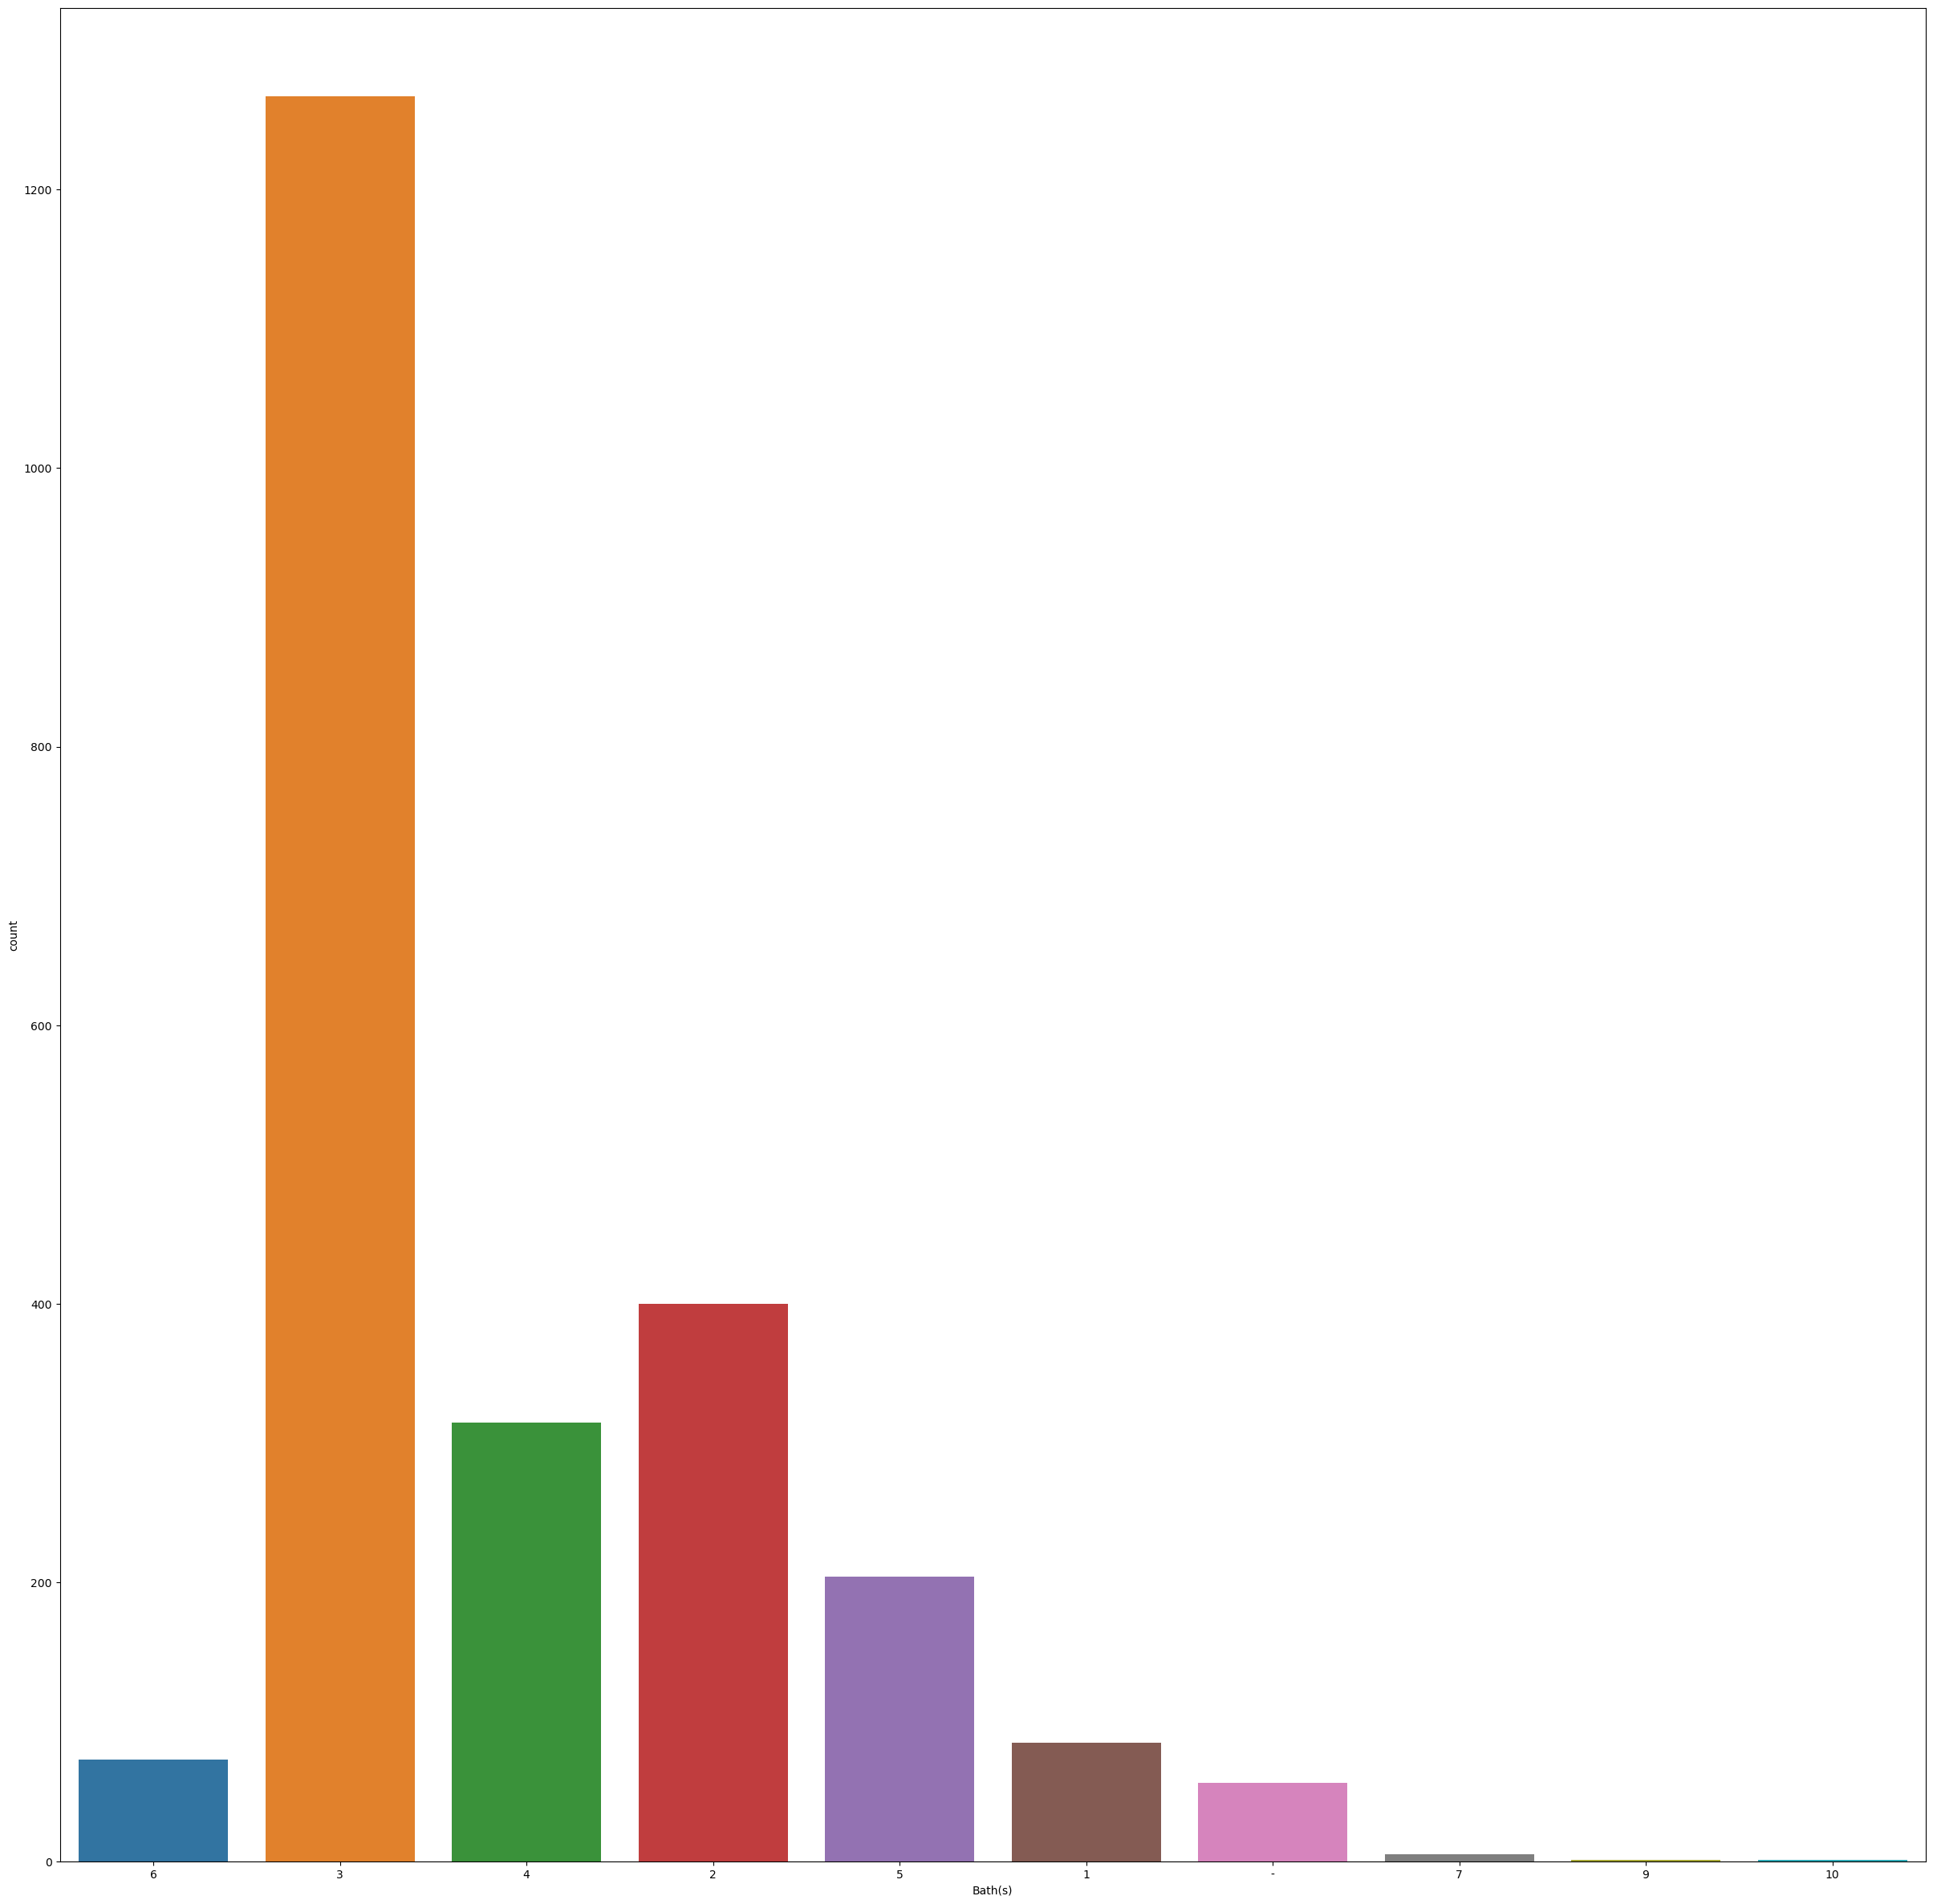

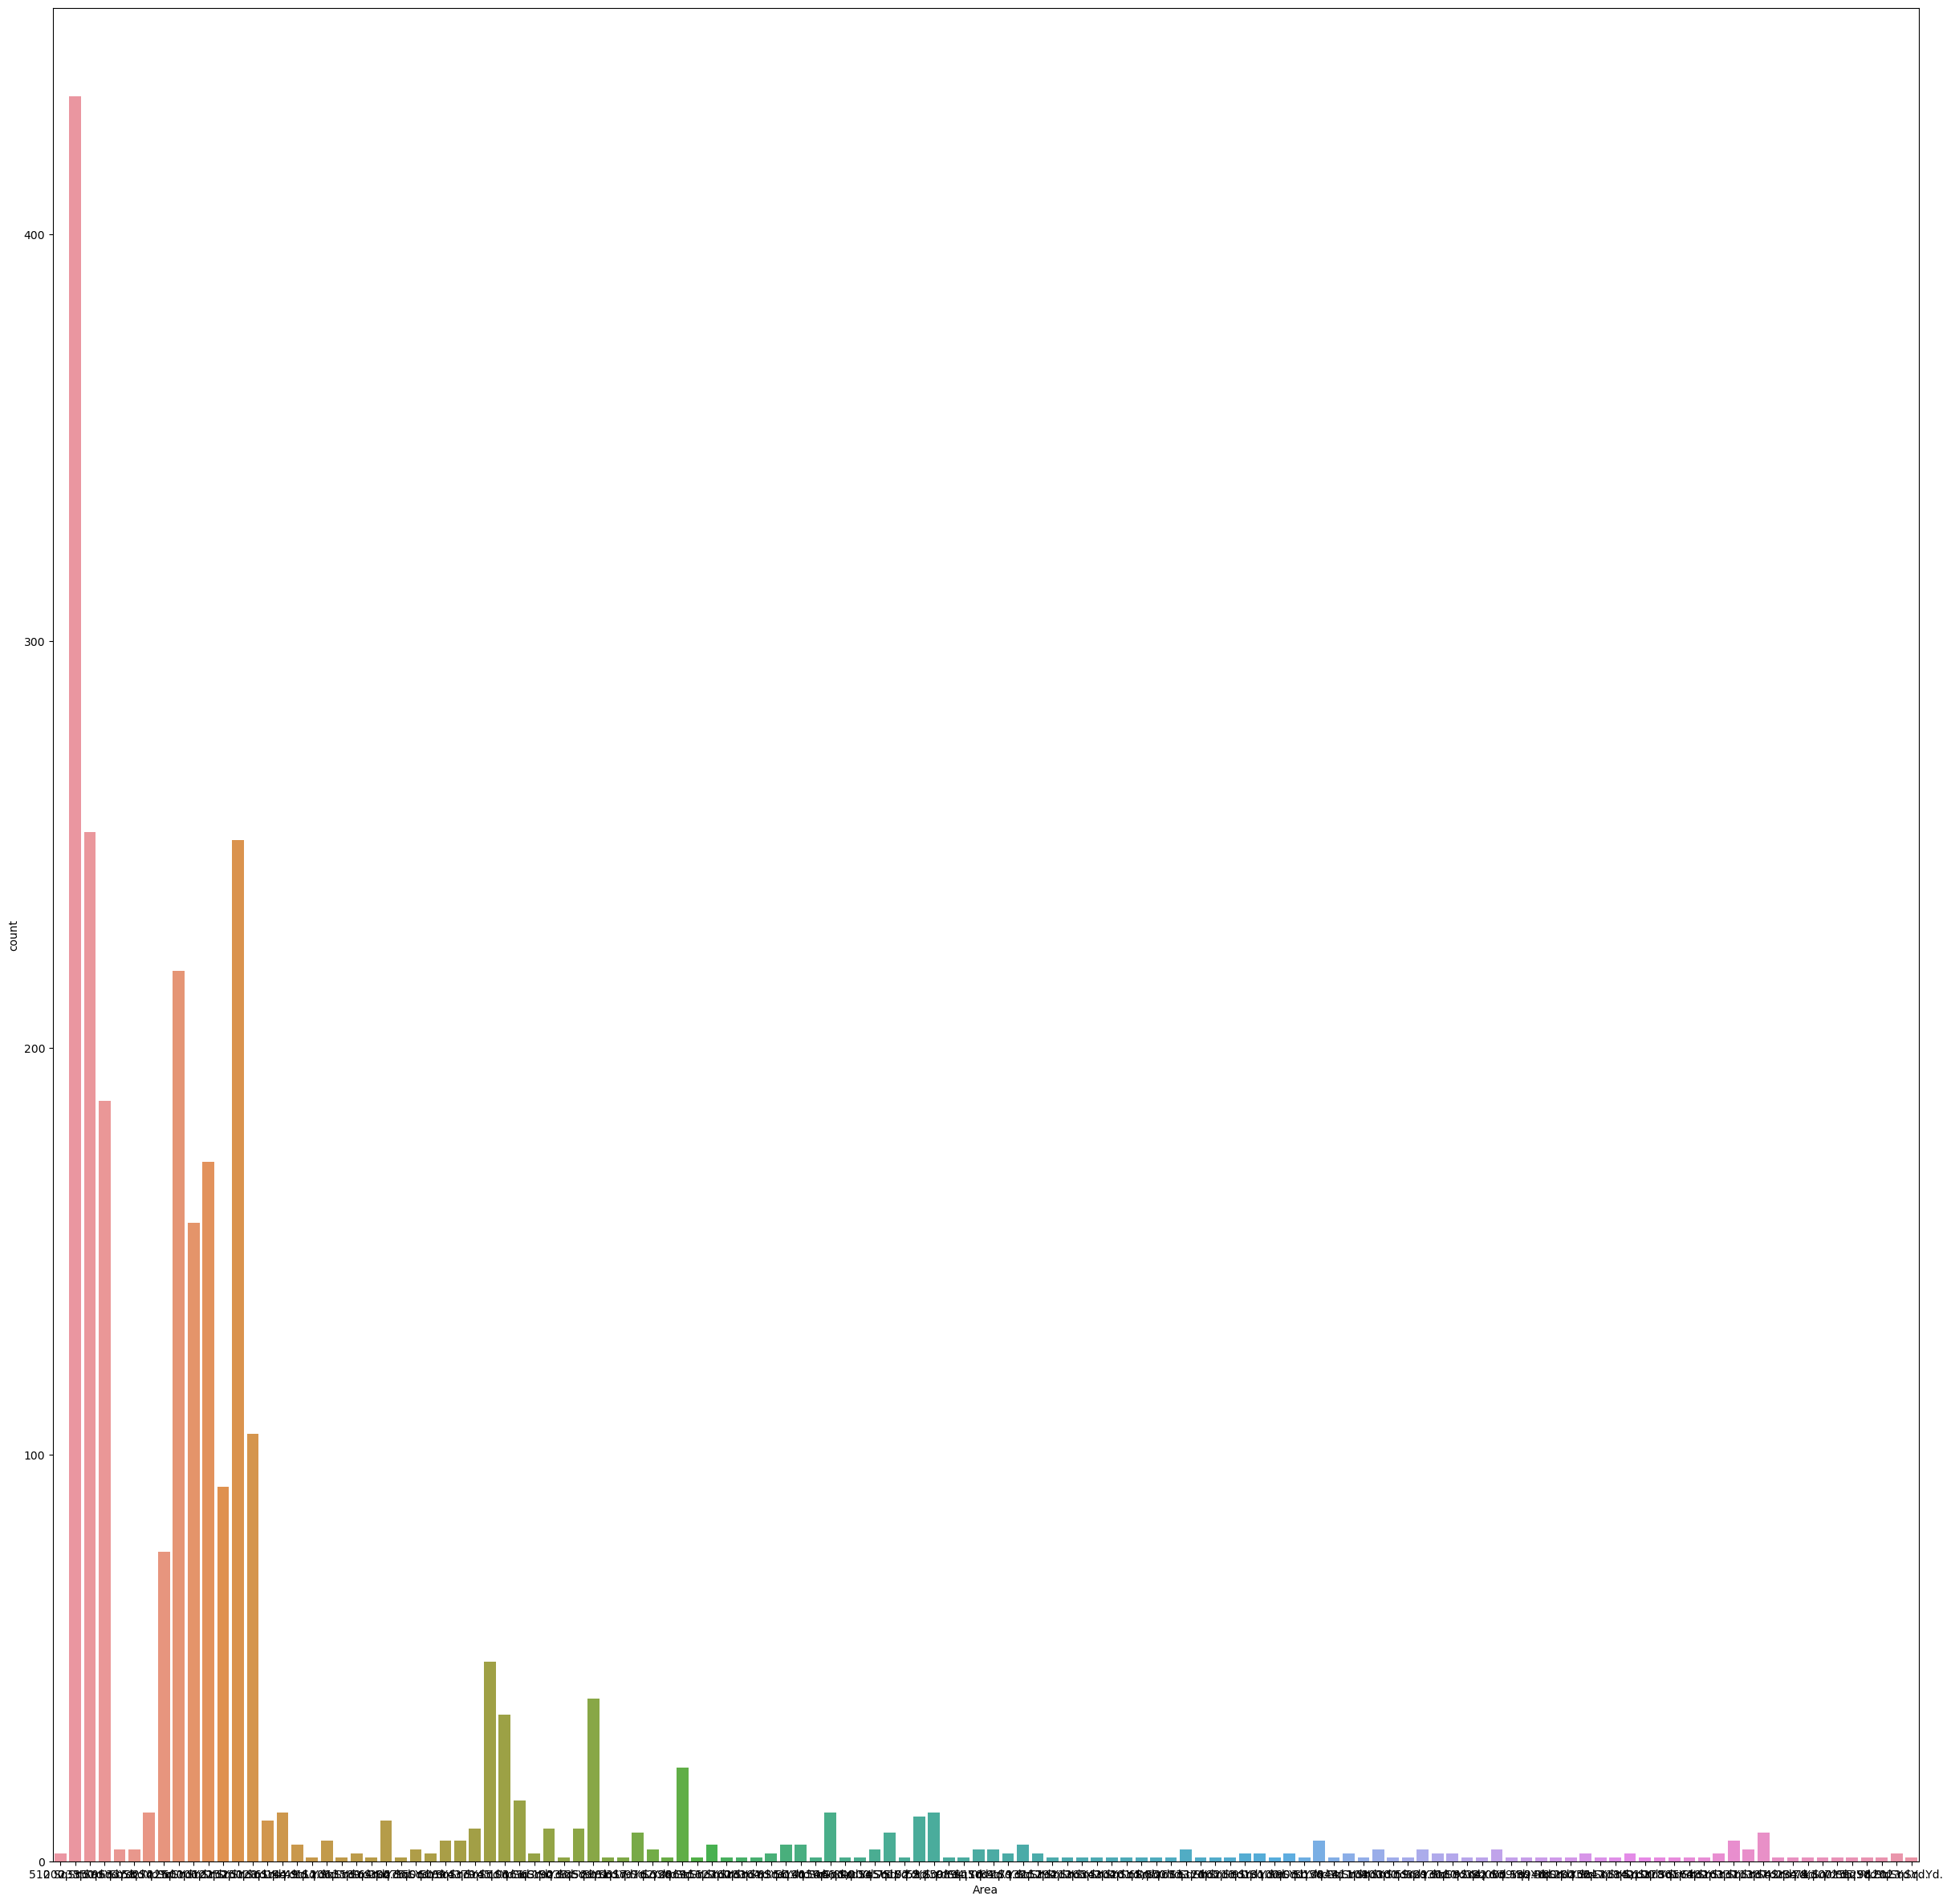

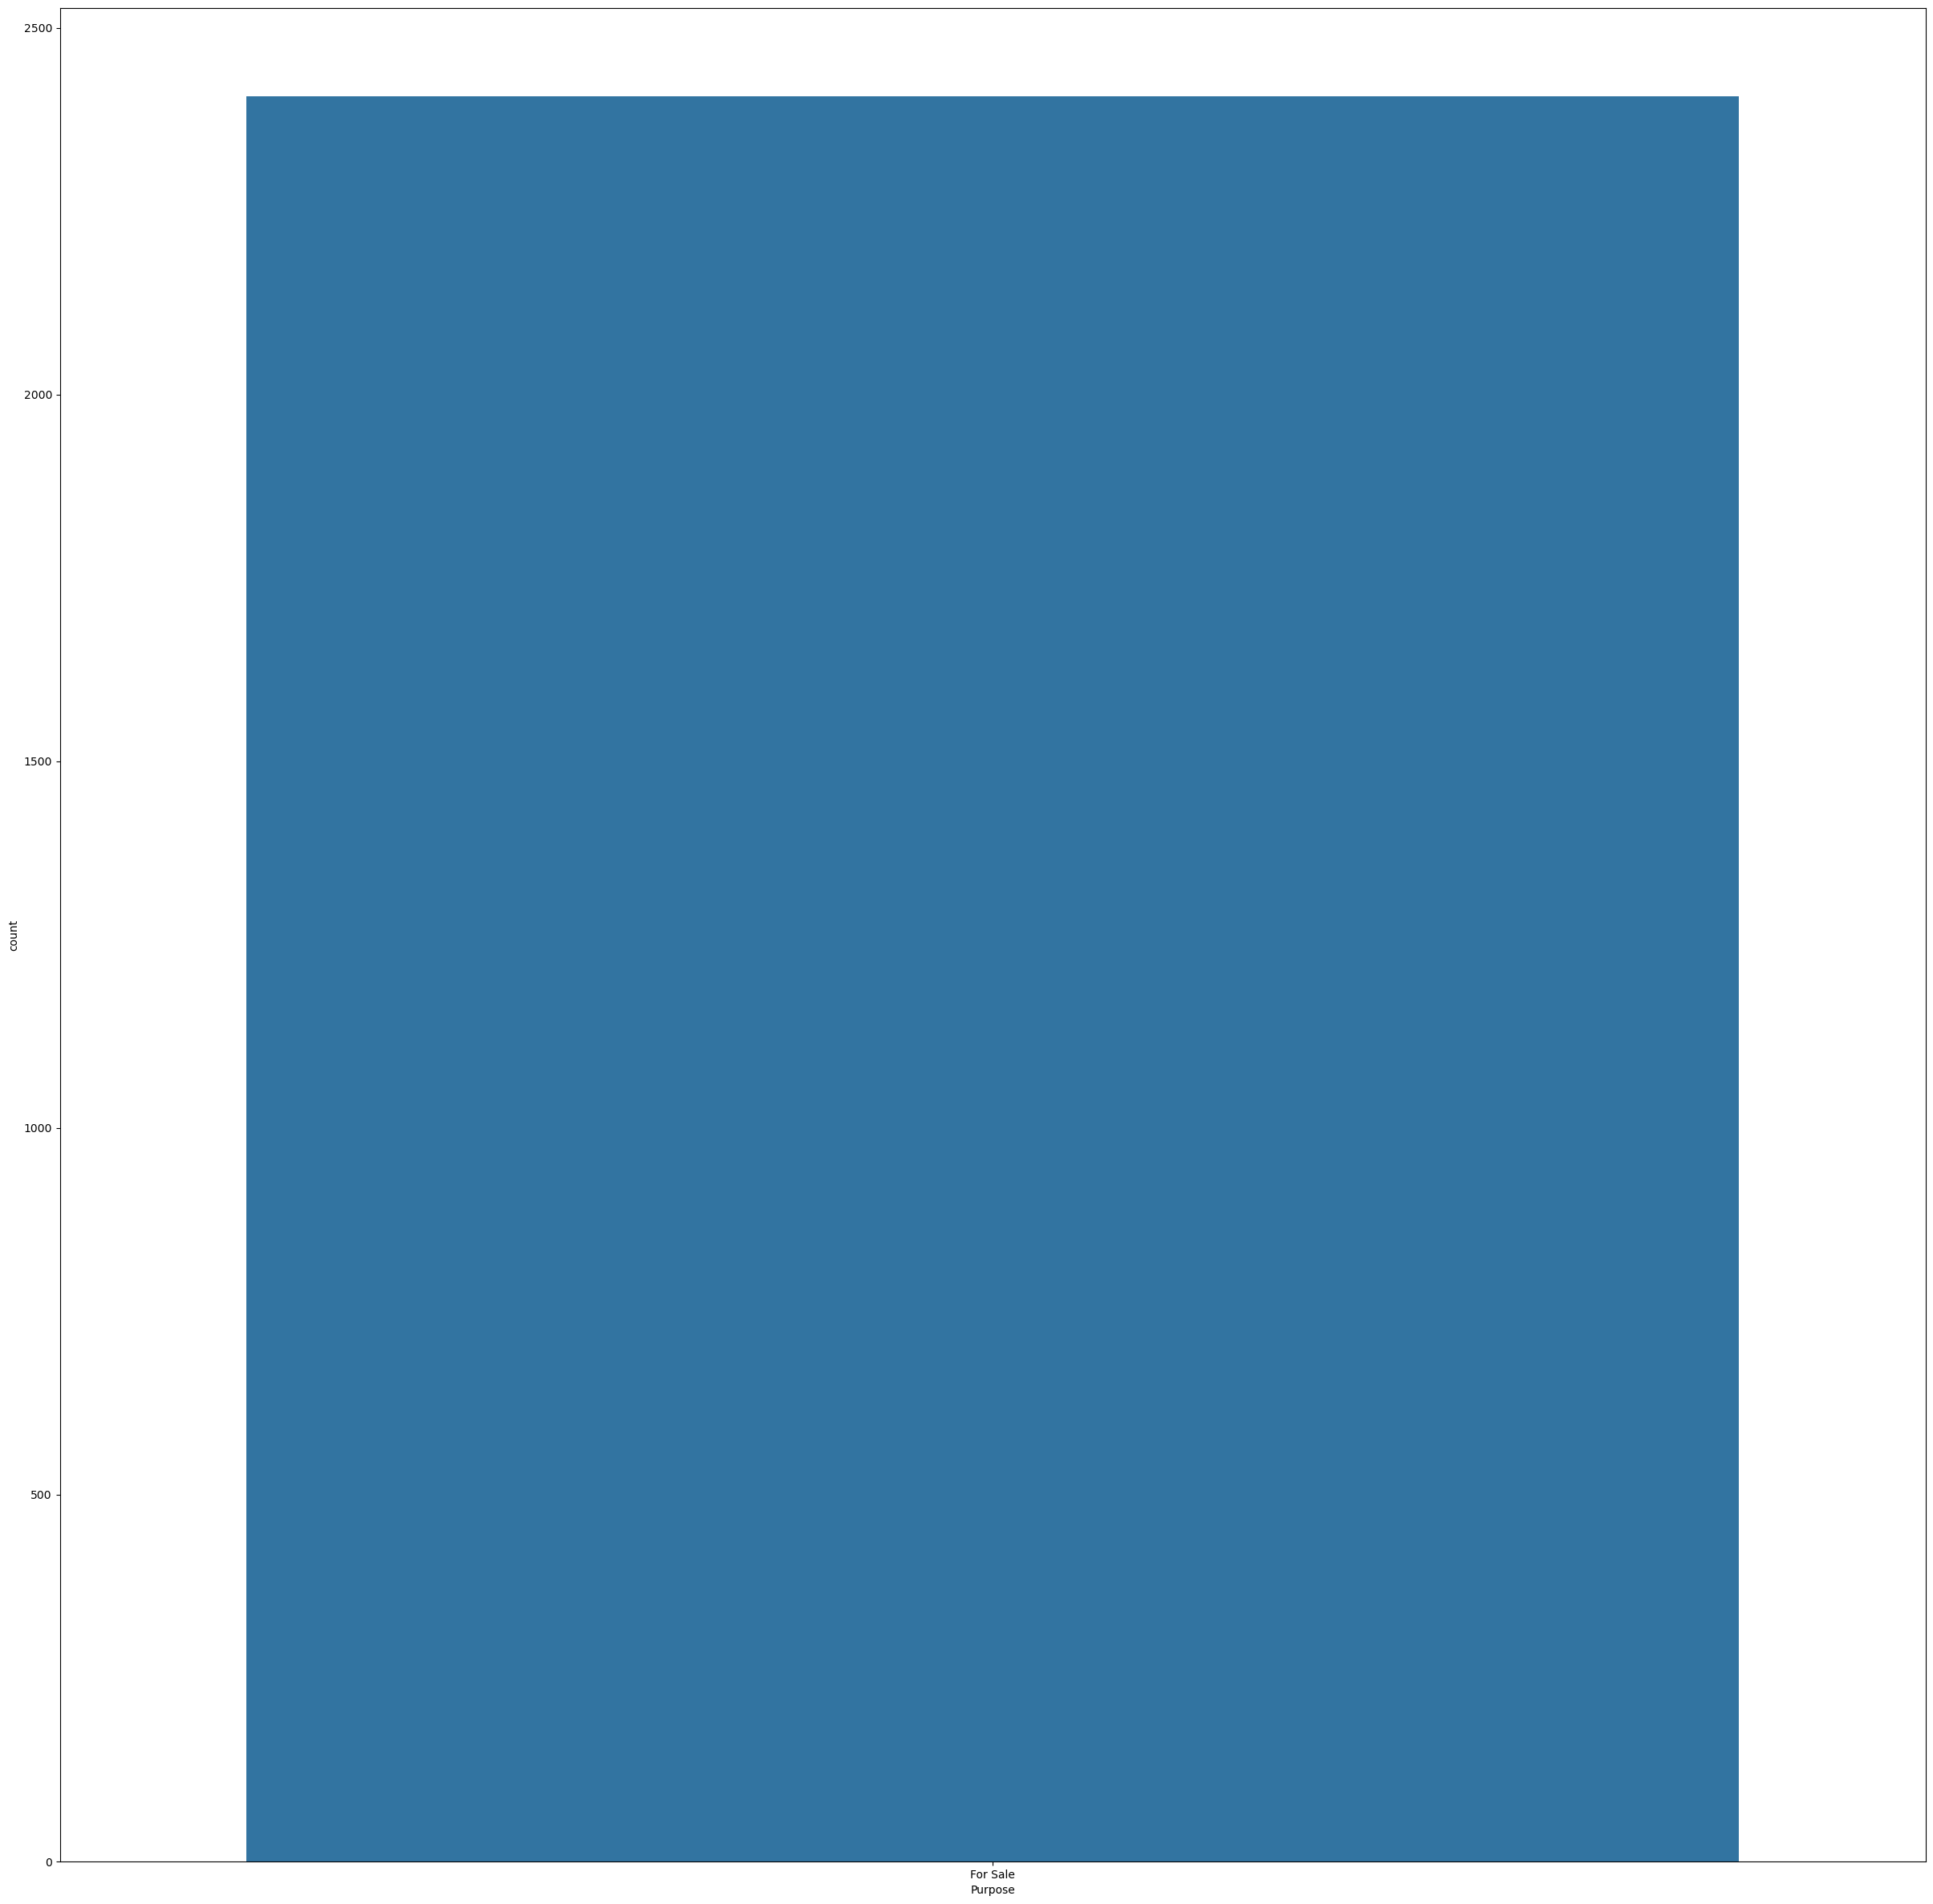

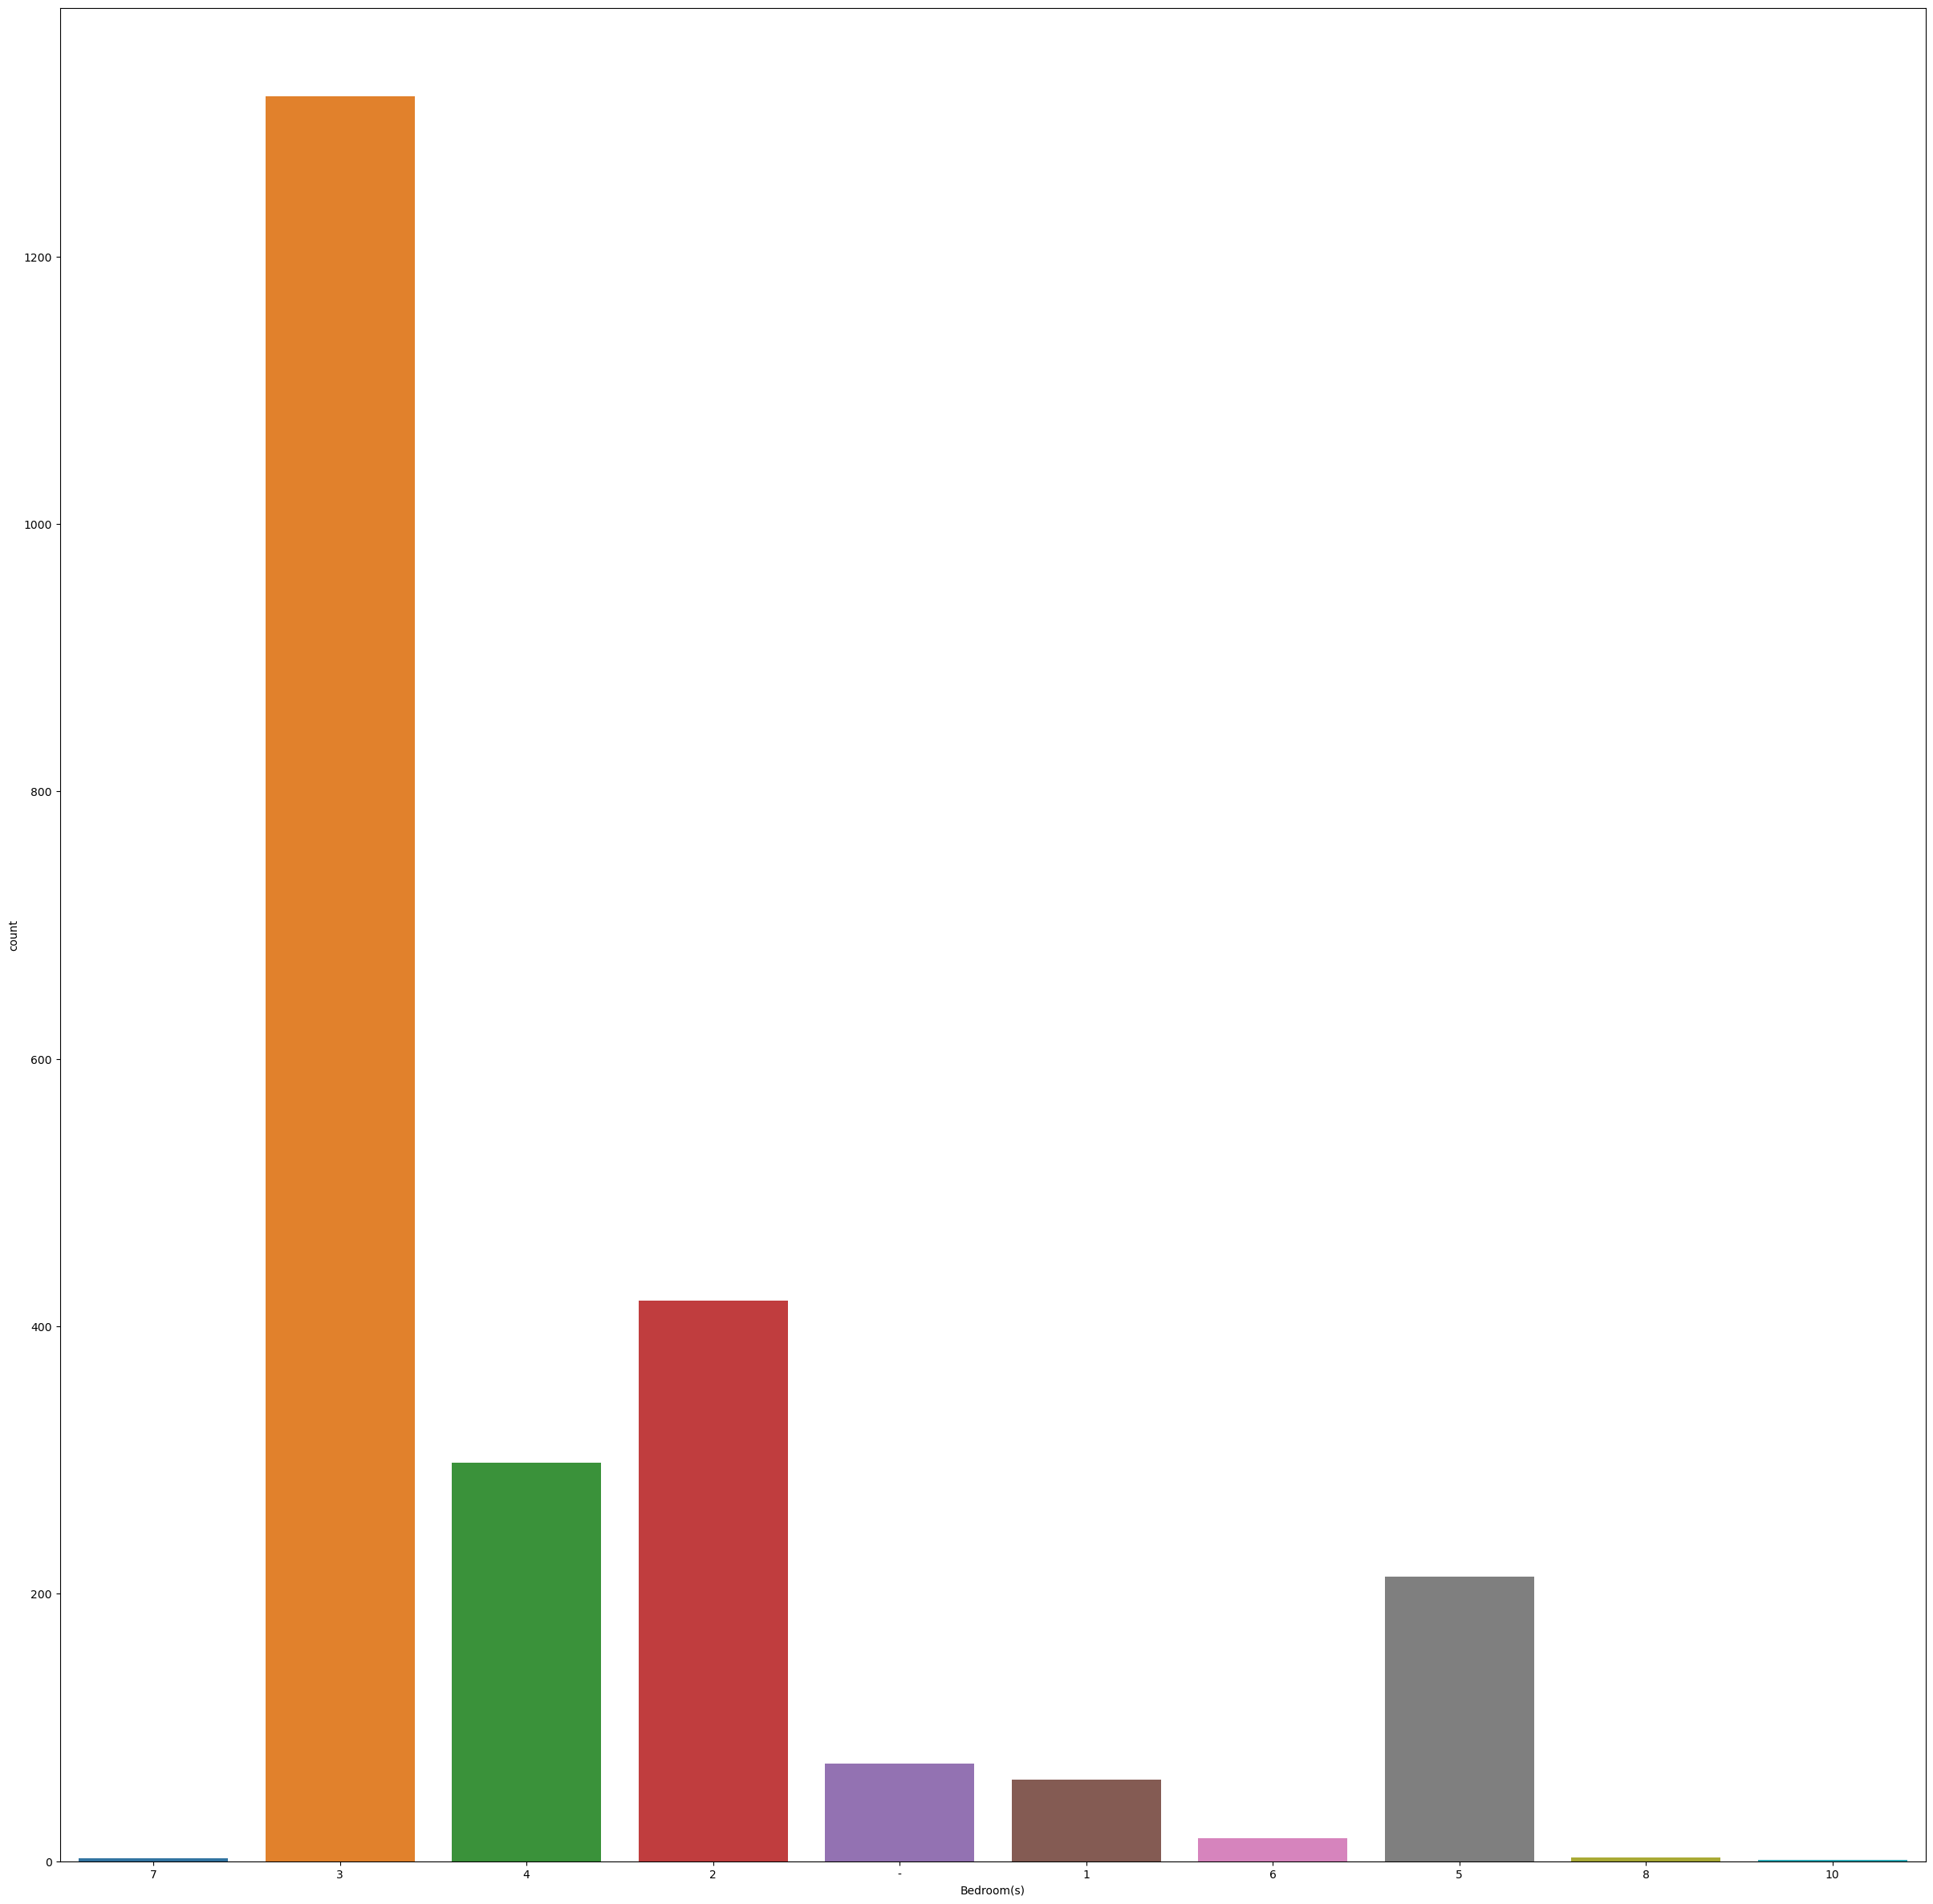

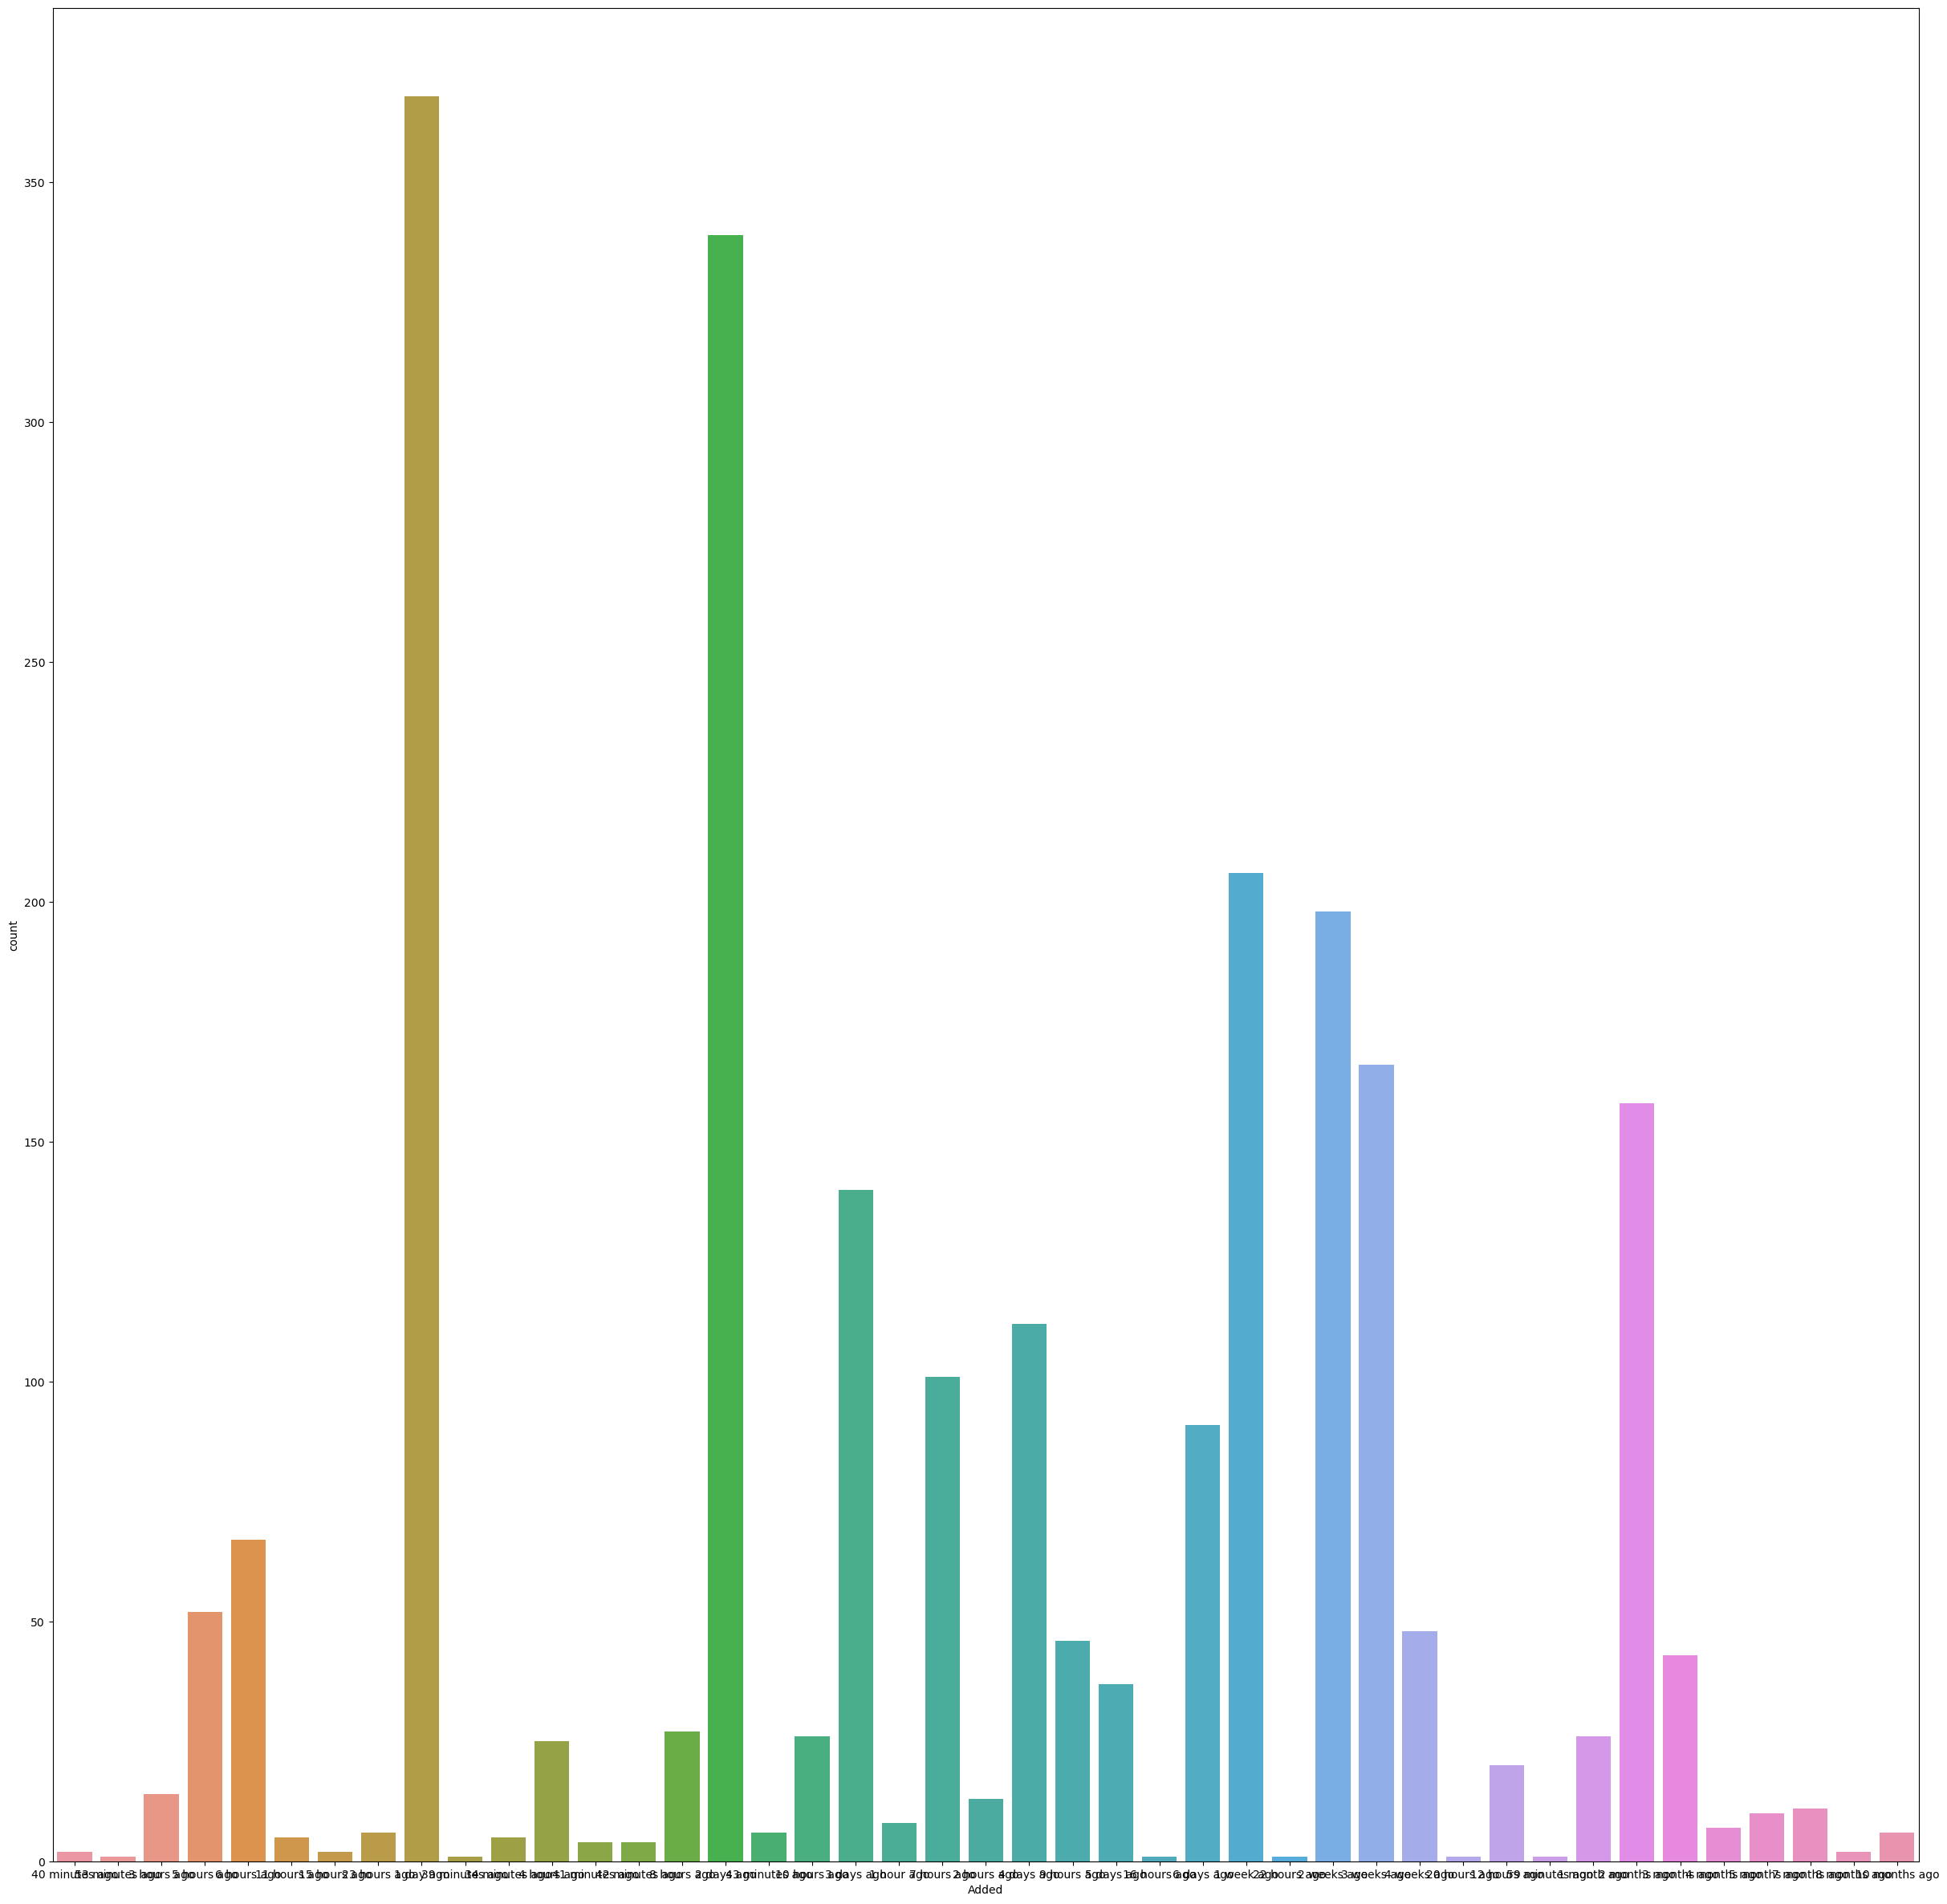

In [27]:
obj_columns2 = df2.select_dtypes('object').columns
obj_columns2 = obj_columns2[1:]

# Plot for each identified column
for c2 in df2[obj_columns2].columns:
    plt.figure(figsize=(30,30))
    sns.countplot(x=c2,data=df2);

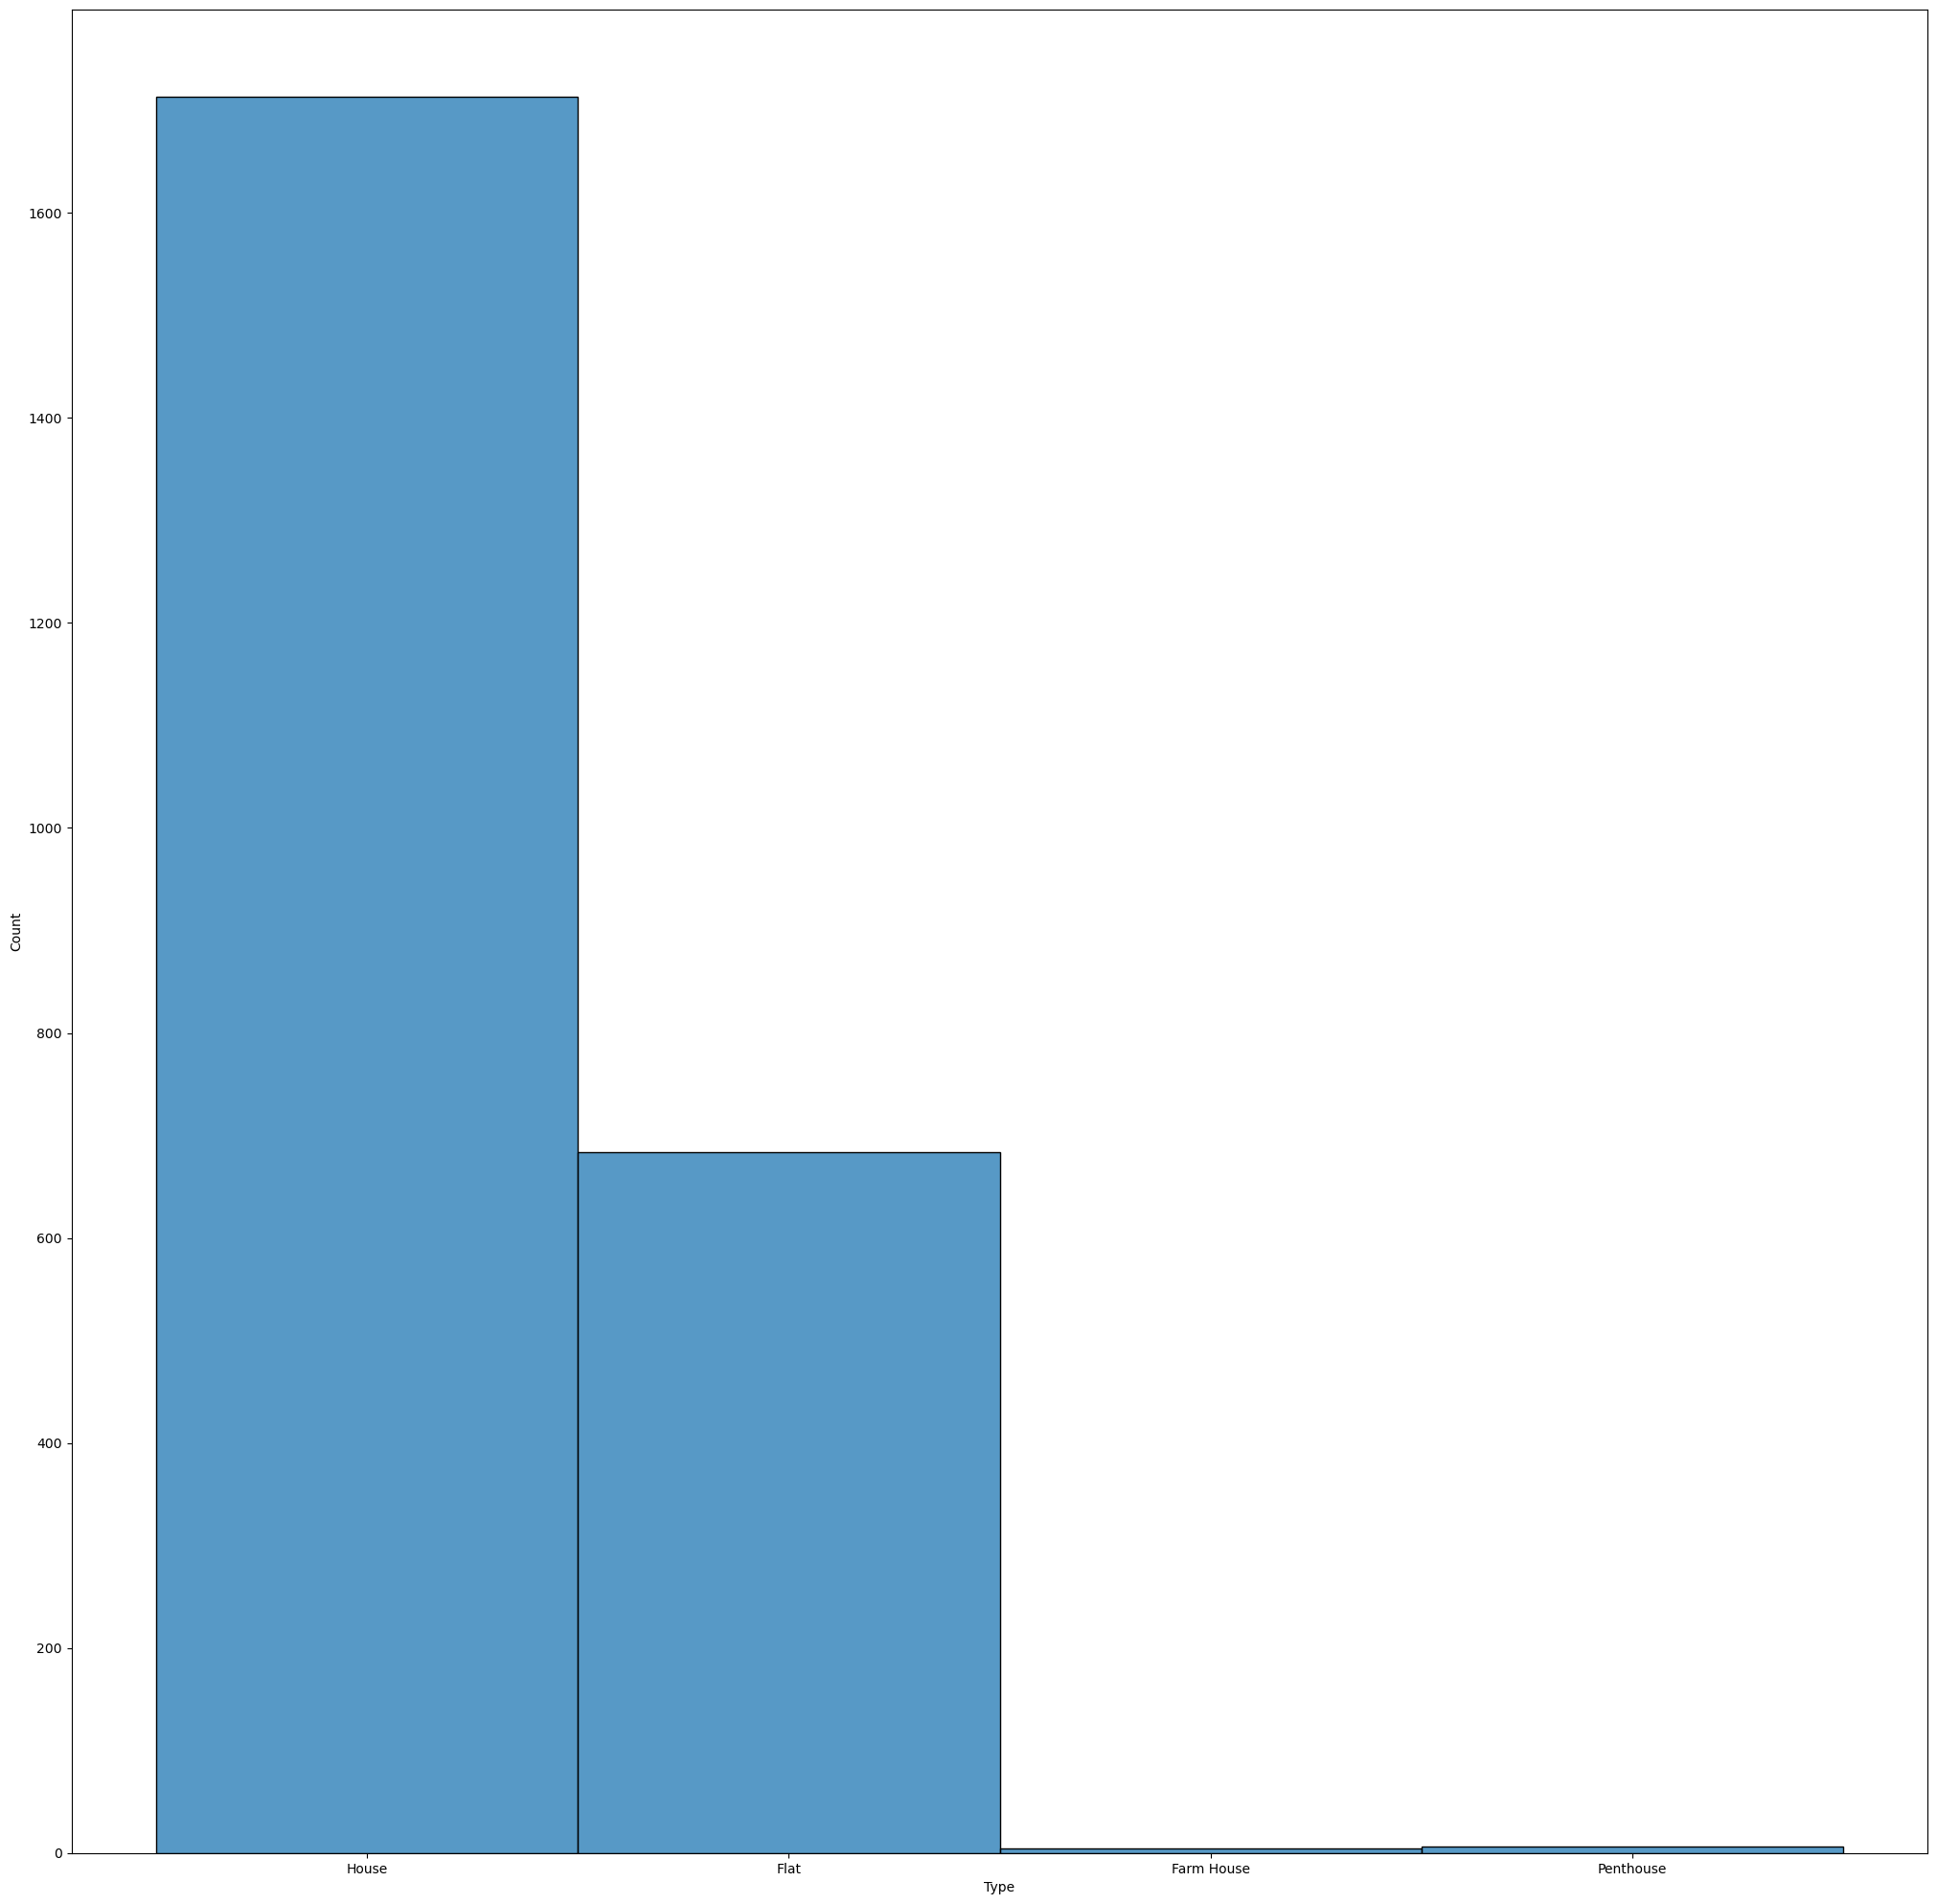

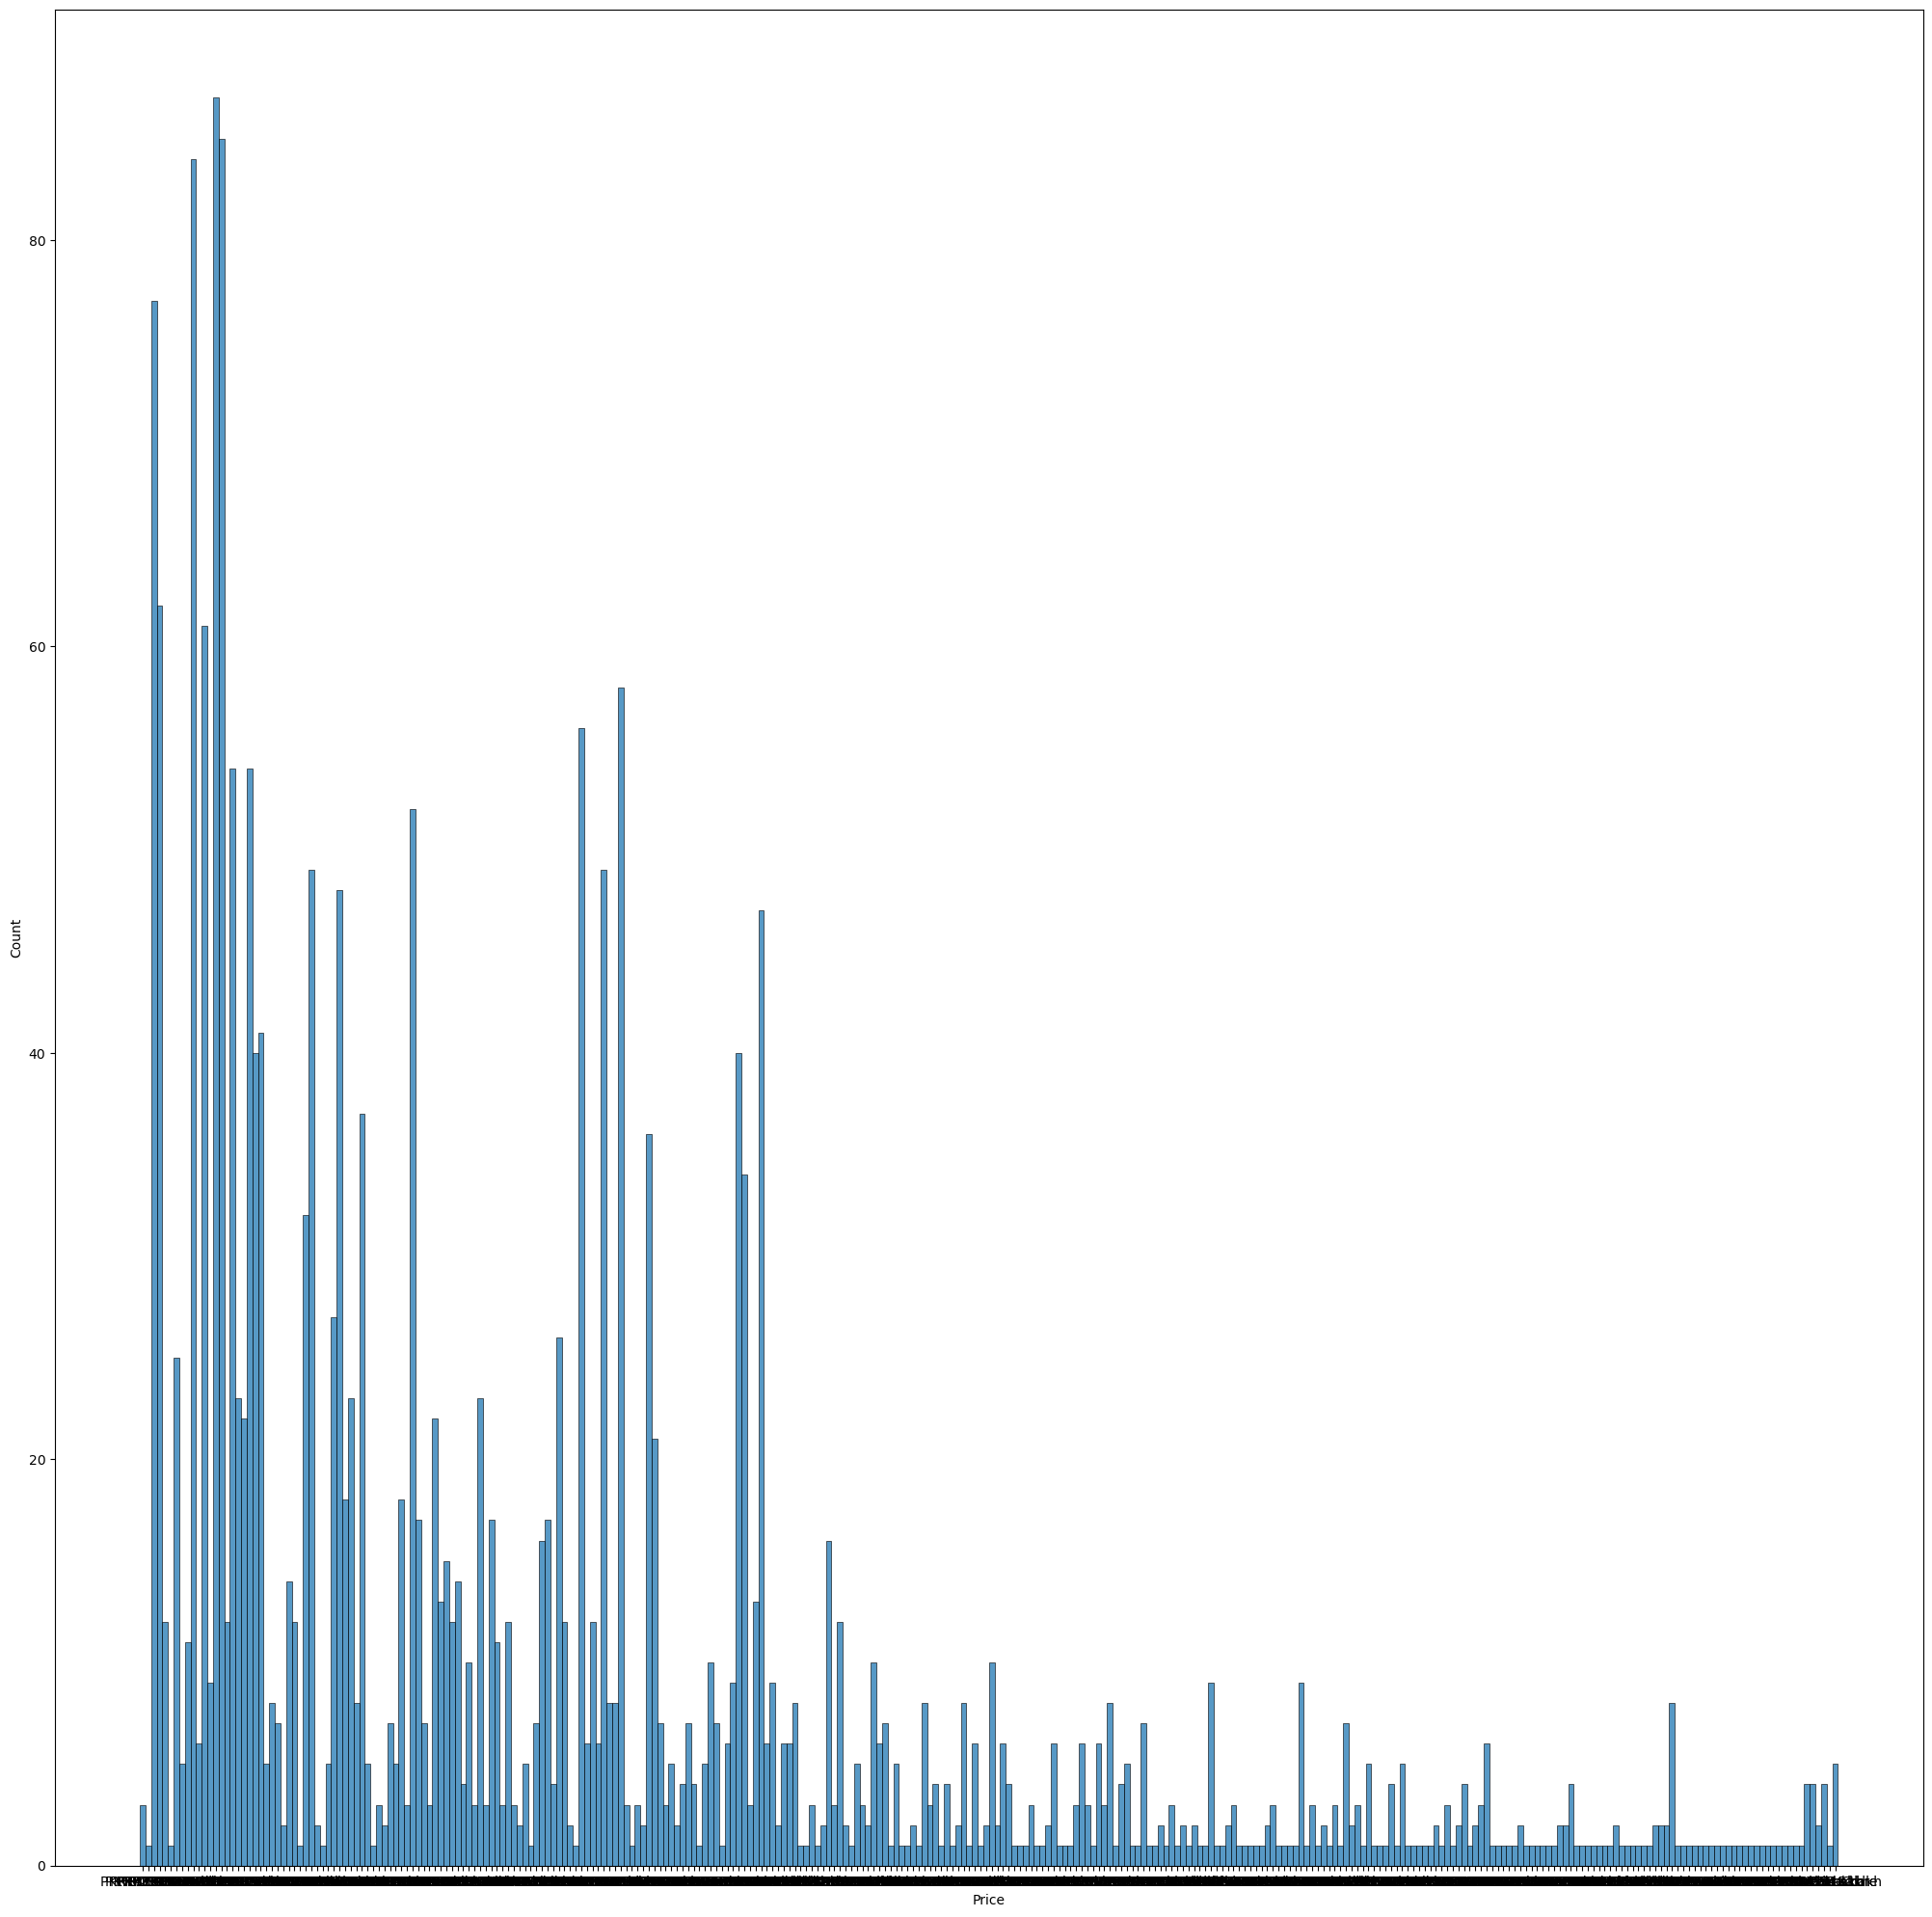

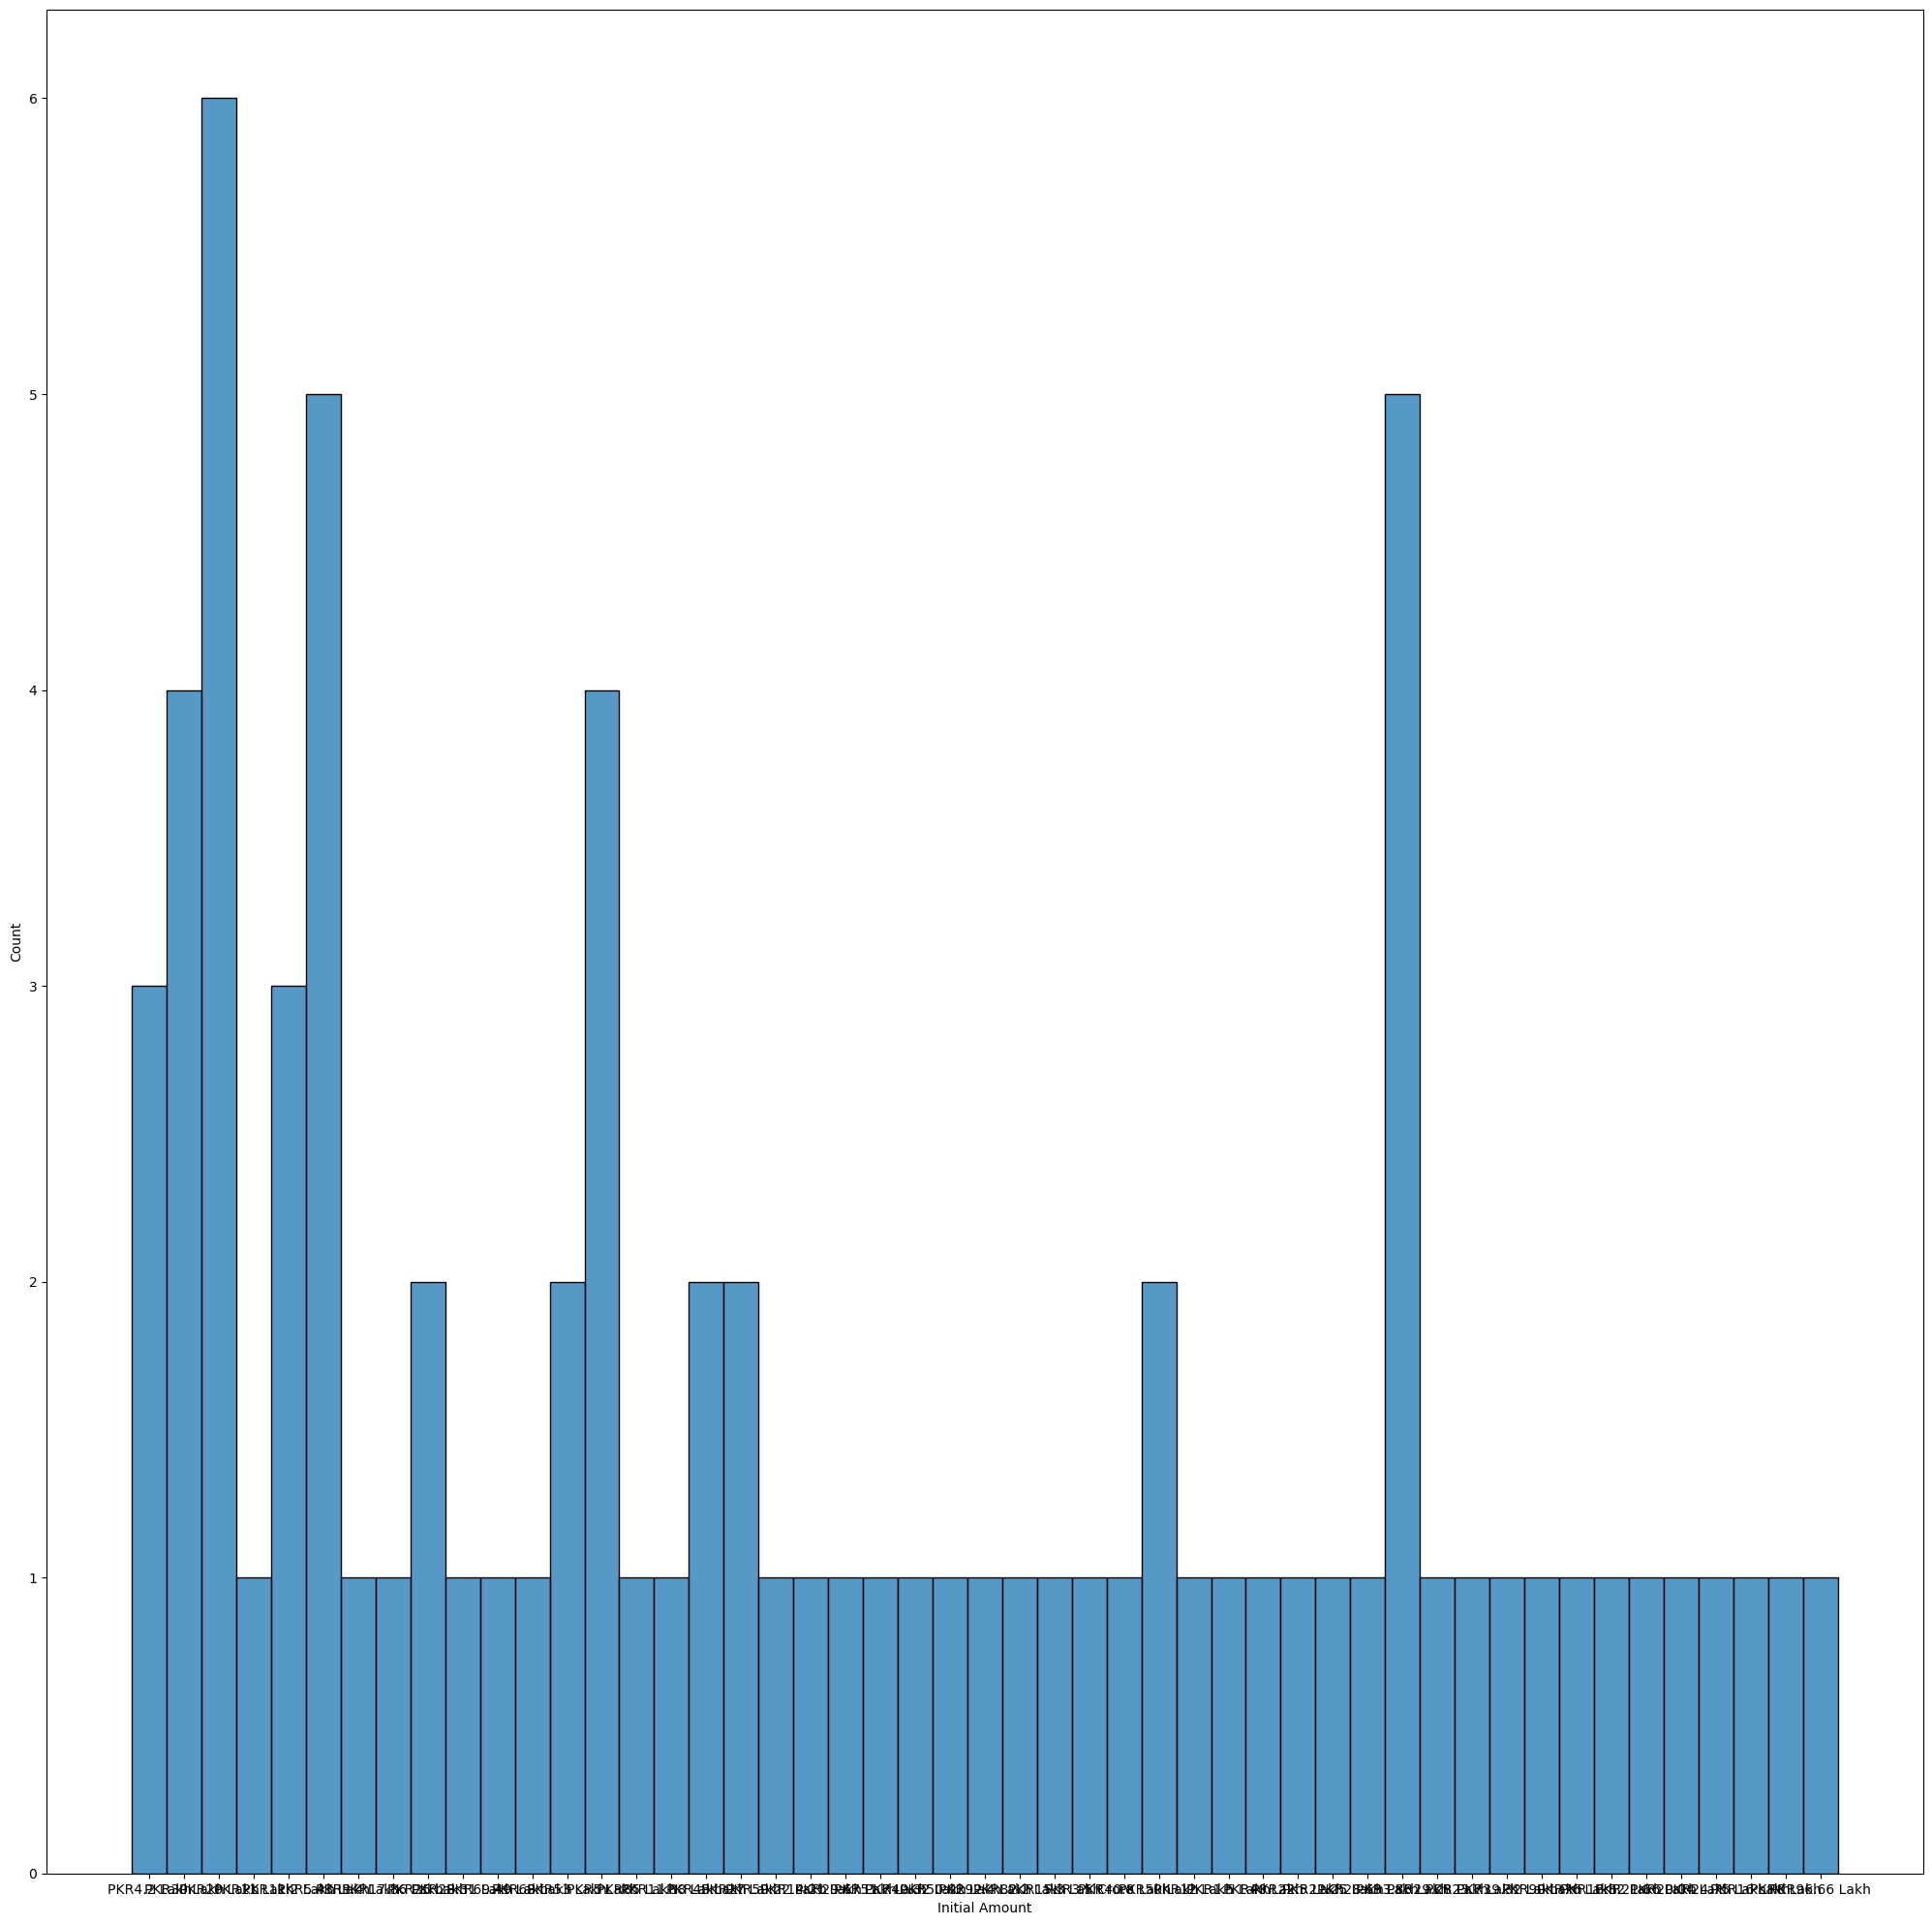

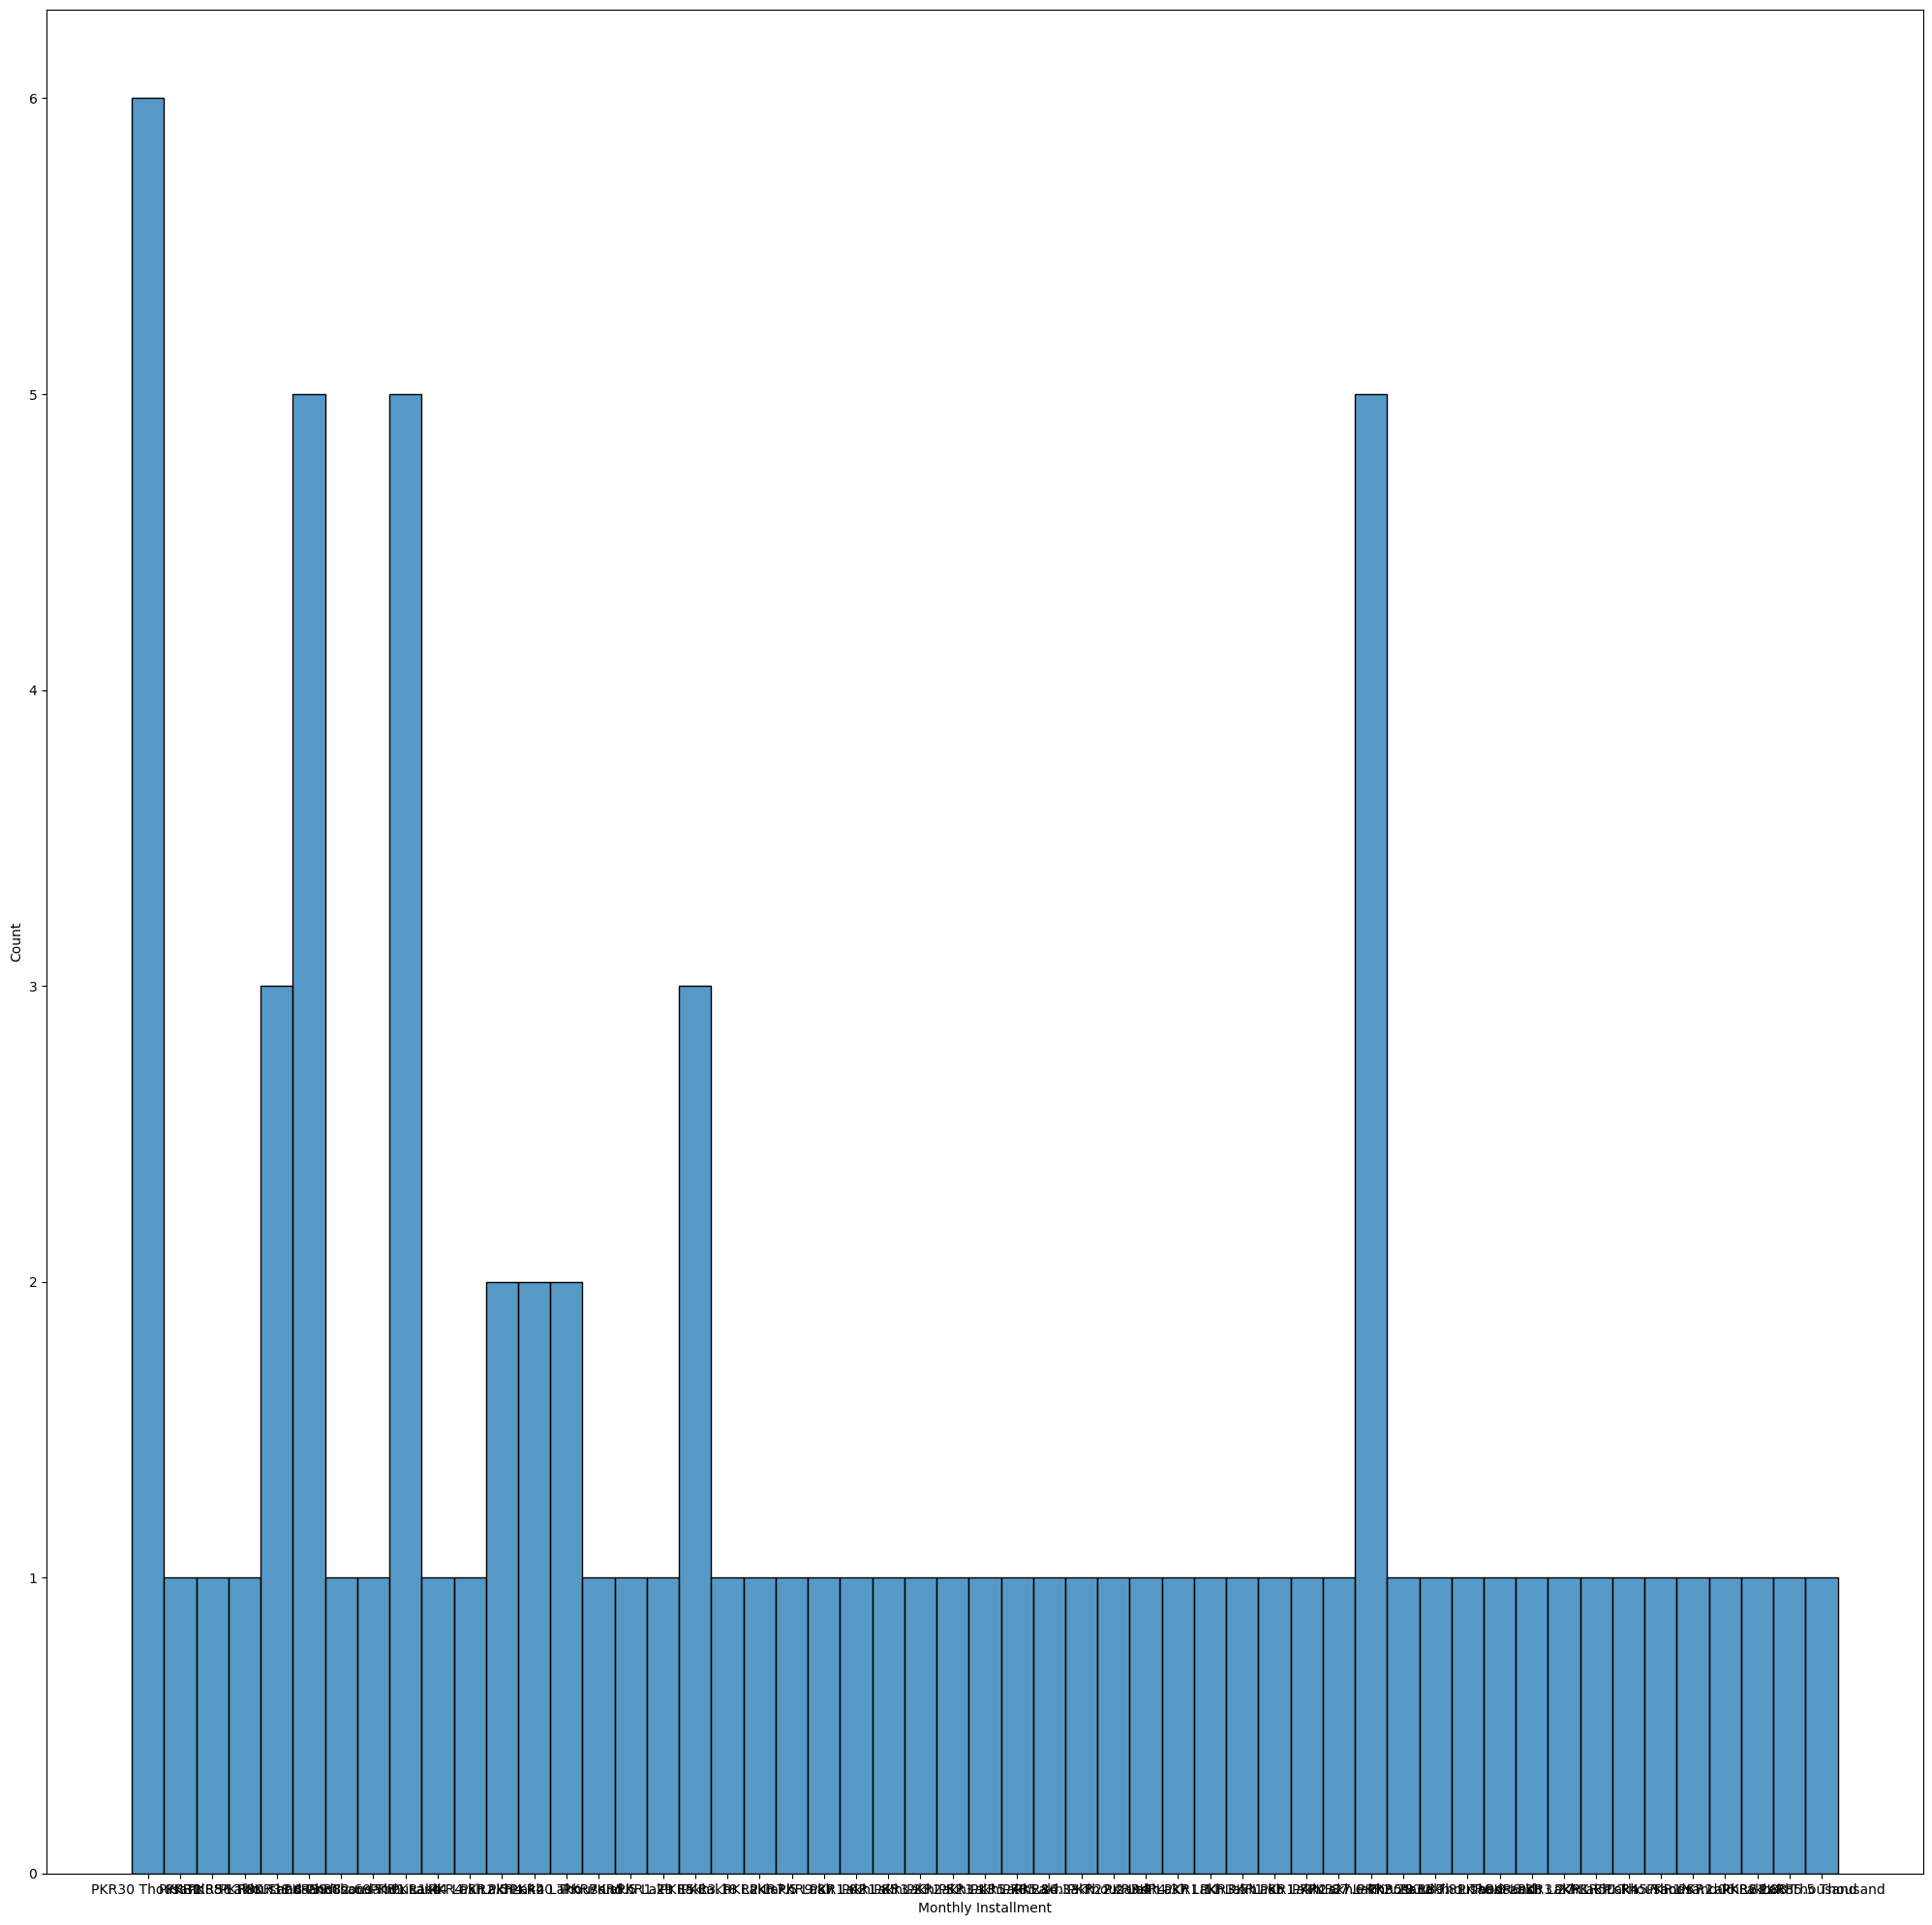

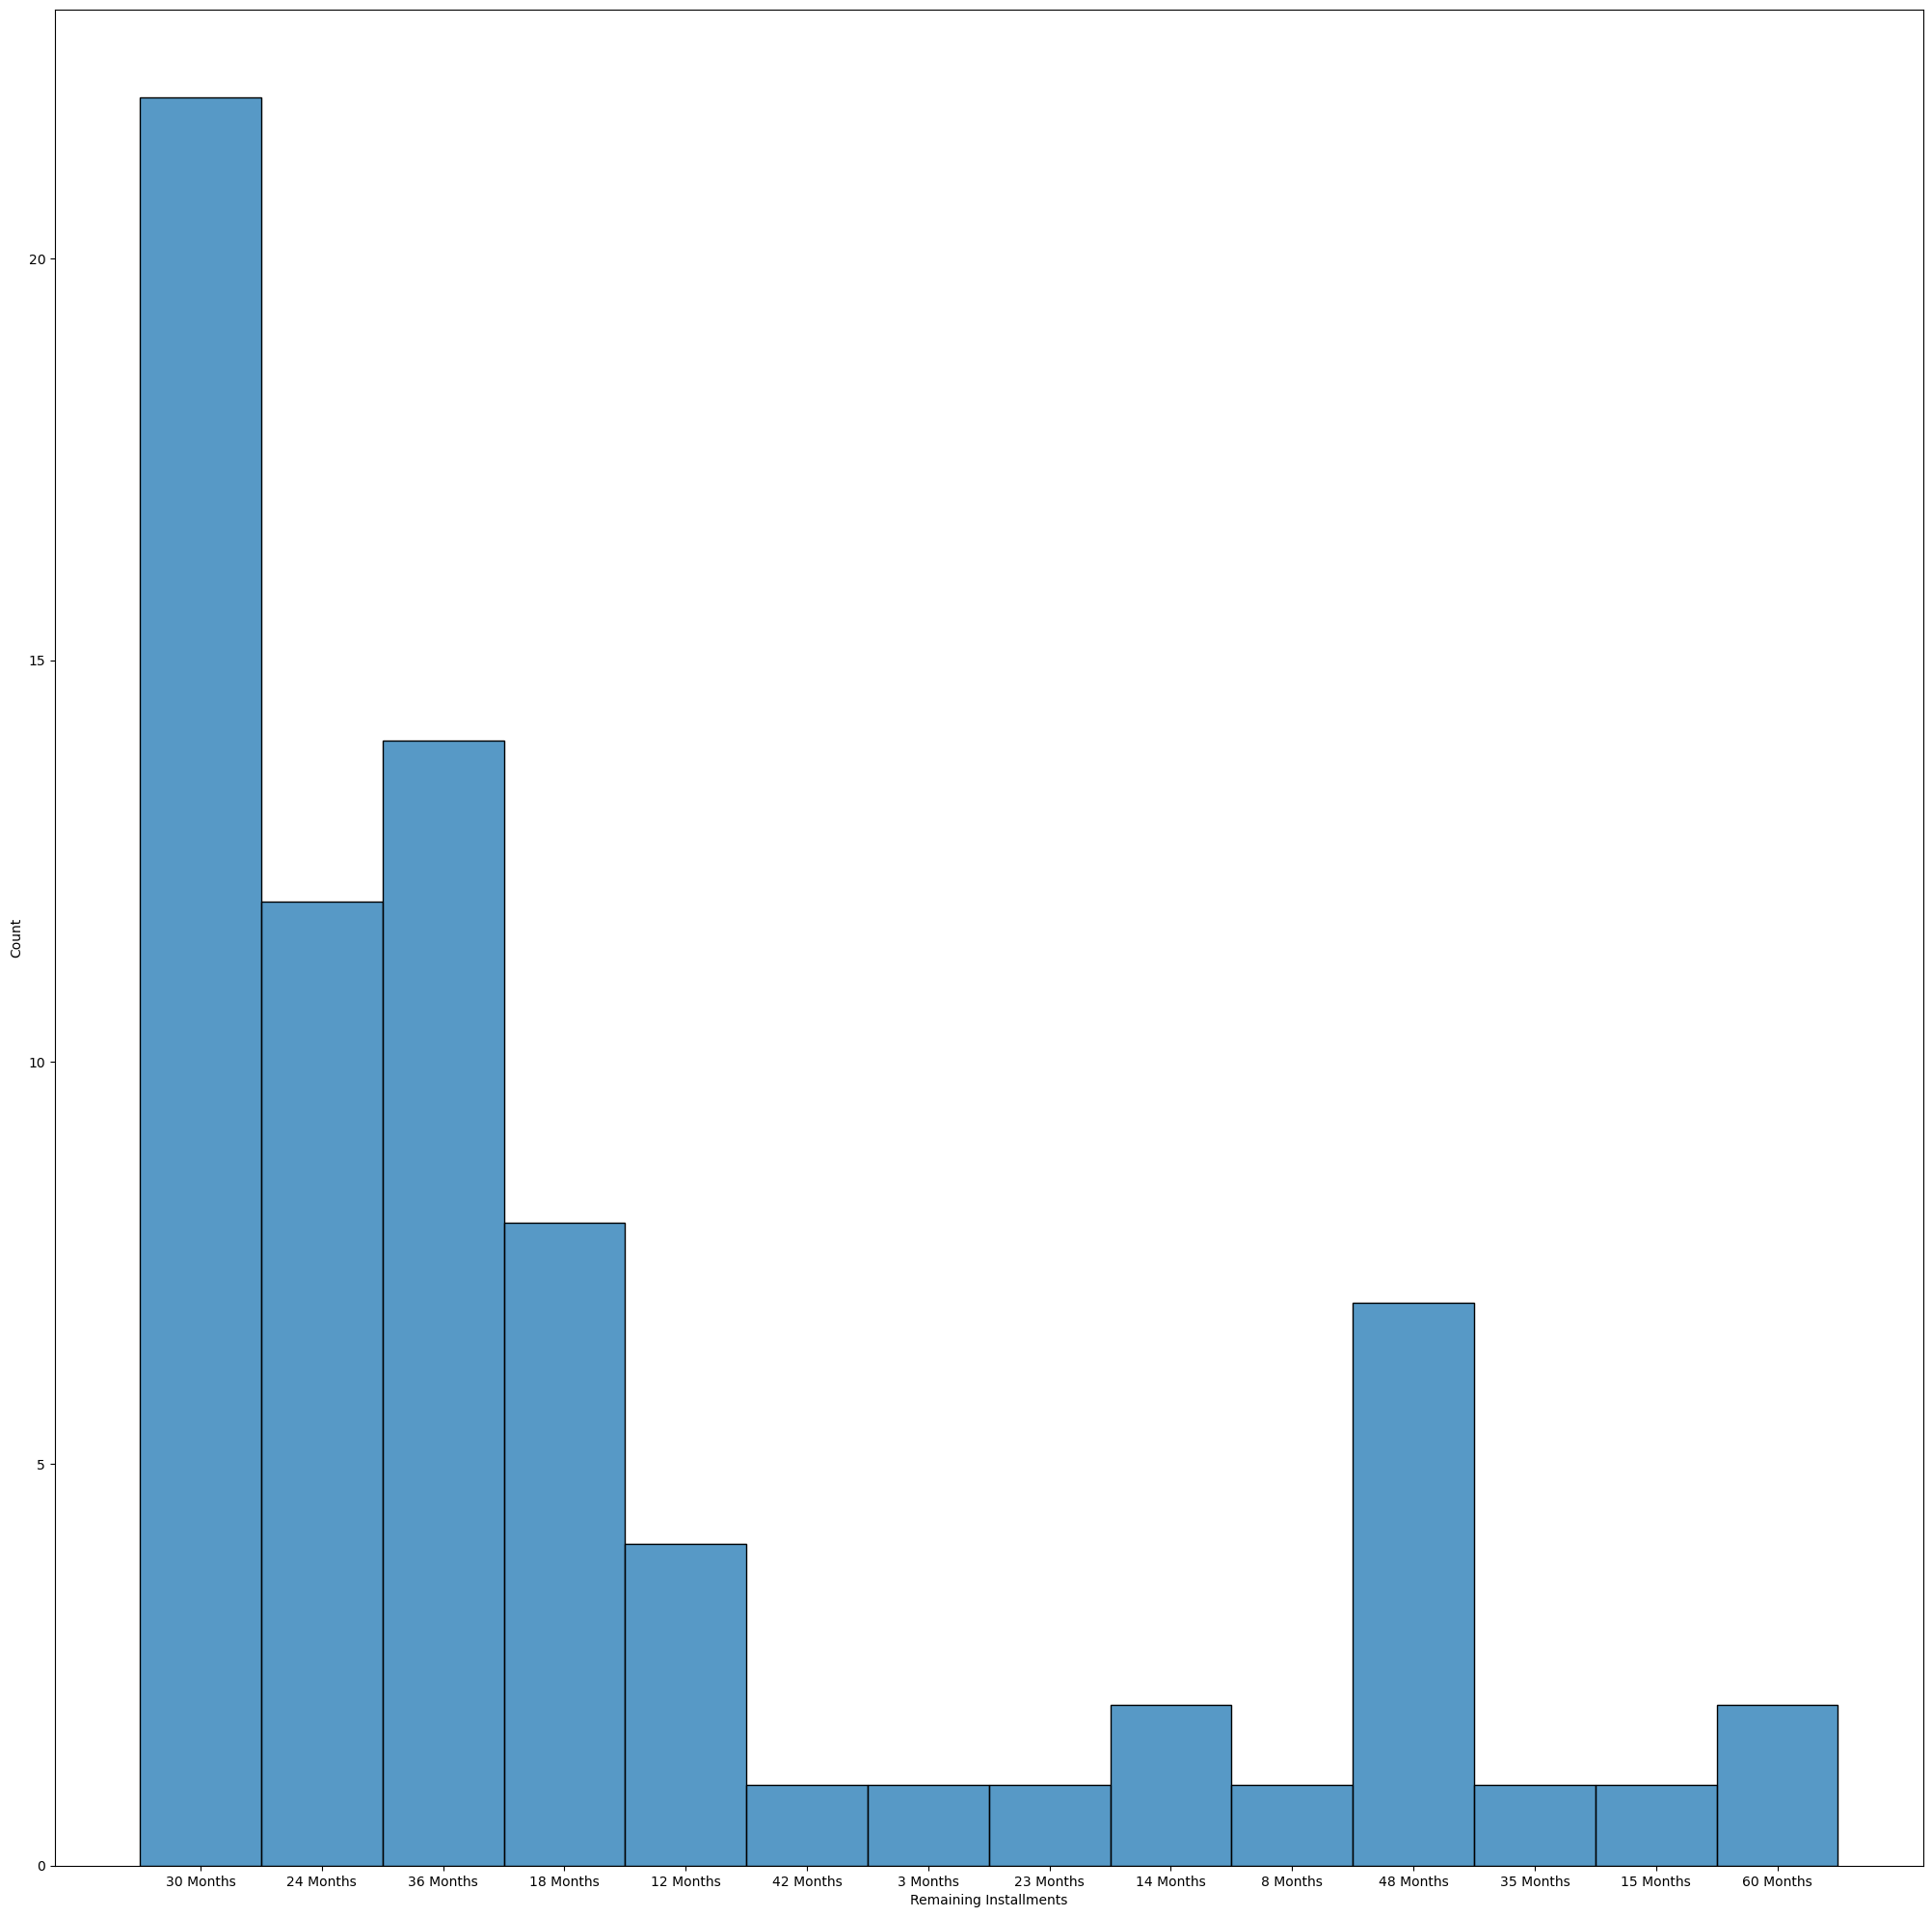

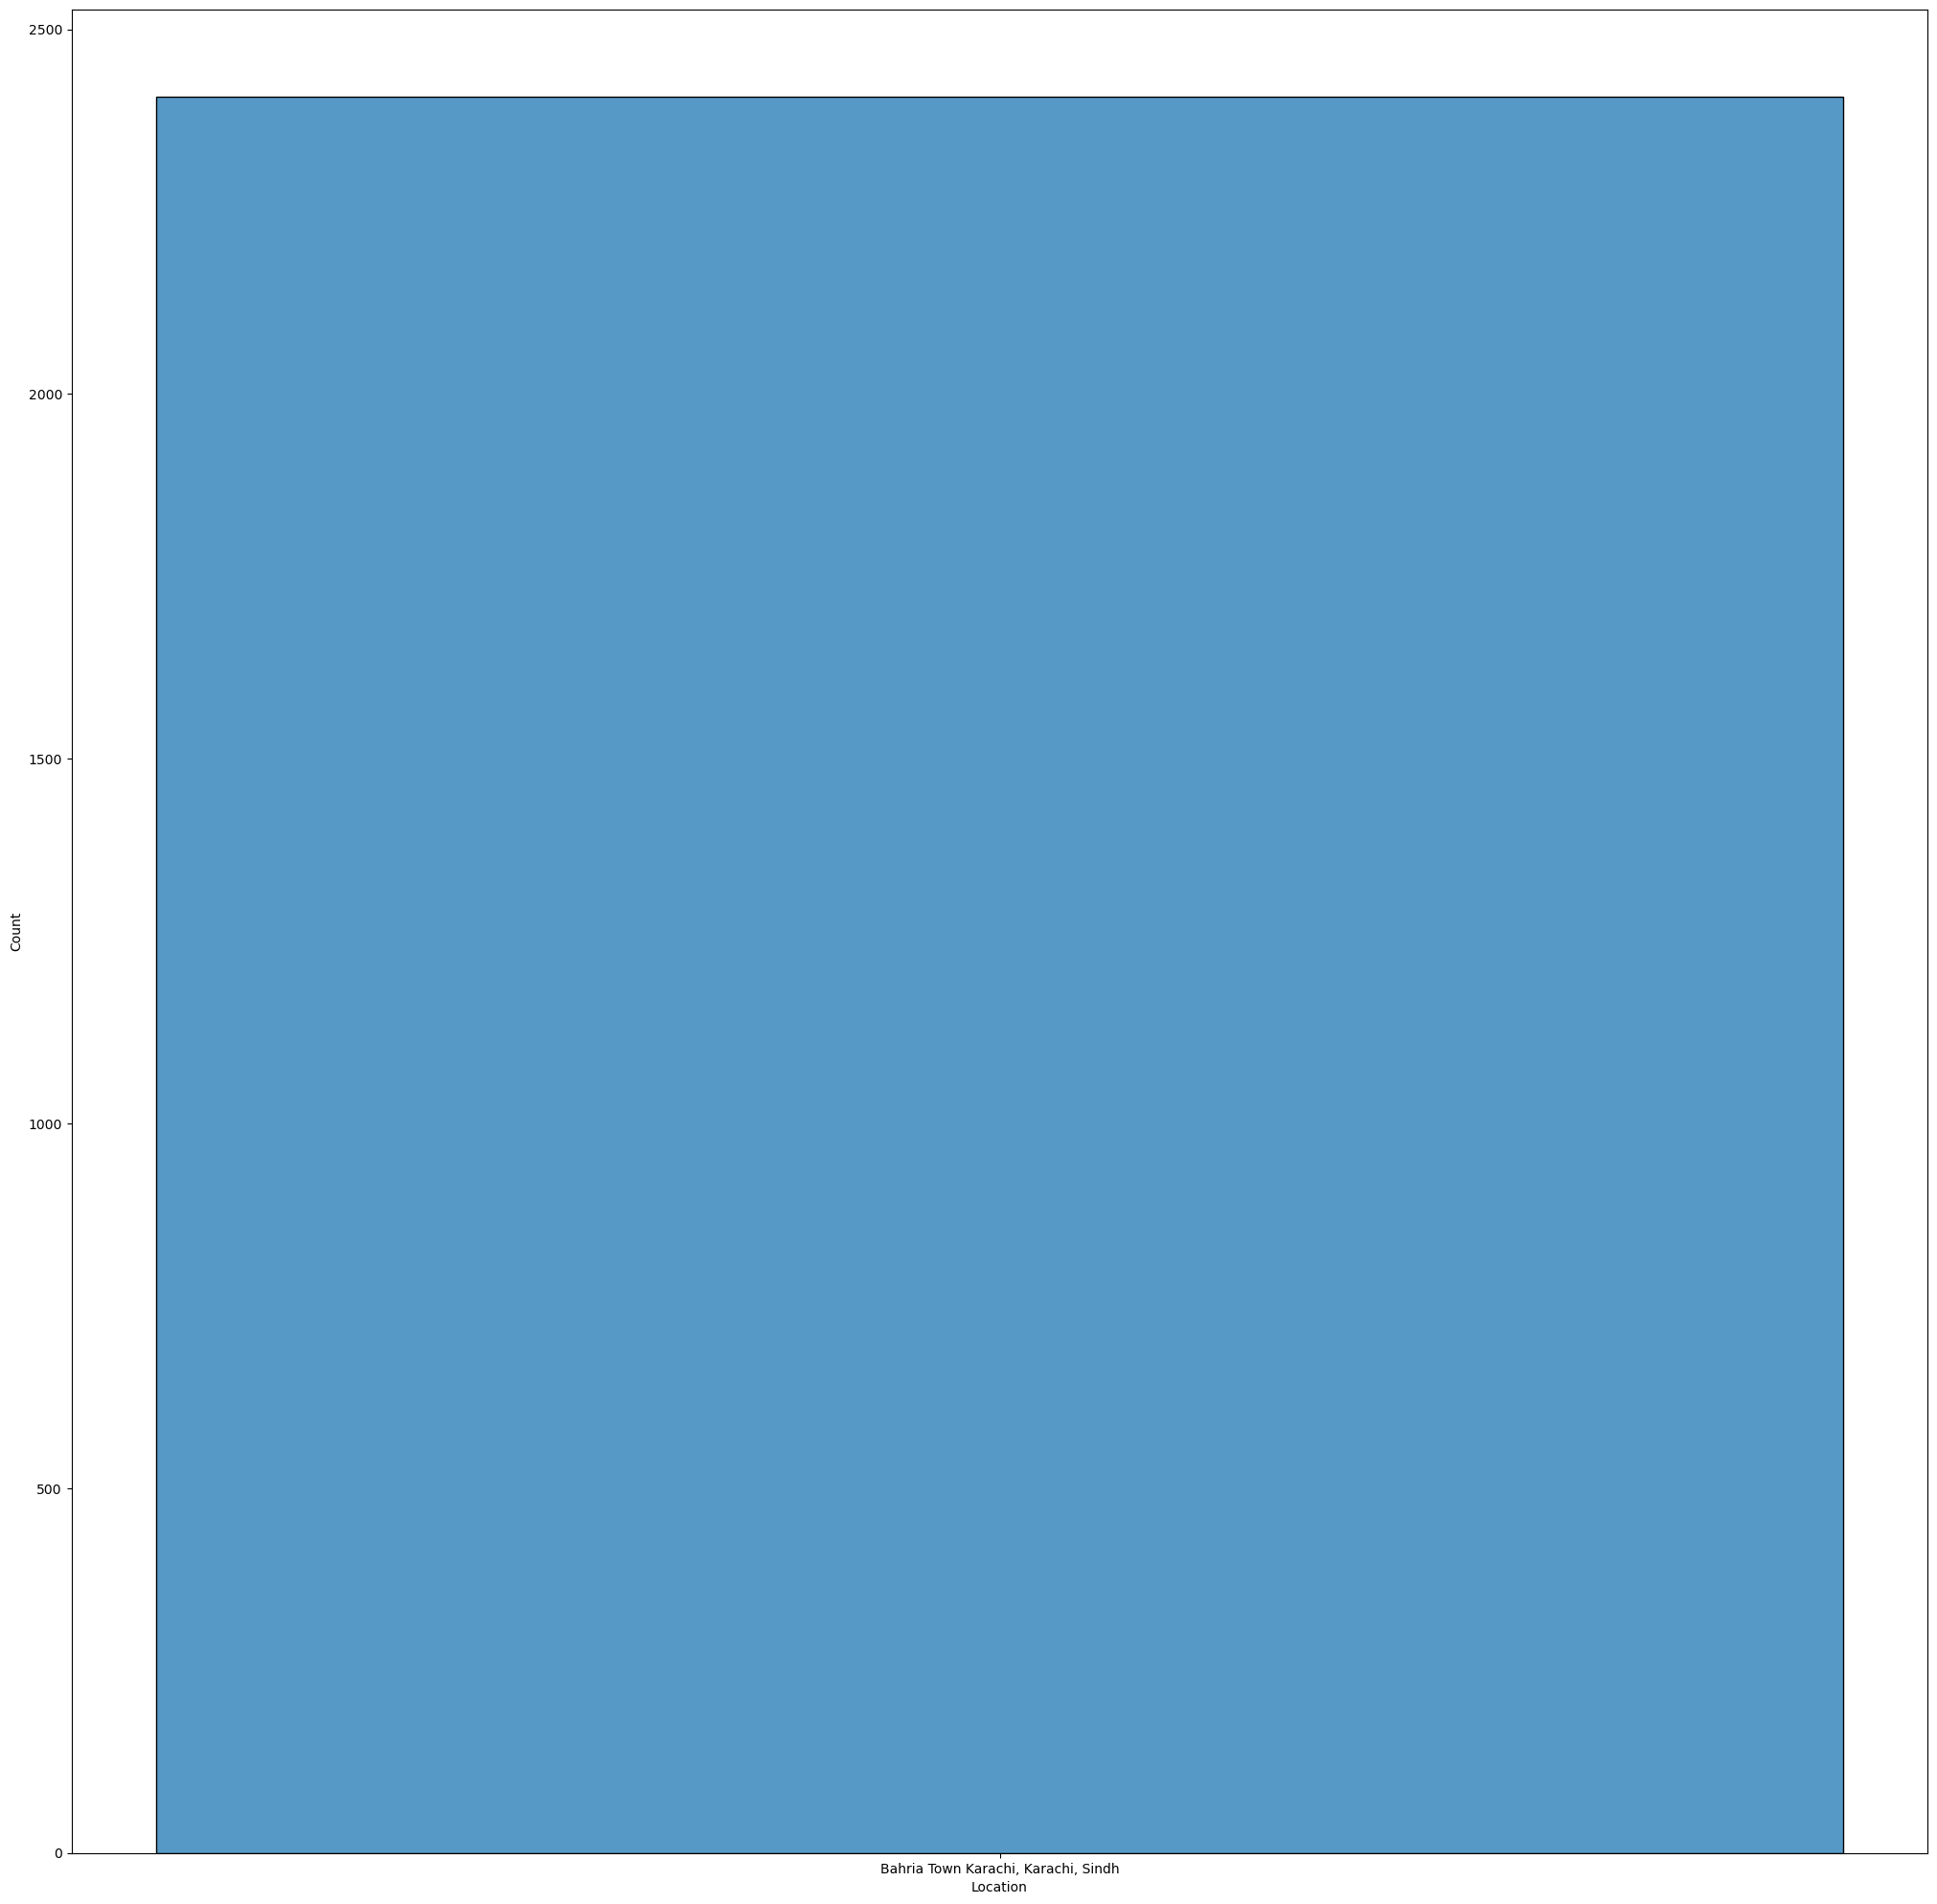

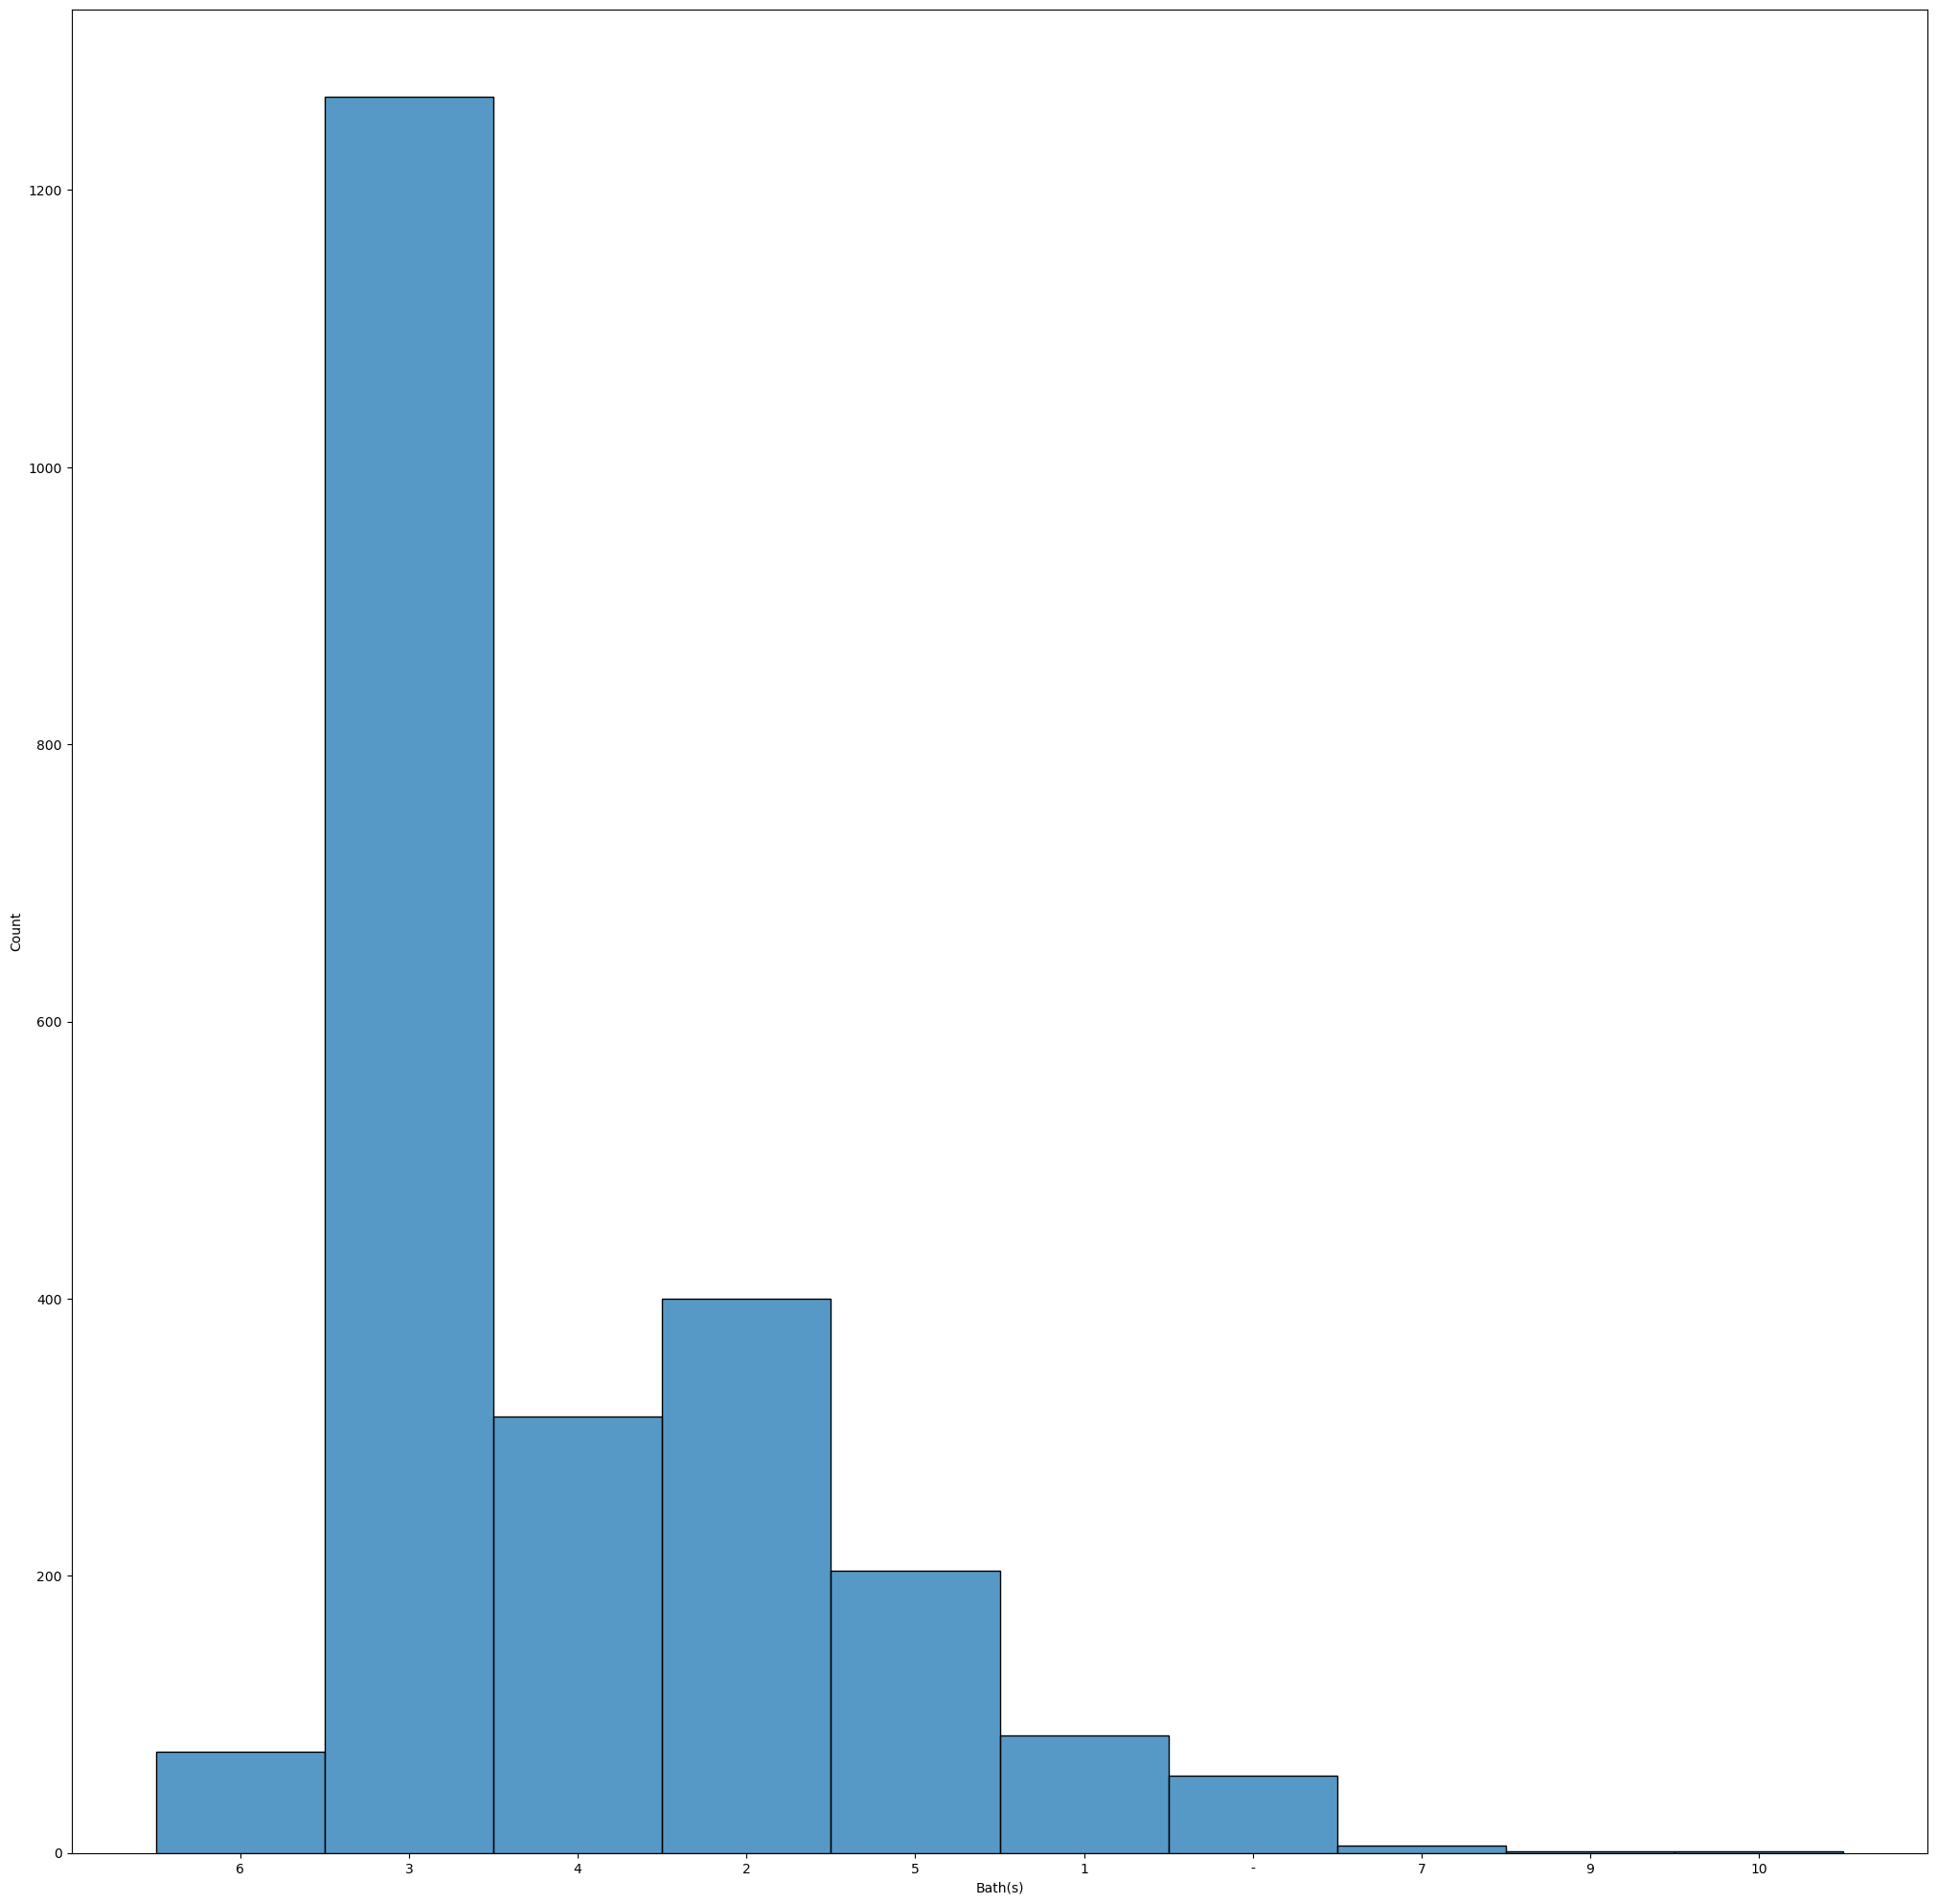

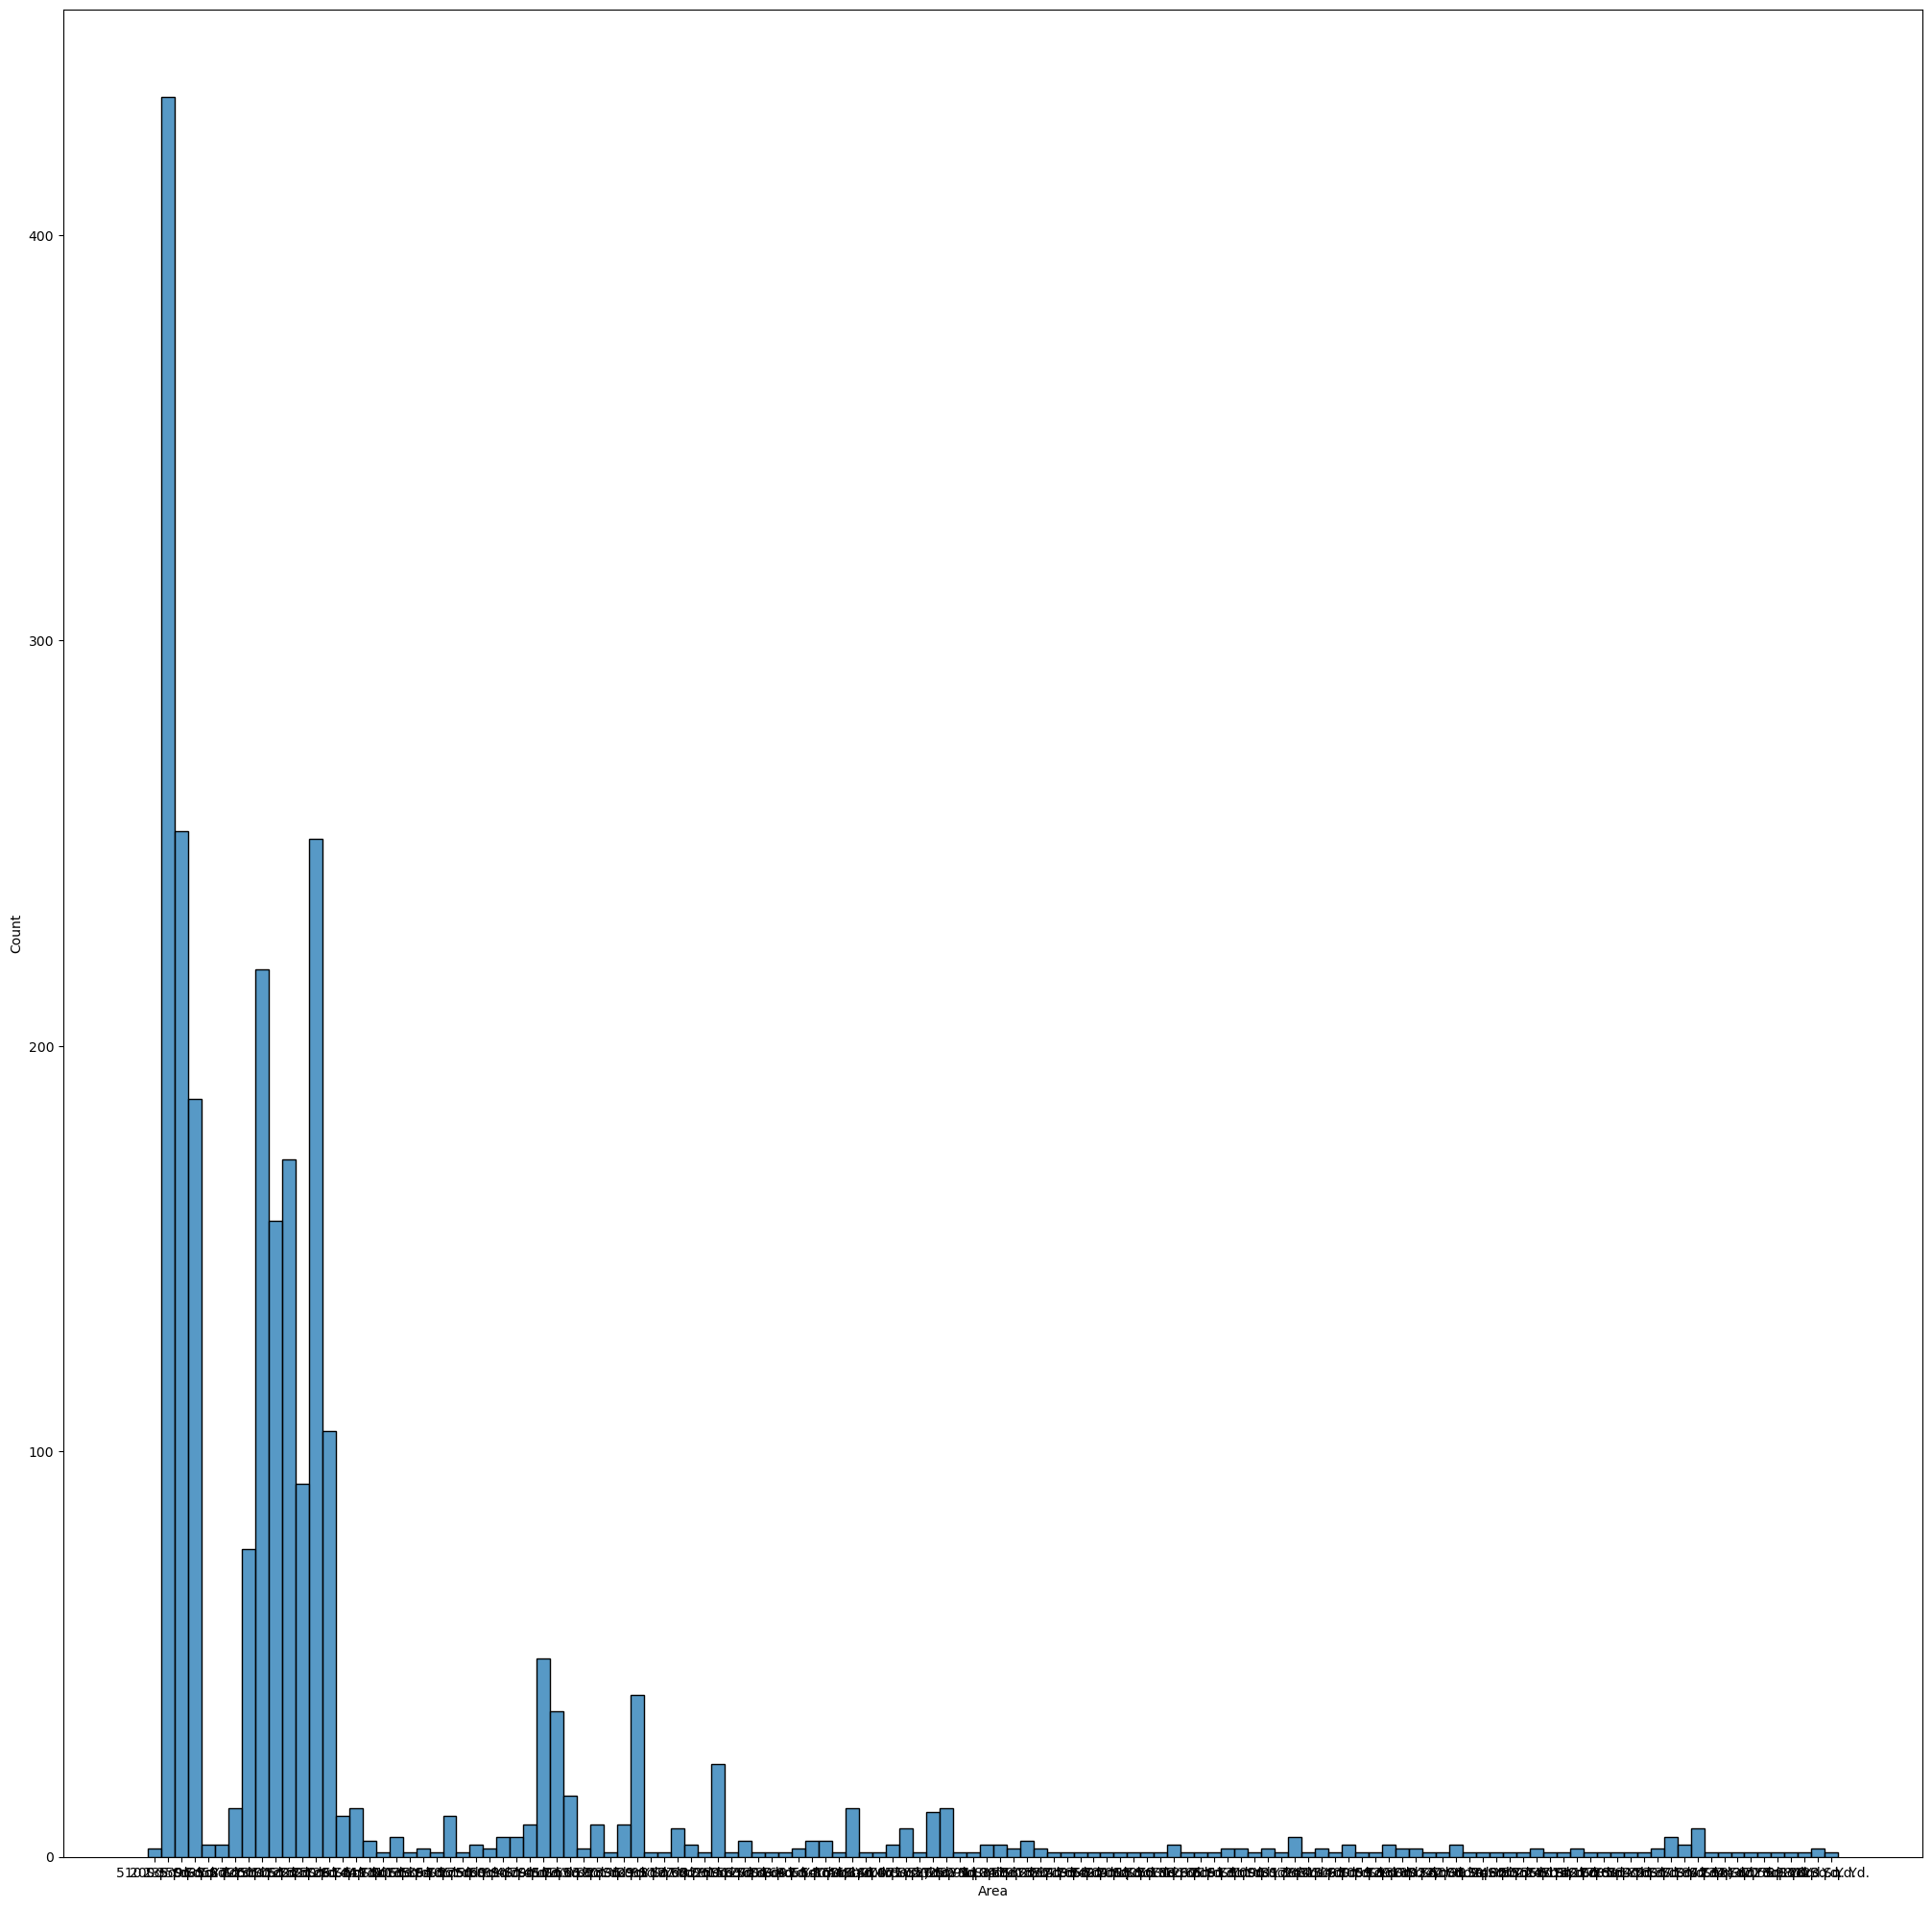

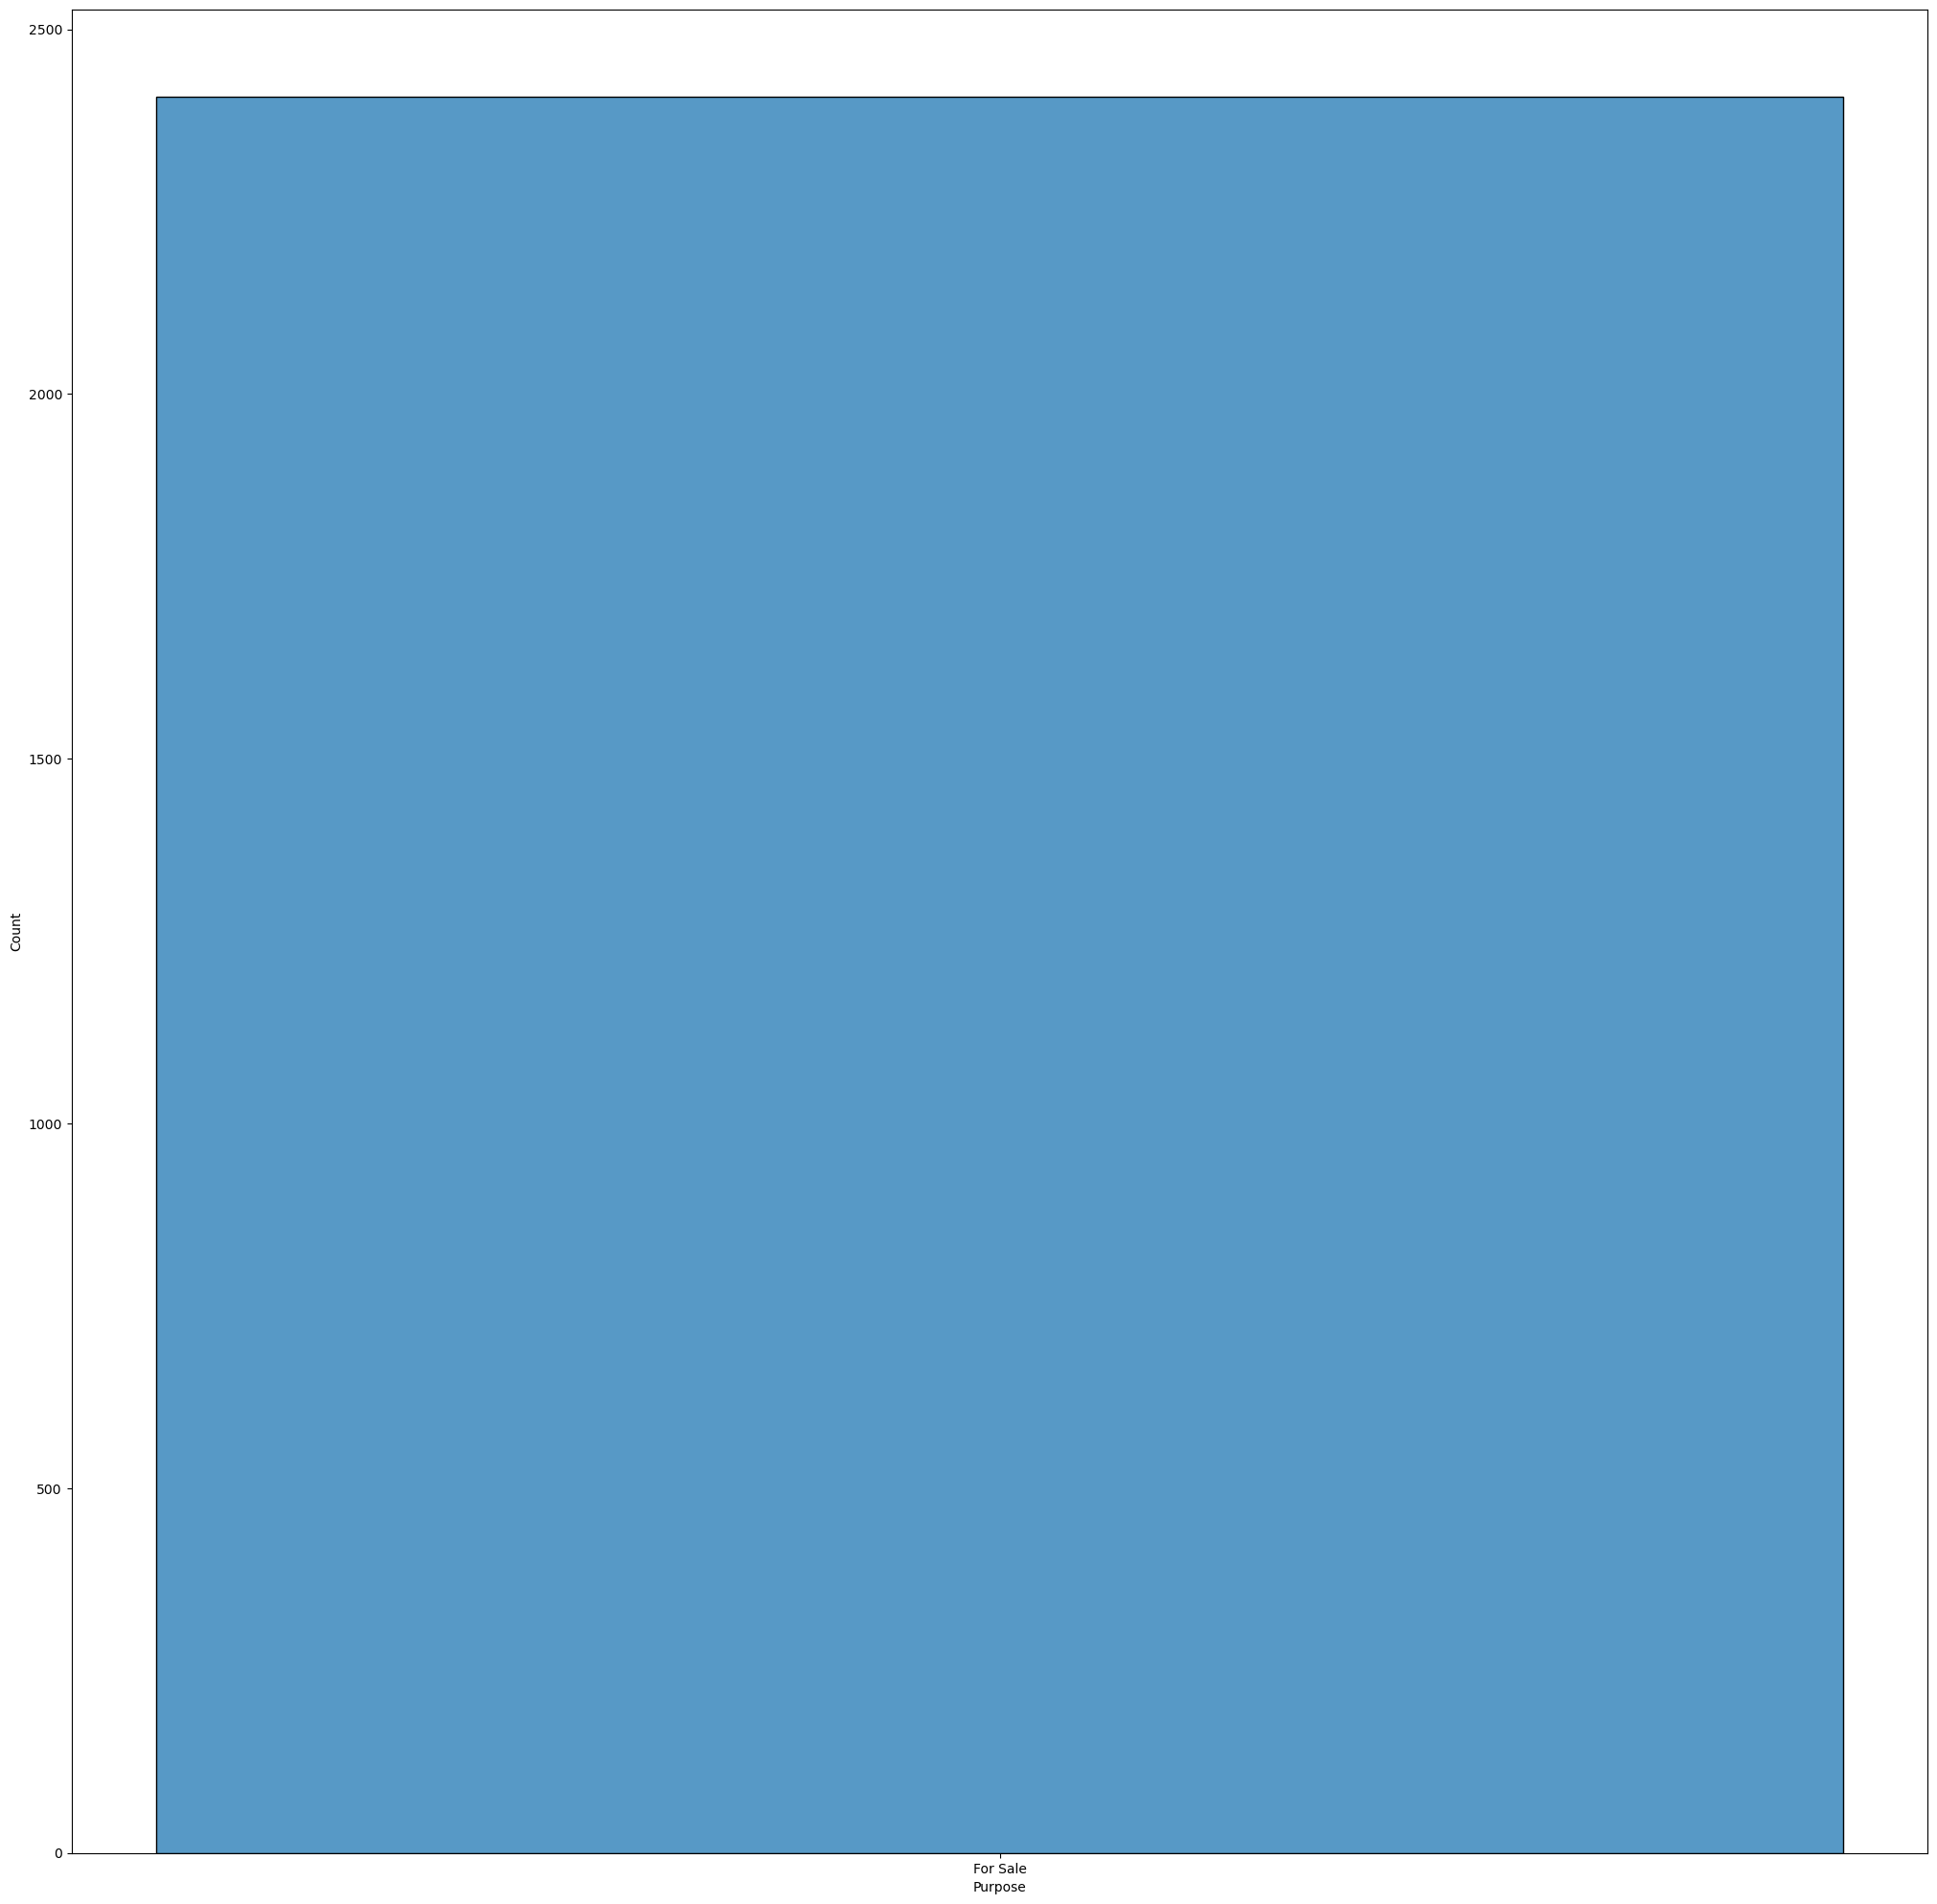

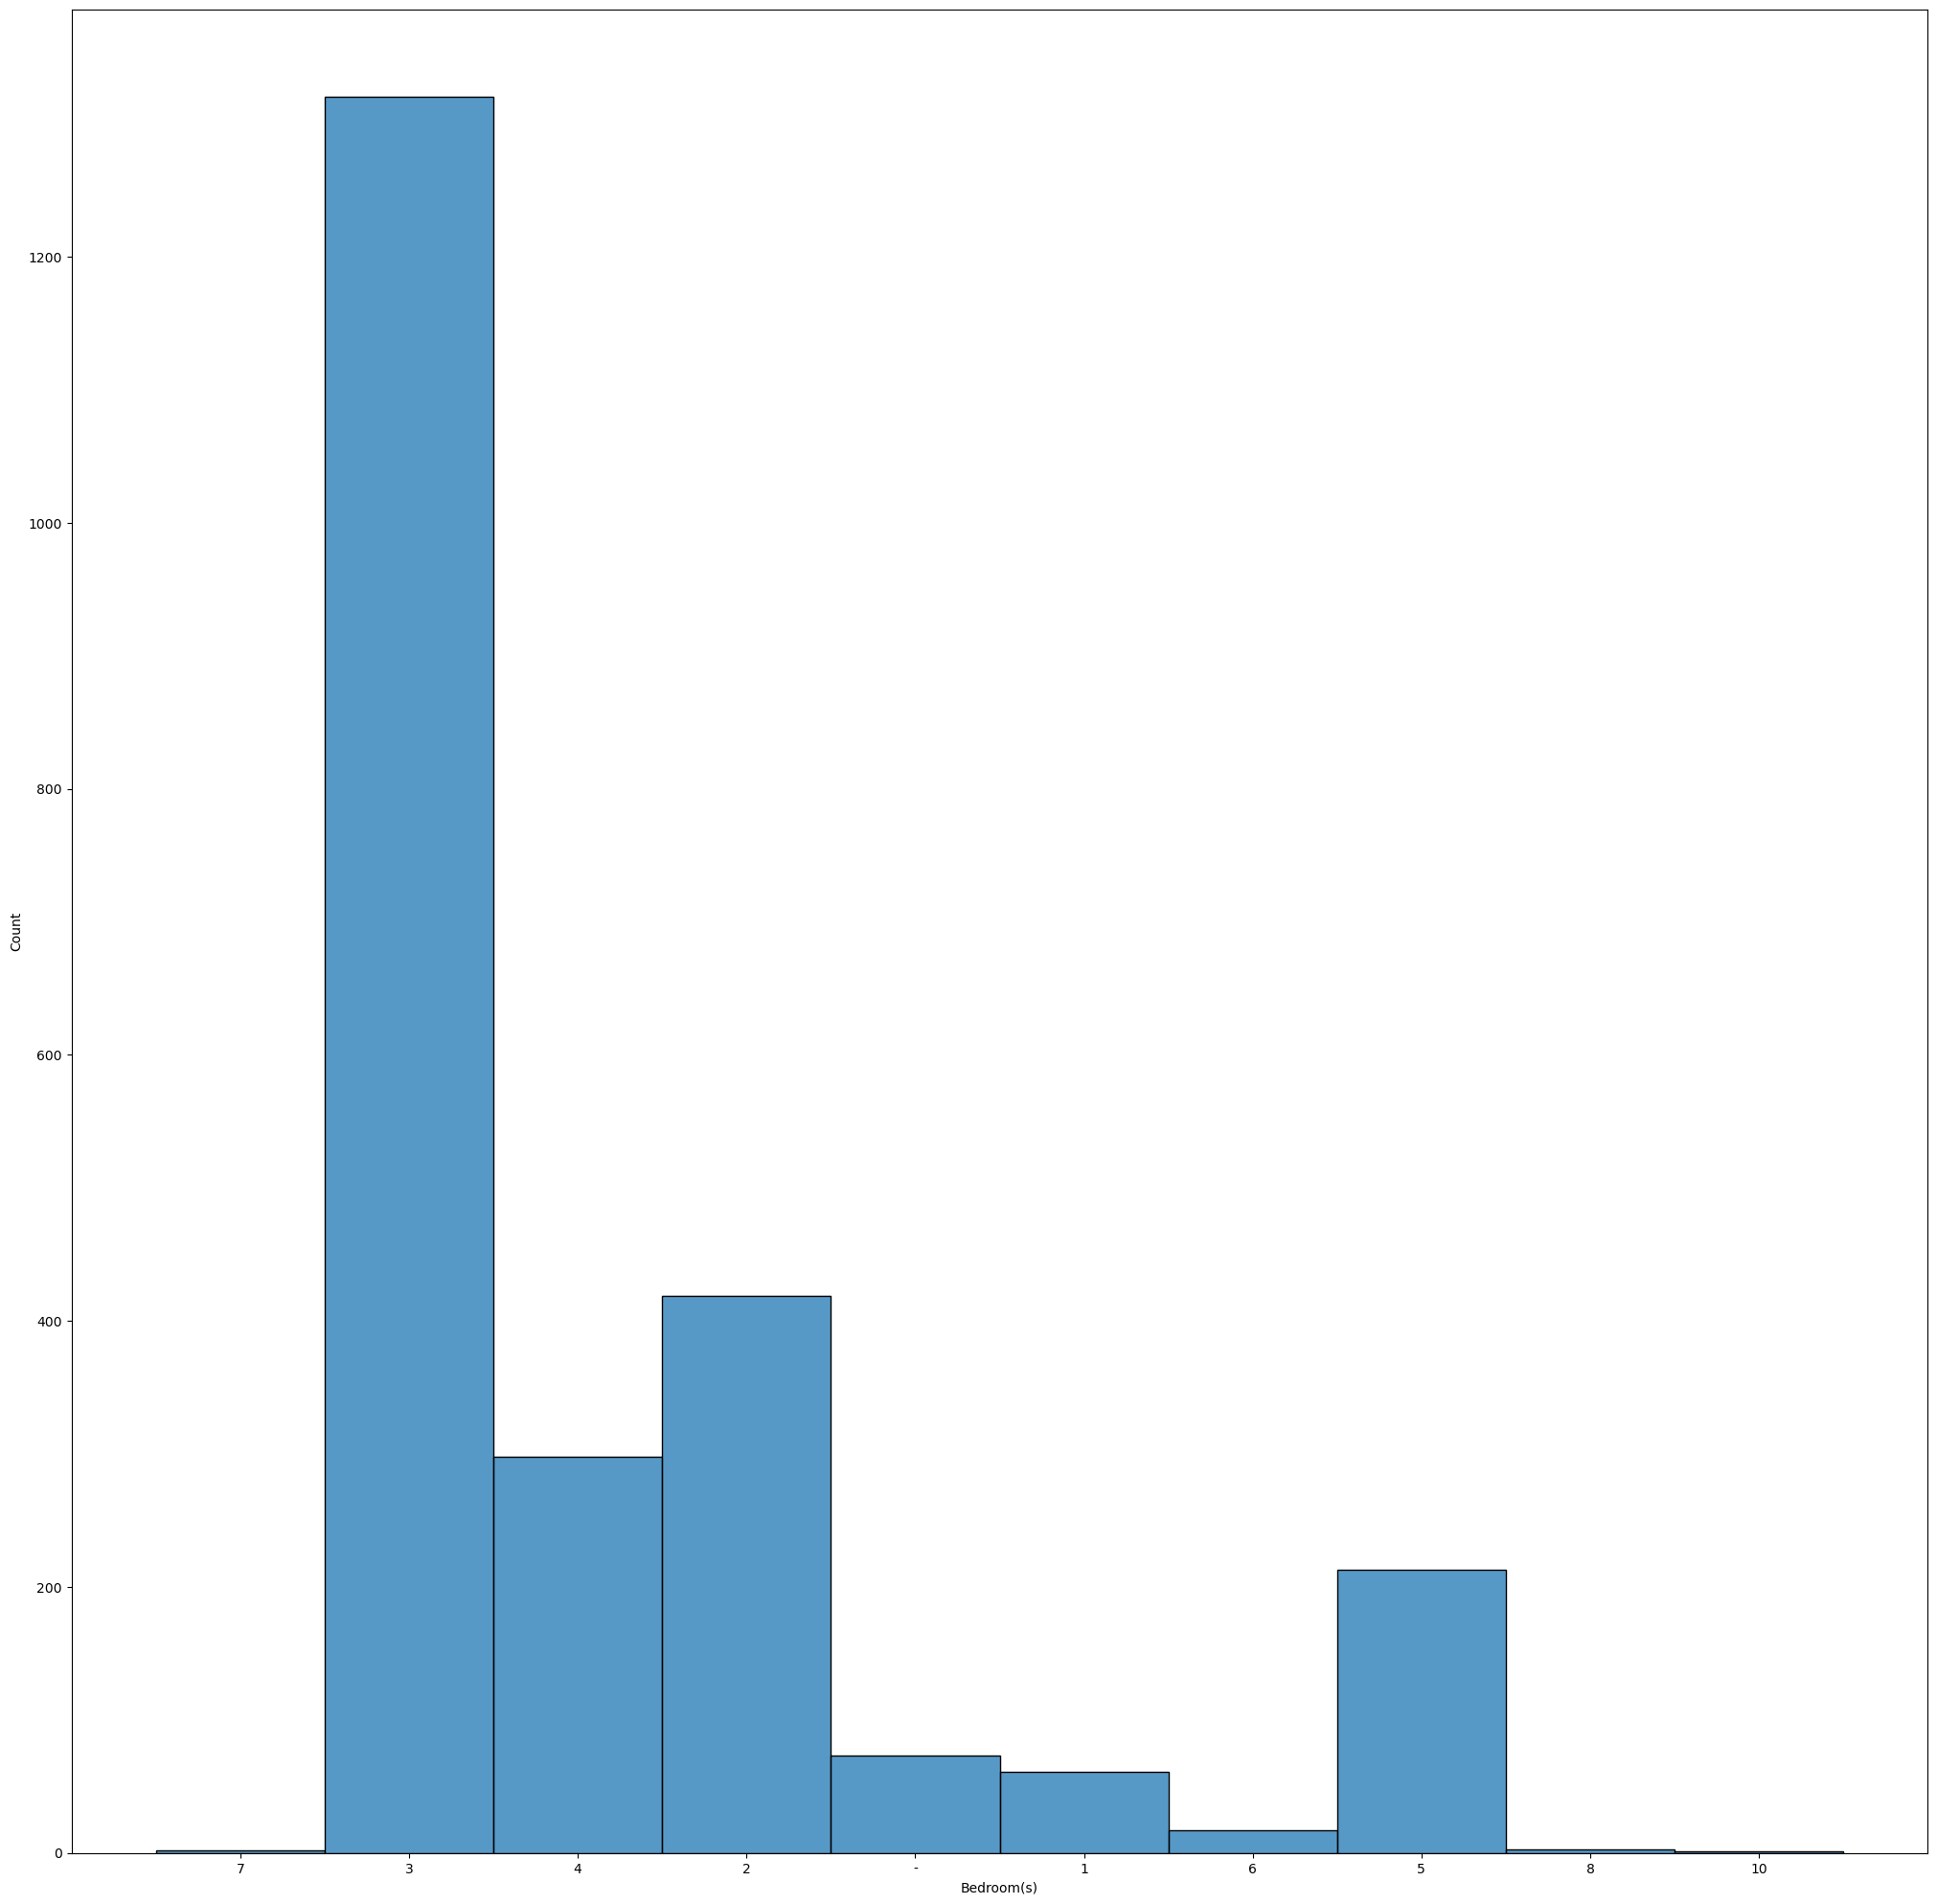

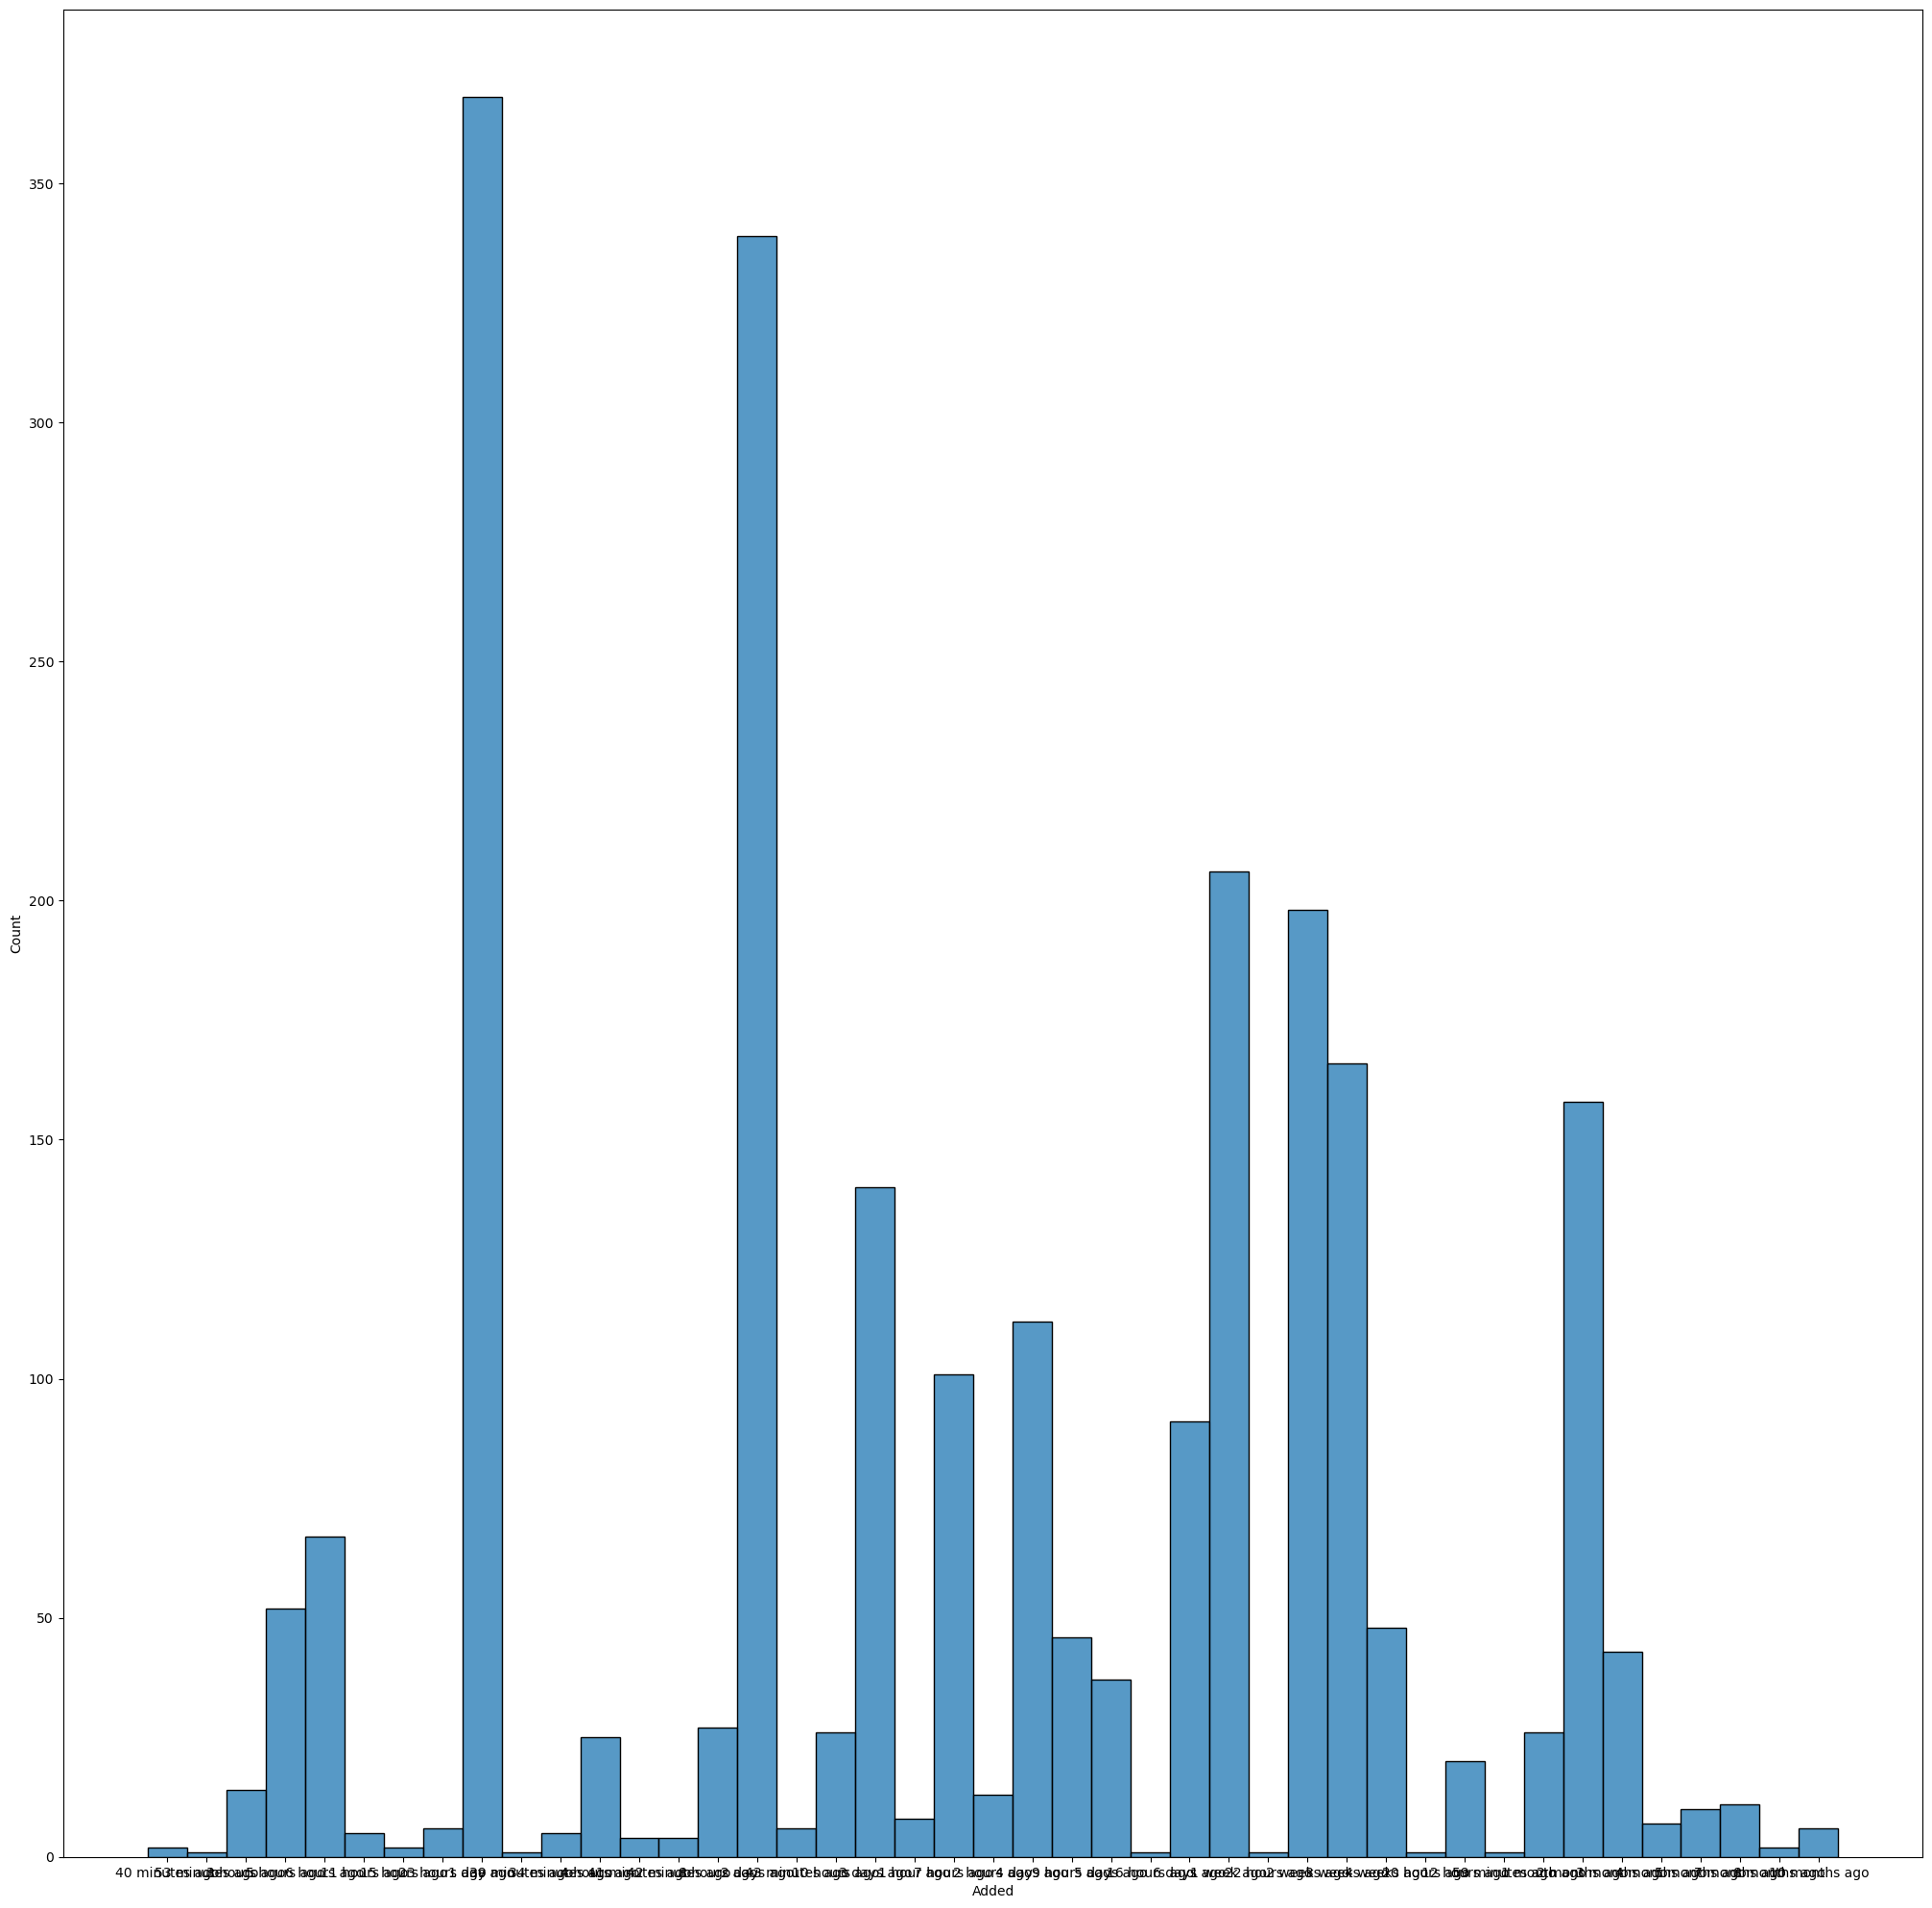

In [28]:
for c2 in df[obj_columns2].columns:
    plt.figure(figsize = (25,25)) #creates a different figure
    sns.histplot(x=c2,data=df2,bins=10)

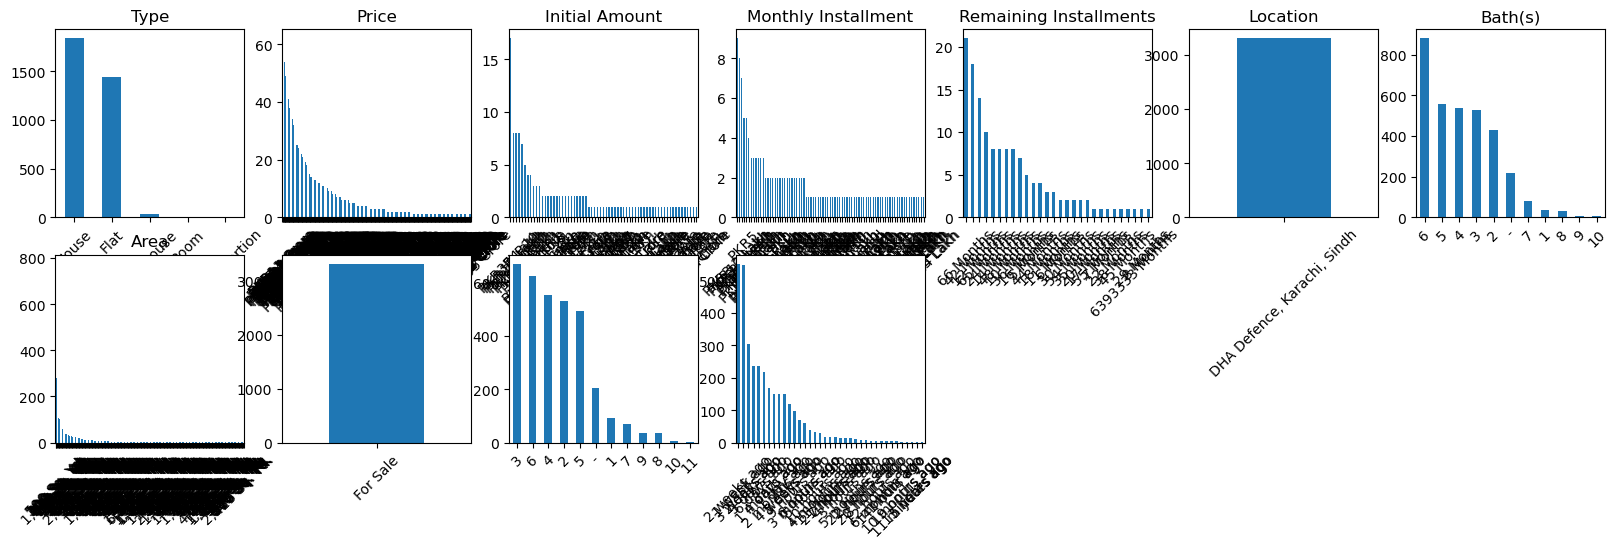

In [23]:
plt.figure(figsize=(20,20)) #resizing the figure
# Plot for each identified column
nrows=ncols=round(len(obj_columns)/2) +1

for i in range(len(obj_columns)): # for the length of columns
        plt.subplot(nrows, ncols,i+1) #for each subplot, out of 
        df[obj_columns[i]].value_counts().plot(kind='bar',title=obj_columns[i],rot=45)
plt.show()

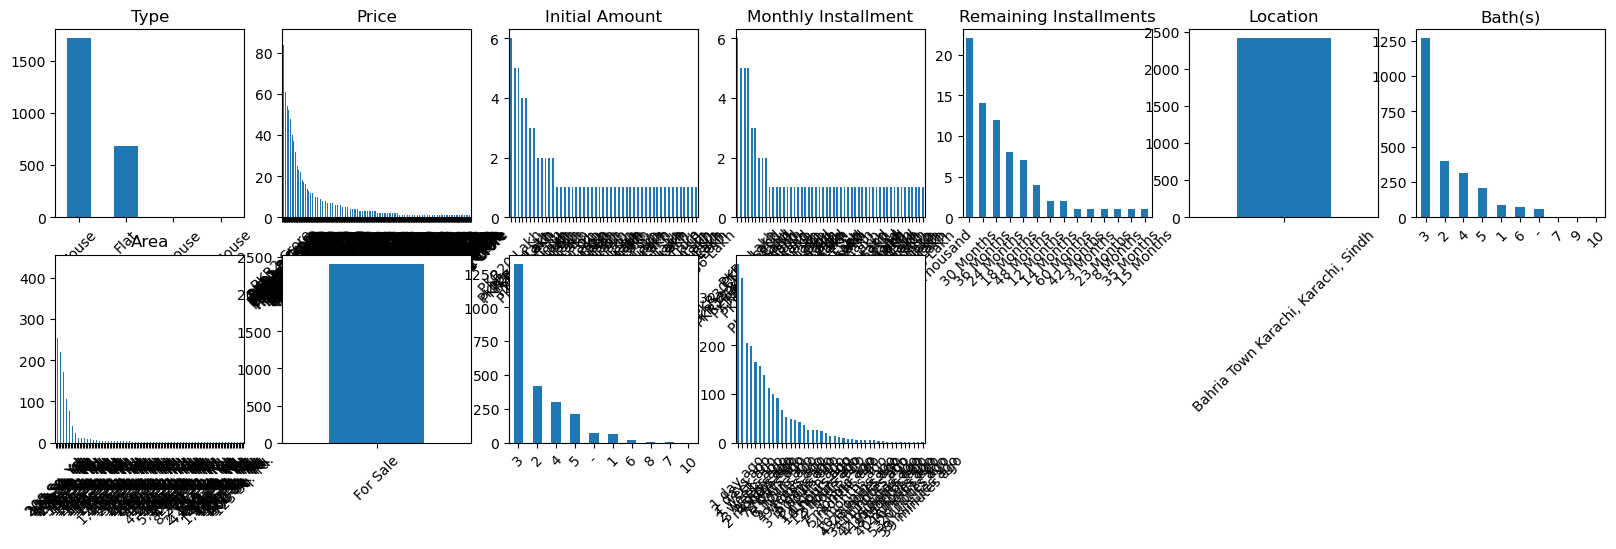

In [29]:
plt.figure(figsize=(20,20)) #resizing the figure
# Plot for each identified column
nrows=ncols=round(len(obj_columns2)/2) +1

for j in range(len(obj_columns2)): # for the length of columns
        plt.subplot(nrows, ncols,j+1) #for each subplot, out of 
        df2[obj_columns2[j]].value_counts().plot(kind='bar',title=obj_columns2[j],rot=45)
plt.show()